In [3]:
import os
# import monai
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from medpy import metric
#%matplotlib inline
# from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, Orientationd, Spacingd
# from monai.data import (
#     DataLoader,
#     CacheDataset,
#     load_decathlon_datalist,
# )
# import pandas as pd
# import matplotlib.pyplot as plt
# import SimpleITK as sitk
# from monai.transforms import (
#     EnsureChannelFirstd,
#     Compose,
#     LoadImaged,
#     Orientationd,
#     RandFlipd,
#     Spacingd,
#     RandRotate90d,
#     CenterSpatialCropd,
#     RandSpatialCropd
# )
# # Enable deterministic training for reproducibility
# monai.config.print_config()
# monai.utils.set_determinism(seed=0)

def read_nifti_spacing_and_mask_count(nifti_file_path):
    try:
        # NIfTI 파일 열기
        img = nib.load(nifti_file_path)

        # spacing 정보 추출
        spacing = img.header.get_zooms()
        mask_voxel_count = np.count_nonzero(img.get_fdata()!=0)
        return mask_voxel_count, spacing[0], spacing[1], spacing[2]
    except Exception as e:
        print(f"Error reading NIfTI file: {str(e)}")
        return None

# Define a function to calculate the volume
def calculate_volume(mask_voxel_count, pixel_spacing_x, pixel_spacing_y, slice_gap):
#     return np.round((mask_voxel_count * pixel_spacing_x * pixel_spacing_y * slice_gap)/1000, 2)  ## mm3 to cc
    return (mask_voxel_count * pixel_spacing_x * pixel_spacing_y * slice_gap)/1000


# directory_path = "/data/hanyang_Prostate/50_example/trim/sl_data_wo_norm_morphol/centerCrop_350_350_200/label_trim/"#"/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/"
# class_name = 1

# if class_name == 1:
#     datasets = "/data/hanyang_Prostate/50_example/trim/sl_data/centerCrop_350_350_200/dataset_fold_testjinjin.json"
#     print("total_prostate test : dataset.json")
# # if args.class_name == 2:
# #     datasets = args.root_path + "/dataset_2_fold{}.json".format(args.fold)
# #     print("transition zone train :dataset_2.json")
# files = load_decathlon_datalist(datasets, True, "training")

# transforms = Compose(
#         [
#             LoadImaged(keys=["image", "label"]),
#             EnsureChannelFirstd(keys=["image", "label"]),
#             Orientationd(keys=["image", "label"], axcodes="RAI"),       #ALI
#             Spacingd(
#                 keys=["image", "label"],
#                 pixdim=(0.8,0.8,0.8),
#                 mode=("bilinear", "nearest"),
#             ),
#             CenterSpatialCropd(keys=['image', 'label'], roi_size=(176,176,128)),
# #             RandSpatialCropd(keys=['image', 'label'], roi_size=(256,256,128), random_size=False),#roi_size=(272,272,144), random_size=False),
#             RandFlipd(
#                 keys=["image", "label"],
#                 spatial_axis=[0],
#                 prob=0.10,
#             ),
#             RandFlipd(
#                 keys=["image", "label"],
#                 spatial_axis=[1],
#                 prob=0.10,
#             ),
#             RandFlipd(
#                 keys=["image", "label"],
#                 spatial_axis=[2],
#                 prob=0.10,
#             ),
#             RandRotate90d(
#                 keys=["image", "label"],
#                 prob=0.10,
#                 max_k=3,
#             ),

#         ]
# )

# db = CacheDataset(
#     data=files, transform=transforms, cache_num=6, cache_rate=1.0, num_workers=4
# )
# print(len(db))
# for _ in range(len(db)):
       
#     mask_voxel_count2 = np.count_nonzero(db[_]['label'][0]!=0)
#     volume2 = calculate_volume(mask_voxel_count2, transforms.transforms[3].spacing_transform.pixdim[0], transforms.transforms[3].spacing_transform.pixdim[1], transforms.transforms[3].spacing_transform.pixdim[2])
    
#     tmp_itk = sitk.GetImageFromArray(db[_]['label'][0])
#     tmp_itk.SetSpacing((0.8 ,0.8 ,0.8))
#     sitk.WriteImage(tmp_itk, "tmp.nii.gz")
#     tmp_mask_voxel_count, tmp_pixel_spacing_x, tmp_pixel_spacing_y, tmp_slice_gap = read_nifti_spacing_and_mask_count("tmp.nii.gz")
#     tmp_volume = calculate_volume(tmp_mask_voxel_count, tmp_pixel_spacing_x, tmp_pixel_spacing_y, tmp_slice_gap)
    
#     print(db[_].keys())
#     no = db[_]['label_meta_dict']['filename_or_obj'].split('/')[-1][:8]
    
#     original_nifti_file_path=''
#     # 디렉토리 탐색
#     for root, dirs, files in os.walk(directory_path):
#         for file in files:
#             if no in file:
#                 # 검색한 문자열을 포함한 파일의 전체 경로 출력
#                 original_nifti_file_path = os.path.join(root, file)
# #                 print("\t Original file name:", original_nifti_file_path)
                
#     mask_voxel_count, pixel_spacing_x, pixel_spacing_y, slice_gap = read_nifti_spacing_and_mask_count(original_nifti_file_path)
#     volume = calculate_volume(mask_voxel_count, pixel_spacing_x, pixel_spacing_y, slice_gap)
    
#     print(f"No: {no}, Volume: {np.round(volume,1)} (cc), Transformed Volume: {np.round(volume2,1)} (cc)")
#     print(f"tmp_volume: {np.round(tmp_volume,1)} (cc)")
#     print(f"\t Original Pixel Spacing (x): {np.round(float(pixel_spacing_x),3)}")
#     print(f"\t Original Pixel Spacing (y): {np.round(float(pixel_spacing_y),3)}")
#     print(f"\t Original Slice Gap: {np.round(float(slice_gap),3)}")
#     print('------------------------------------------------------')
# # print('done')


# import os
# import numpy as np

# 디렉토리 경로 설정
base_directory = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/'
# base_directory2 = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/'
directory_paths = [os.path.join(base_directory, f'vnet_30000_fold{i}/test/') for i in range(1, 6)]
# directory_paths2 = [os.path.join(base_directory2, f'vnet_30000_fold{i}/test/') for i in range(1, 6)]
# directory_path_realgt = '/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/'

# 초기화할 리스트
a_lists = [[] for _ in range(5)]  # 각 폴드의 volume_gt 리스트
b_lists = [[] for _ in range(5)]  # 각 폴드의 volume_pred 리스트
# c_lists = [[] for _ in range(5)]  # 각 폴드의 volume_realgt 리스트
d_lists = [[] for _ in range(5)]  # 각 폴드의 volume_TRUS 리스트
cnt = 0
# 디렉토리별로 처리
for fold_idx, directory_path in enumerate(directory_paths, start=1):
    print("==============================\nDirectory: ", directory_path)
    # 디렉토리 내의 모든 파일 검색
    for filename in os.listdir(directory_path):
        # 파일 이름이 "_gt.nii.gz"로 끝나는 경우에만 처리
        if filename.endswith('_gt.nii.gz'):
            print("Patient id:",filename[:-10])
            # 파일의 전체 경로 생성
            gt_file_path = os.path.join(directory_path, filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _pred 파일 찾기
            pred_filename = filename.replace('_gt.nii.gz', '_pred.nii.gz')
            pred_file_path = os.path.join(directory_path, pred_filename)
#             pred_file_path2 = os.path.join(directory_paths2[fold_idx-1], pred_filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _image 파일 찾기
            img_filename = filename.replace('_gt.nii.gz', '_img.nii.gz')
            img_file_path = os.path.join(directory_path, img_filename)
    
            # _pred 파일이 존재하면 계산 수행
            if os.path.exists(pred_file_path):
                # NIfTI 파일 열기
                gt_label = nib.load(gt_file_path).get_fdata()
                gt_label = np.moveaxis(gt_label, [0, 1, 2], [1, 0, 2])  # 축을 교환합니다.
                pred_label = nib.load(pred_file_path).get_fdata()
                pred_label = np.moveaxis(pred_label, [0, 1, 2], [1, 0, 2])  # 축을 교환합니다.
#                 pred_label2 = nib.load(pred_file_path2).get_fdata()
#                 pred_label2 = np.moveaxis(pred_label2, [0, 1, 2], [1, 0, 2])  # 축을 교환합니다.
                ct_img = nib.load(img_file_path).get_fdata()
                ct_img = np.moveaxis(ct_img, [0, 1, 2], [1, 0, 2])  # 축을 교환합니다.
#                 print("gt_label.shape;",gt_label.shape)
#                 print("pred_label.shape;",pred_label.shape)
#                 print("ct_img.shape;",ct_img.shape)
                # _gt 파일의 정보를 읽어오고 volume 계산
                mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt = read_nifti_spacing_and_mask_count(gt_file_path)
                volume_gt = calculate_volume(mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt)
                
                # _pred 파일의 정보를 읽어오고 volume 계산
                mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred = read_nifti_spacing_and_mask_count(pred_file_path)
                volume_pred = calculate_volume(mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred)
                
                # _pred 파일의 정보를 읽어오고 volume 계산
#                 mask_voxel_count_pred2, pixel_spacing_x_pred2, pixel_spacing_y_pred2, slice_gap_pred2 = read_nifti_spacing_and_mask_count(pred_file_path2)
#                 volume_pred2 = calculate_volume(mask_voxel_count_pred2, pixel_spacing_x_pred2, pixel_spacing_y_pred2, slice_gap_pred2)
                
                ve = np.abs(volume_gt-volume_pred)
#                 ve2 = np.abs(volume_gt-volume_pred2)
                print("volume_gt-volume_pred", ve)
#                 print("volume_gt-volume_pred2", ve2)
                
                dice = metric.binary.dc(pred_label, gt_label)
#                 dice2 = metric.binary.dc(pred_label2, gt_label)
                print("dice", dice)
# #                 print("dice2",dice2)
#                 if dice>dice2 and ve>ve2:
#                     print("-------------need to check-------------")
                
                @interact(z=(0,ct_img.shape[2]-1))
                def visualize_data(z):
#                     ct_img = ct_img.get_fdata()
                    fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 5개의 subplot을 생성합니다.
                    # 첫 번째 subplot에는 원본 이미지를 표시합니다.
                    axes[0,0].imshow(ct_img[:, :, z], cmap='gray')
                    axes[0,0].set_title('CT Image slices')
                    axes[0,0].axis('off')
                    # 두 번째 subplot에는 GT label z번째 슬라이스를 표시합니다.
                    axes[1,0].imshow(ct_img[:, :, z], cmap='gray')
                    axes[1,0].imshow(np.where(gt_label[:, :, z] == 1, gt_label[:, :, z], np.nan), cmap='cool', alpha=0.3)
                    axes[1,0].set_title('GT mask slices')
                    axes[1,0].axis('off')
                    # 세 번째 subplot에는 Pred label의 z번째 슬라이스를 표시합니다.
                    axes[1,1].imshow(ct_img[:, :, z], cmap='gray')
                    axes[1,1].imshow(np.where(pred_label[:, :, z] == 1, pred_label[:, :, z], np.nan), cmap='autumn', alpha=0.3)
                    axes[1,1].set_title('Pred mask slices')
                    axes[1,1].axis('off')
                    ## 볼륨값이랑 dice 계산해서 output하게 하자..
                    
                    # 세 번째 subplot에는 Pred label의 z번째 슬라이스를 표시합니다.
#                     blended_mask = np.zeros_like(gt_label[:, :, z])  # blended_mask를 모두 0으로 초기화합니다.
#                     gt_mask = np.where(gt_label[:, :, z] == 1, gt_label[:, :, z], 0)
#                     pred_mask = np.where(pred_label[:, :, z] == 1, pred_label[:, :, z], 0)
#                     blended_mask = np.where(gt_mask + pred_mask > 0, 0.7 * gt_mask + 0.3 * pred_mask, np.nan)
                    axes[0,1].imshow(np.where(gt_label[:, :, z] == 1, gt_label[:, :, z], np.nan), cmap='cool', alpha=0.5)
                    
#                     axes[0,1].imshow(np.where(pred_label2[:, :, z] == 1, pred_label2[:, :, z], np.nan), cmap='winter', alpha=0.5)
                    axes[0,1].imshow(np.where(pred_label[:, :, z] == 1, pred_label[:, :, z], np.nan), cmap='autumn', alpha=0.5)
                    axes[0,1].set_title('GT & Pred mask slices')
                    axes[0,1].axis('off')
                    plt.show()
#                 visualize_data()
#                 break
                # _gt 파일의 정보를 읽어오고 volume 계산
#                 mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt = read_nifti_spacing_and_mask_count(gt_file_path)
#                 volume_gt = calculate_volume(mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt)
                
#                 # _pred 파일의 정보를 읽어오고 volume 계산
#                 mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred = read_nifti_spacing_and_mask_count(pred_file_path)
#                 volume_pred = calculate_volume(mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred)
                
#                 # 검색할 문자열 설정
#                 a_value = filename.split("_")[1]
    
#                 # /data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/ 디렉토리 내의 파일 검색
#                 for realgt_filename in os.listdir(directory_path_realgt):
#                     # 파일 이름에 검색할 문자열이 포함되어 있는지 확인
#                     if a_value in realgt_filename:
#                         mask_voxel_count_realgt, pixel_spacing_x_realgt, pixel_spacing_y_realgt, slice_gap_realgt = read_nifti_spacing_and_mask_count(os.path.join(directory_path_realgt, realgt_filename))
#                         volume_realgt = calculate_volume(mask_voxel_count_realgt, pixel_spacing_x_realgt, pixel_spacing_y_realgt, slice_gap_realgt)
                        
#                         # 값 저장
#                         if a_value in TRUS:
#                             cnt += 1
#                             a_lists[fold_idx - 1].append(volume_gt)
#                             b_lists[fold_idx - 1].append(volume_pred)
#                             c_lists[fold_idx - 1].append(volume_realgt)
#                             d_lists[fold_idx - 1].append(TRUS[a_value])
#                             # 출력
#                             print(f"No.: {a_value}")
#                             print(f"\t Volume (TRUS): {TRUS[a_value]}")
#                             print(f"\t Pixel Spacing X (realgt): {np.round(float(pixel_spacing_x_realgt),3)}")
#                             print(f"\t Volume (realgt): {np.round(volume_realgt,1)}")
#                             print(f"\t Pixel Spacing X (gt): {np.round(float(pixel_spacing_x_gt),3)}")
#                             print(f"\t Volume (gt): {np.round(volume_gt,1)}")
#                             print(f"\t Pixel Spacing X (pred): {np.round(float(pixel_spacing_x_pred),3)}")
#                             print(f"\t Volume (pred): {np.round(volume_pred,1)}")
#                             print("-----------------------------------------")
print(cnt)

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold1/test/
Patient id: 0_00800131
volume_gt-volume_pred 0.6640640296859708
dice 0.866881916545486


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 1_00818049
volume_gt-volume_pred 1.3568000606536899
dice 0.8439374303022996


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 2_00851016
volume_gt-volume_pred 0.3200000143051156
dice 0.9281650214117695


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 3_01054688
volume_gt-volume_pred 6.666752298027042
dice 0.7549166955695146


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 4_01094573
volume_gt-volume_pred 3.0940161383132967
dice 0.9028104440566641


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 5_01106379
volume_gt-volume_pred 0.8734720390472397
dice 0.9413553719008264


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 6_01115241
volume_gt-volume_pred 2.057216091964719
dice 0.8913158005647575


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 7_01228200
volume_gt-volume_pred 3.5138561570816087
dice 0.8620195570749856


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 8_01264293
volume_gt-volume_pred 6.61606429576112
dice 0.8841848548371628


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 9_01663839
volume_gt-volume_pred 0.0460800020599379
dice 0.9132981721555681


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold2/test/
Patient id: 0_01776461
volume_gt-volume_pred 0.79769603565979
dice 0.9058113907899316


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 1_01804929
volume_gt-volume_pred 1.0874880486144995
dice 0.90368190060708


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 2_01904278
volume_gt-volume_pred 6.787584303428652
dice 0.8257029583785835


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 3_01972333
volume_gt-volume_pred 2.2374401000213595
dice 0.9000710299340436


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 4_01986175
volume_gt-volume_pred 3.358720150146482
dice 0.8507141760098296


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 5_02009786
volume_gt-volume_pred 3.6490241631240856
dice 0.9122381926204484


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 6_02063805
volume_gt-volume_pred 6.220288278068544
dice 0.8634455428608084


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 7_02141859
volume_gt-volume_pred 0.459776020553587
dice 0.8699519979029801


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 8_02150142
volume_gt-volume_pred 1.9609600876617463
dice 0.9152964049164662


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 9_02153845
volume_gt-volume_pred 0.3159040141220082
dice 0.8986345010083883


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold3/test/
Patient id: 0_02161060
volume_gt-volume_pred 1.4382080642929083
dice 0.8261041768040829


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 1_02179375
volume_gt-volume_pred 3.164672141471865
dice 0.8837951719344015


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 2_02179650
volume_gt-volume_pred 13.110784586097726
dice 0.7507744297381019


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 3_02286469
volume_gt-volume_pred 4.2680321907959
dice 0.8064252270547752


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 4_02289873
volume_gt-volume_pred 0.4111360183792101
dice 0.8138109323330928


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 5_02348071
volume_gt-volume_pred 3.1595521412429832
dice 0.8783478145180272


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 6_02394910
volume_gt-volume_pred 6.321152282577515
dice 0.8631533839126582


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 7_02572186
volume_gt-volume_pred 5.114368228630077
dice 0.8784172500616394


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 8_02573669
volume_gt-volume_pred 3.433984153511048
dice 0.914522563258218


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 9_02603745
volume_gt-volume_pred 3.7012481654586793
dice 0.7643069550520933


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold4/test/
Patient id: 0_02610498
volume_gt-volume_pred 5.842432261177066
dice 0.8083346421653317


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 1_02744296
volume_gt-volume_pred 3.243520144996644
dice 0.9201676627842873


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 2_02786444
volume_gt-volume_pred 1.5109120675430283
dice 0.8472661603289061


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 3_02793452
volume_gt-volume_pred 3.420160152893068
dice 0.8871899249459356


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 4_02820034
volume_gt-volume_pred 0.14950400668335107
dice 0.9184539185250137


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 5_02882776
volume_gt-volume_pred 3.382272151199345
dice 0.9081078459897197


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 6_02948957
volume_gt-volume_pred 7.331328327735903
dice 0.8869330312404688


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 7_02949843
volume_gt-volume_pred 0.3189760142593414
dice 0.9255400364992693


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 8_02951189
volume_gt-volume_pred 0.4561920203933667
dice 0.91596474409687


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 9_02951192
volume_gt-volume_pred 4.406784196998597
dice 0.8768805804985598


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold5/test/
Patient id: 0_02953538
volume_gt-volume_pred 4.344320194206247
dice 0.8529524123414806


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 1_02953540
volume_gt-volume_pred 1.4561280650939956
dice 0.8471156991748755


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 2_02953784
volume_gt-volume_pred 4.130304184638984
dice 0.9070071569536581


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 3_02953958
volume_gt-volume_pred 4.617728206428527
dice 0.8877292824935429


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 4_02954359
volume_gt-volume_pred 2.02700809061432
dice 0.8767049320187043


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 5_02954360
volume_gt-volume_pred 4.521472202125555
dice 0.9050486184496163


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 6_02954361
volume_gt-volume_pred 1.059328047355656
dice 0.9137657017058498


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 7_02954978
volume_gt-volume_pred 6.018048269027709
dice 0.854894234757362


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 8_02955289
volume_gt-volume_pred 2.297856102722168
dice 0.7487157664366698


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

Patient id: 9_02955569
volume_gt-volume_pred 3.062272136894226
dice 0.9239087958273852


interactive(children=(IntSlider(value=63, description='z', max=127), Output()), _dom_classes=('widget-interact…

0


In [4]:
# 디렉토리 경로 설정
base_directory = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/'
# base_directory2 = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/'
directory_paths = [os.path.join(base_directory, f'vnet_30000_fold{i}/test/') for i in range(1, 6)]
# directory_paths2 = [os.path.join(base_directory2, f'vnet_30000_fold{i}/test/') for i in range(1, 6)]
# directory_path_realgt = '/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/'

ves = []; dices = [];
# 디렉토리별로 처리
for fold_idx, directory_path in enumerate(directory_paths, start=1):
    print("==============================\nDirectory: ", directory_path)
    curr_fold_ves = []; curr_fold_dices = [];
    # 디렉토리 내의 모든 파일 검색
    for filename in os.listdir(directory_path):
        # 파일 이름이 "_gt.nii.gz"로 끝나는 경우에만 처리
        if filename.endswith('_gt.nii.gz'):
            print("Patient id:",filename[:-10])
            # 파일의 전체 경로 생성
            gt_file_path = os.path.join(directory_path, filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _pred 파일 찾기
            pred_filename = filename.replace('_gt.nii.gz', '_pred.nii.gz')
            pred_file_path = os.path.join(directory_path, pred_filename)
#             pred_file_path2 = os.path.join(directory_paths2[fold_idx-1], pred_filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _image 파일 찾기
            img_filename = filename.replace('_gt.nii.gz', '_img.nii.gz')
            img_file_path = os.path.join(directory_path, img_filename)
    
            # _pred 파일이 존재하면 계산 수행
            if os.path.exists(pred_file_path):
                # NIfTI 파일 열기
                gt_label_file = nib.load(gt_file_path)
                gt_space = gt_label_file.header.get_zooms()
                gt_label = gt_label_file.get_fdata()
                gt_label = np.moveaxis(gt_label, [0, 1, 2], [1, 0, 2])
                
                pred_label_file = nib.load(pred_file_path)
                pred_space = pred_label_file.header.get_zooms()
                pred_label = pred_label_file.get_fdata()
                pred_label = np.moveaxis(pred_label, [0, 1, 2], [1, 0, 2])

                ct_img_file = nib.load(img_file_path)
                ct_space = ct_img_file.header.get_zooms()
                ct_img = ct_img_file.get_fdata()
                ct_img = np.moveaxis(ct_img, [0, 1, 2], [1, 0, 2])
#                 print("gt_label.shape;",gt_label.shape)  # (256, 256, 128)
#                 print("pred_label.shape;",pred_label.shape)  # (256, 256, 128)
#                 print("ct_img.shape;",ct_img.shape)  # (256, 256, 128)

                z_dim = ct_img.shape[-1]
                curr_patient_ves = []; curr_patient_dices = [];
                for each in range(z_dim):
                    gt_voxel_count = np.count_nonzero(gt_label[:,:,each:]!=0)
                    pred_voxel_count = np.count_nonzero(pred_label[:,:,each:]!=0)

                    # _gt 파일의 정보를 읽어오고 volume 계산
                    volume_gt = calculate_volume(gt_voxel_count, gt_space[0], gt_space[1], gt_space[2])
                    # _pred 파일의 정보를 읽어오고 volume 계산
                    volume_pred = calculate_volume(pred_voxel_count, pred_space[0], pred_space[1], pred_space[2])

                    ve = np.abs(volume_gt-volume_pred)
#                     print("volume_gt-volume_pred", ve)

                    dice = metric.binary.dc(pred_label[:,:,each:], gt_label[:,:,each:])
#                     print("dice", dice)
                    curr_patient_ves.append(ve)
                    curr_patient_dices.append(dice)
                    
            curr_fold_ves.append(curr_patient_ves)
            curr_fold_dices.append(curr_patient_dices)
    ves.append(curr_fold_ves)
    dices.append(curr_fold_dices)

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold1/test/
Patient id: 0_00800131
Patient id: 1_00818049
Patient id: 2_00851016
Patient id: 3_01054688
Patient id: 4_01094573
Patient id: 5_01106379
Patient id: 6_01115241
Patient id: 7_01228200
Patient id: 8_01264293
Patient id: 9_01663839
Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold2/test/
Patient id: 0_01776461
Patient id: 1_01804929
Patient id: 2_01904278
Patient id: 3_01972333
Patient id: 4_01986175
Patient id: 5_02009786
Patient id: 6_02063805
Patient id: 7_02141859
Patient id: 8_02150142
Patient id: 9_02153845
Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold3/test/
Patient id: 0_02161060
Patient id: 1_02179375
Patient id: 2_02179650
Patient id: 3_02286469
Patient id: 4_02289873
Patient id: 5_02348071
Patient id: 6_02394910
Patient id: 7_02572186
Patient id: 8_02573669
Patien

In [5]:
ves = np.array(ves)
dices = np.array(dices)

print(ves.shape)
print(dices.shape)

(5, 10, 128)
(5, 10, 128)


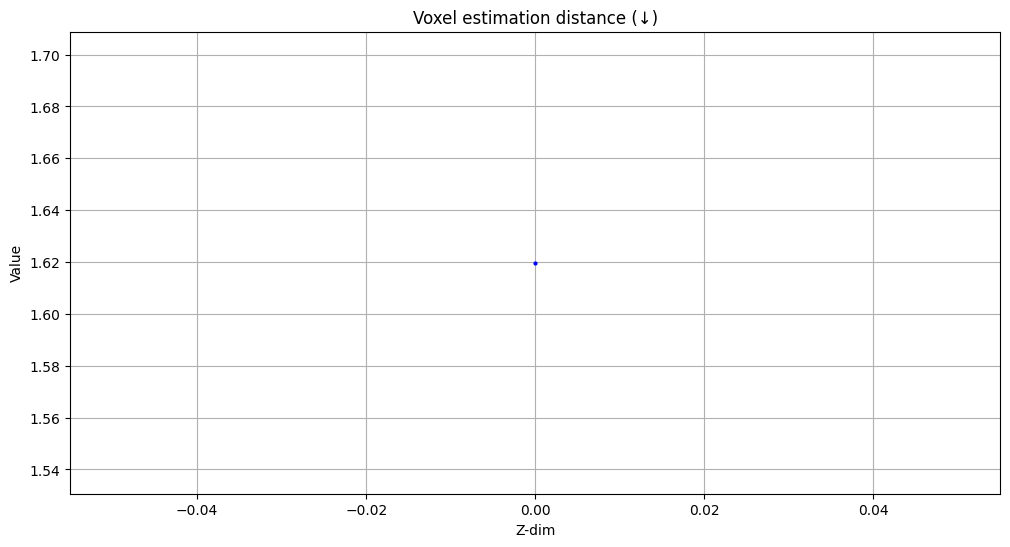

In [84]:
# Create a figure and an axis for plotting
plt.figure(figsize=(12, 6))

# Plot the first array
# 'label' is used to create a legend for the graph
plt.plot(np.mean(np.mean(ves, axis=1), axis=0), 'bo-', ms='2', lw='0.5', label='Voxel estimation distance')
# Adding a title to the plot
plt.title('Voxel estimation distance (↓)')

# Labeling the x-axis and y-axis
plt.xlabel('Z-dim')
plt.ylabel('Value')

# Displaying the legend, which uses the labels defined in plt.plot()
# plt.legend()

# Adding a grid for better readability
plt.grid(True)

# Display the plot
plt.show()



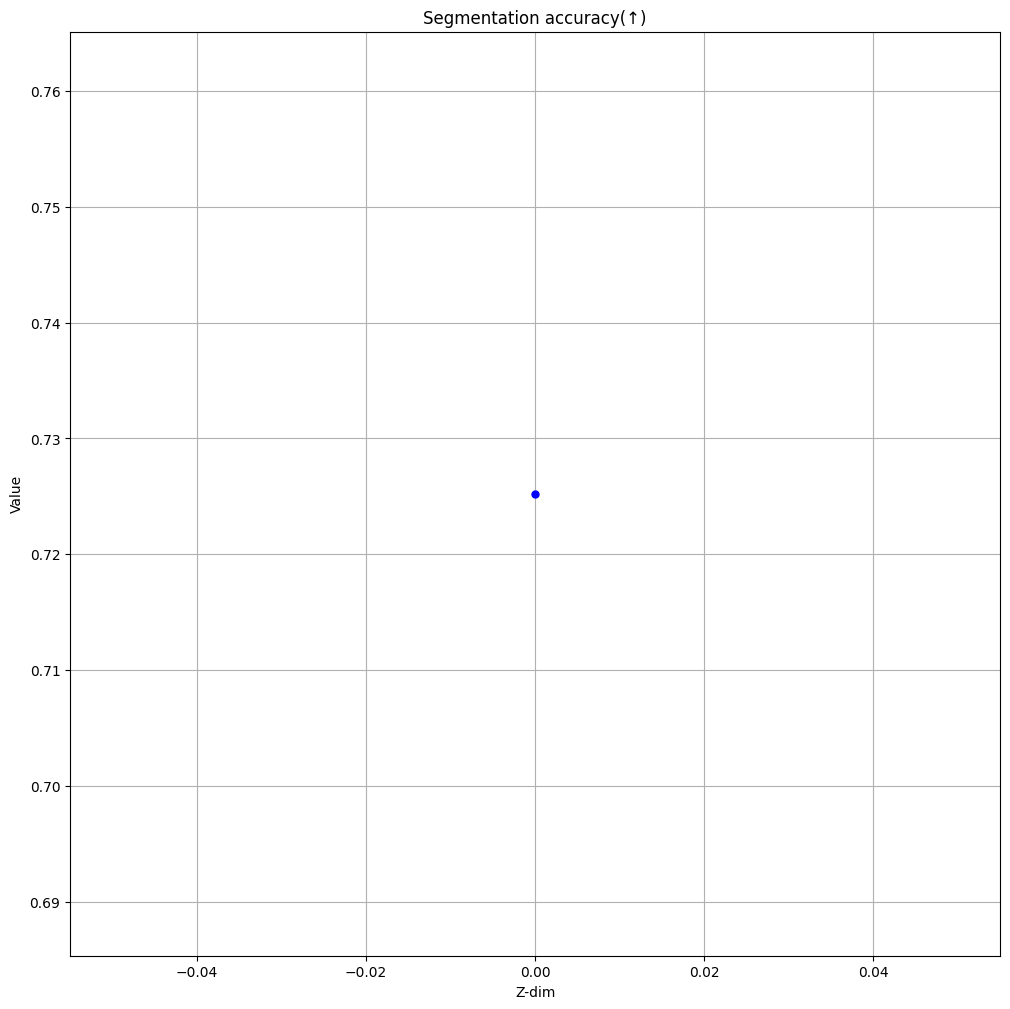

In [85]:
plt.figure(figsize=(12, 12))

# Adding 'linestyle' to distinguish it from the first array
plt.plot(np.mean(np.mean(dices, axis=1), axis=0), 'ro-', ms='2', lw='0.5', label='Segmentation accuracy(↑)')

argmax_index = np.mean(np.mean(dices, axis=1), axis=0).argmax()
# argmax 위치에 점을 다른 색으로 표시합니다.
plt.plot(argmax_index, np.mean(np.mean(dices, axis=1), axis=0)[argmax_index], 'bo', ms=5, label='Max accuracy')

# Adding a title to the plot
plt.title('Segmentation accuracy(↑)')

# Labeling the x-axis and y-axis
plt.xlabel('Z-dim')
plt.ylabel('Value')
# plt.xlim([35,85])
# plt.ylim([np.mean(np.mean(dices, axis=1), axis=0)[35:85].min()-0.05,1])

# Displaying the legend, which uses the labels defined in plt.plot()
# plt.legend()

# Adding a grid for better readability
plt.grid(True)

# Display the plot
plt.show()


In [86]:
np.mean(np.mean(dices, axis=1), axis=0)[argmax_index]

0.7252291784494396

In [67]:
# 디렉토리 경로 설정
base_directory = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/'
# base_directory2 = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/'
directory_paths = [os.path.join(base_directory, f'vnet_30000_fold{i}/test/') for i in range(1, 6)]
# directory_paths2 = [os.path.join(base_directory2, f'vnet_30000_fold{i}/test/') for i in range(1, 6)]
# directory_path_realgt = '/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/'

ves = []; dices = [];
# 디렉토리별로 처리
for fold_idx, directory_path in enumerate(directory_paths, start=1):
    print("==============================\nDirectory: ", directory_path)
    curr_fold_ves = []; curr_fold_dices = [];
    # 디렉토리 내의 모든 파일 검색
    for filename in os.listdir(directory_path):
        # 파일 이름이 "_gt.nii.gz"로 끝나는 경우에만 처리
        if filename.endswith('_gt.nii.gz'):
            print("Patient id:",filename[:-10])
            # 파일의 전체 경로 생성
            gt_file_path = os.path.join(directory_path, filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _pred 파일 찾기
            pred_filename = filename.replace('_gt.nii.gz', '_pred.nii.gz')
            pred_file_path = os.path.join(directory_path, pred_filename)
#             pred_file_path2 = os.path.join(directory_paths2[fold_idx-1], pred_filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _image 파일 찾기
            img_filename = filename.replace('_gt.nii.gz', '_img.nii.gz')
            img_file_path = os.path.join(directory_path, img_filename)
    
            # _pred 파일이 존재하면 계산 수행
            if os.path.exists(pred_file_path):
                # NIfTI 파일 열기
                gt_label_file = nib.load(gt_file_path)
                gt_space = gt_label_file.header.get_zooms()
                gt_label = gt_label_file.get_fdata()
                gt_label = np.moveaxis(gt_label, [0, 1, 2], [1, 0, 2])
                
                pred_label_file = nib.load(pred_file_path)
                pred_space = pred_label_file.header.get_zooms()
                pred_label = pred_label_file.get_fdata()
                pred_label = np.moveaxis(pred_label, [0, 1, 2], [1, 0, 2])

                ct_img_file = nib.load(img_file_path)
                ct_space = ct_img_file.header.get_zooms()
                ct_img = ct_img_file.get_fdata()
                ct_img = np.moveaxis(ct_img, [0, 1, 2], [1, 0, 2])
#                 print("gt_label.shape;",gt_label.shape)  # (256, 256, 128)
#                 print("pred_label.shape;",pred_label.shape)  # (256, 256, 128)
#                 print("ct_img.shape;",ct_img.shape)  # (256, 256, 128)

                z_dim = ct_img.shape[-1]
                curr_patient_ves = []; curr_patient_dices = [];
                for each in range(z_dim):
                    gt_voxel_count = np.count_nonzero(gt_label[:,:,:-each]!=0)
                    pred_voxel_count = np.count_nonzero(pred_label[:,:,:-each]!=0)

                    # _gt 파일의 정보를 읽어오고 volume 계산
                    volume_gt = calculate_volume(gt_voxel_count, gt_space[0], gt_space[1], gt_space[2])
                    # _pred 파일의 정보를 읽어오고 volume 계산
                    volume_pred = calculate_volume(pred_voxel_count, pred_space[0], pred_space[1], pred_space[2])

                    ve = np.abs(volume_gt-volume_pred)
#                     print("volume_gt-volume_pred", ve)

                    dice = metric.binary.dc(pred_label[:,:,:-each], gt_label[:,:,:-each])
#                     print("dice", dice)
                    curr_patient_ves.append(ve)
                    curr_patient_dices.append(dice)
                    
            curr_fold_ves.append(curr_patient_ves)
            curr_fold_dices.append(curr_patient_dices)
    ves.append(curr_fold_ves)
    dices.append(curr_fold_dices)

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold1/test/
Patient id: 0_00800131
Patient id: 1_00818049
Patient id: 2_00851016
Patient id: 3_01054688
Patient id: 4_01094573
Patient id: 5_01106379
Patient id: 6_01115241
Patient id: 7_01228200
Patient id: 8_01264293
Patient id: 9_01663839
Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold2/test/
Patient id: 0_01776461
Patient id: 1_01804929
Patient id: 2_01904278
Patient id: 3_01972333
Patient id: 4_01986175
Patient id: 5_02009786
Patient id: 6_02063805
Patient id: 7_02141859
Patient id: 8_02150142
Patient id: 9_02153845
Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold3/test/
Patient id: 0_02161060
Patient id: 1_02179375
Patient id: 2_02179650
Patient id: 3_02286469
Patient id: 4_02289873
Patient id: 5_02348071
Patient id: 6_02394910
Patient id: 7_02572186
Patient id: 8_02573669
Patien

(5, 10, 128)
(5, 10, 128)


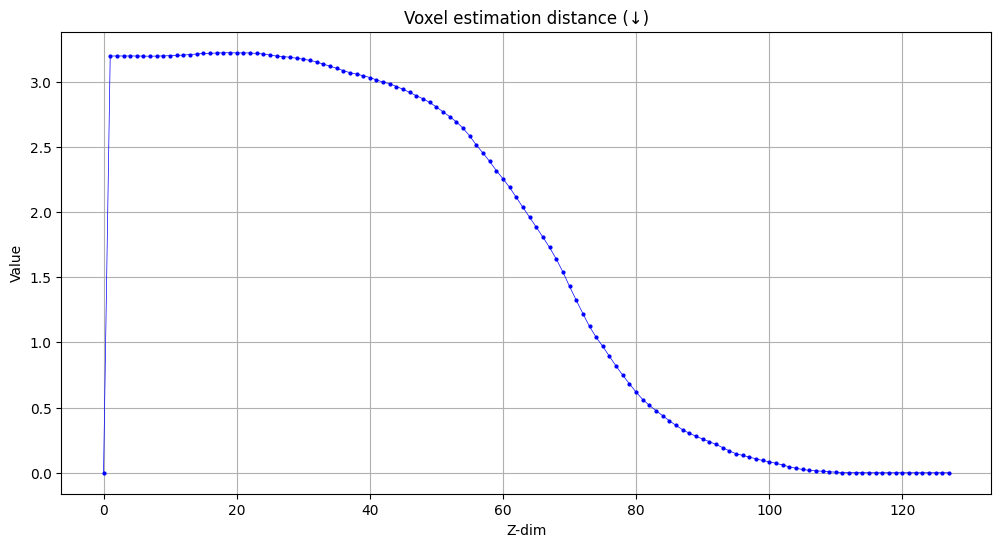

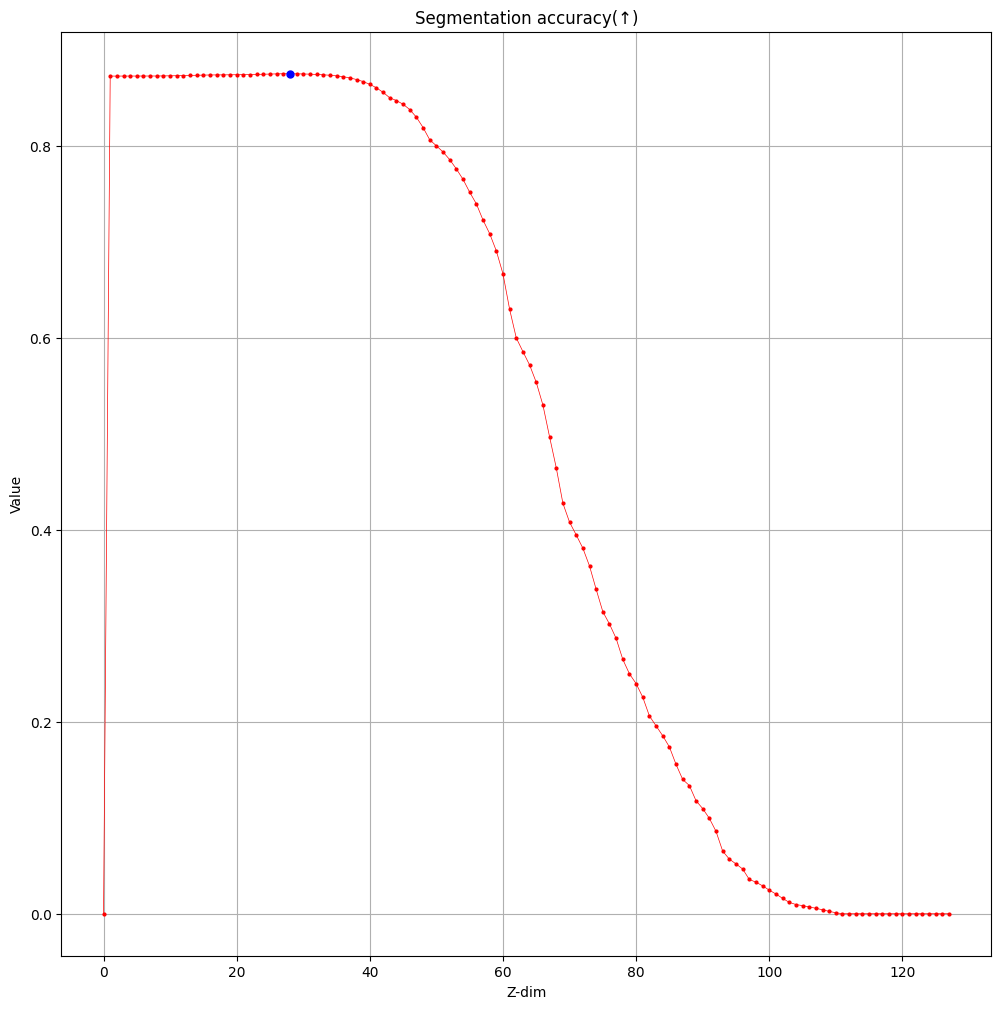

In [69]:
ves = np.array(ves)
dices = np.array(dices)

print(ves.shape)
print(dices.shape)

# Create a figure and an axis for plotting
plt.figure(figsize=(12, 6))

# Plot the first array
# 'label' is used to create a legend for the graph
plt.plot(np.mean(np.mean(ves, axis=1), axis=0), 'bo-', ms='2', lw='0.5', label='Voxel estimation distance')
# Adding a title to the plot
plt.title('Voxel estimation distance (↓)')

# Labeling the x-axis and y-axis
plt.xlabel('Z-dim')
plt.ylabel('Value')

# Displaying the legend, which uses the labels defined in plt.plot()
# plt.legend()

# Adding a grid for better readability
plt.grid(True)

# Display the plot
plt.show()

plt.figure(figsize=(12, 12))

# Adding 'linestyle' to distinguish it from the first array
plt.plot(np.mean(np.mean(dices, axis=1), axis=0), 'ro-', ms='2', lw='0.5', label='Segmentation accuracy(↑)')

argmax_index = np.mean(np.mean(dices, axis=1), axis=0).argmax()
# argmax 위치에 점을 다른 색으로 표시합니다.
plt.plot(argmax_index, np.mean(np.mean(dices, axis=1), axis=0)[argmax_index], 'bo', ms=5, label='Max accuracy')

# Adding a title to the plot
plt.title('Segmentation accuracy(↑)')

# Labeling the x-axis and y-axis
plt.xlabel('Z-dim')
plt.ylabel('Value')
# plt.xlim([35,85])
# plt.ylim([np.mean(np.mean(dices, axis=1), axis=0)[35:85].min()-0.05,1])

# Displaying the legend, which uses the labels defined in plt.plot()
# plt.legend()

# Adding a grid for better readability
plt.grid(True)

# Display the plot
plt.show()


In [75]:
print(argmax_index)
print(np.mean(np.mean(dices, axis=1), axis=0)[argmax_index])
print(np.mean(np.mean(dices, axis=1), axis=0))

28
0.8750051364166304
[0.         0.87253545 0.87253545 0.87253545 0.87253545 0.87253545
 0.87255249 0.87257353 0.87263772 0.87272096 0.87282311 0.87293759
 0.87310683 0.87329033 0.87345295 0.87358666 0.87370319 0.87379357
 0.87385897 0.87388965 0.87392874 0.87400513 0.87412146 0.87430035
 0.87453322 0.87473457 0.8749135  0.87500103 0.87500514 0.87492445
 0.87479717 0.87455446 0.87425816 0.87389189 0.87340239 0.8727925
 0.87189207 0.87065096 0.86897757 0.86680894 0.86394101 0.86029858
 0.85556847 0.849894   0.84703797 0.84319595 0.83767763 0.82966045
 0.81893861 0.80614015 0.79990758 0.79348466 0.78549667 0.77582053
 0.76495721 0.75156651 0.73946804 0.72262184 0.70842736 0.69049193
 0.66653109 0.62953894 0.59973279 0.58548301 0.57158214 0.55351076
 0.52987011 0.49670529 0.46463877 0.42758548 0.4078577  0.39460151
 0.38073372 0.36220383 0.33781477 0.31460002 0.30177032 0.28669484
 0.26488637 0.24986812 0.23970193 0.2254751  0.20595012 0.19559736
 0.18534602 0.17370319 0.15547015 0.13984

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold1/test/
Patient id: 0_00800131
chch:11 (128,)
chch:22 (128,)
chch:33 73


interactive(children=(IntSlider(value=100, description='z', max=127, min=73), Output()), _dom_classes=('widget…

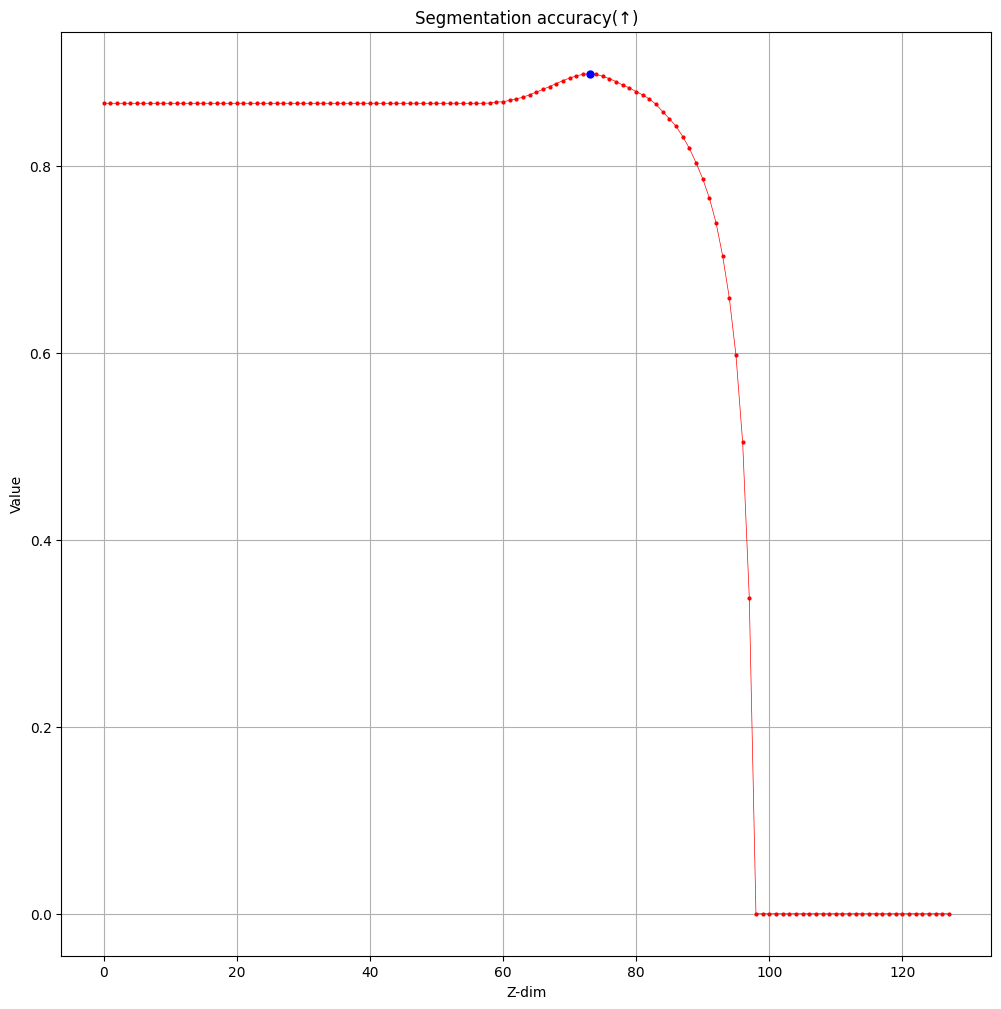

Patient id: 1_00818049
chch:11 (128,)
chch:22 (128,)
chch:33 62


interactive(children=(IntSlider(value=94, description='z', max=127, min=62), Output()), _dom_classes=('widget-…

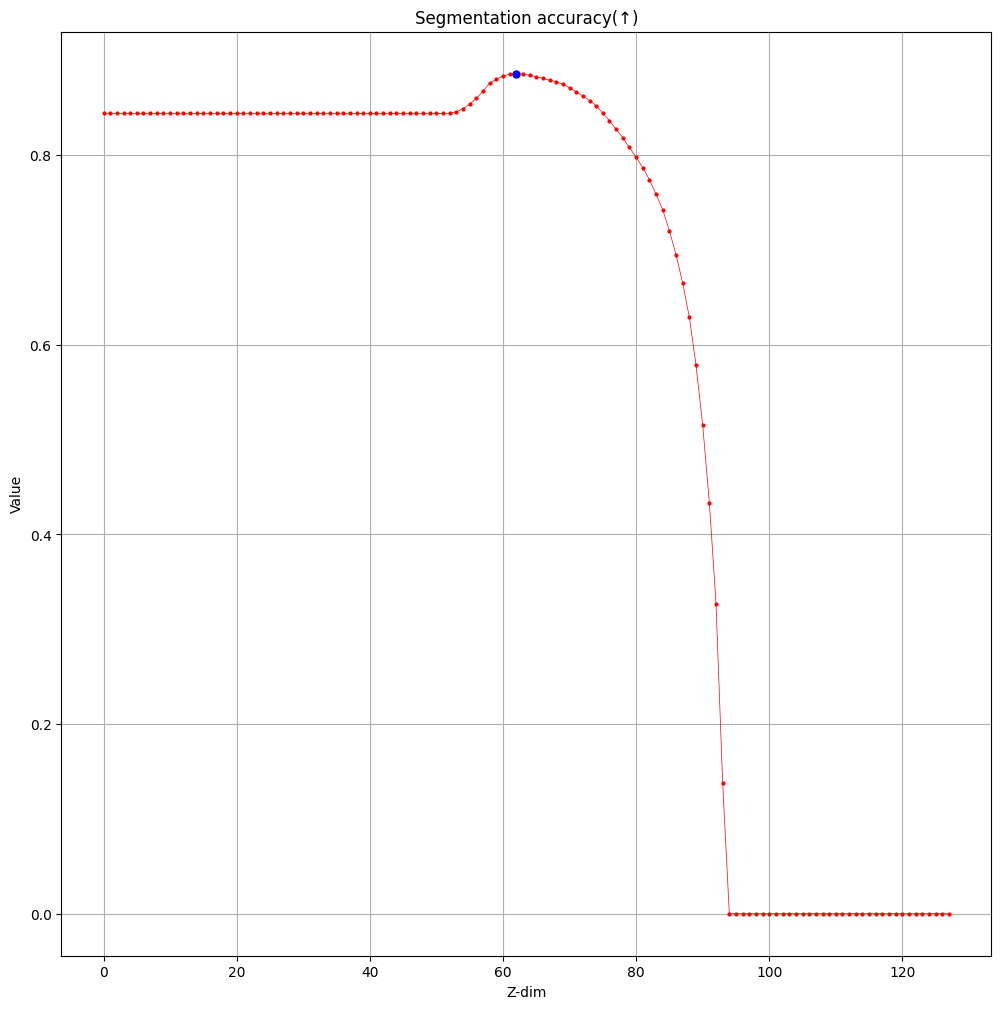

Patient id: 2_00851016
chch:11 (128,)
chch:22 (128,)
chch:33 73


interactive(children=(IntSlider(value=100, description='z', max=127, min=73), Output()), _dom_classes=('widget…

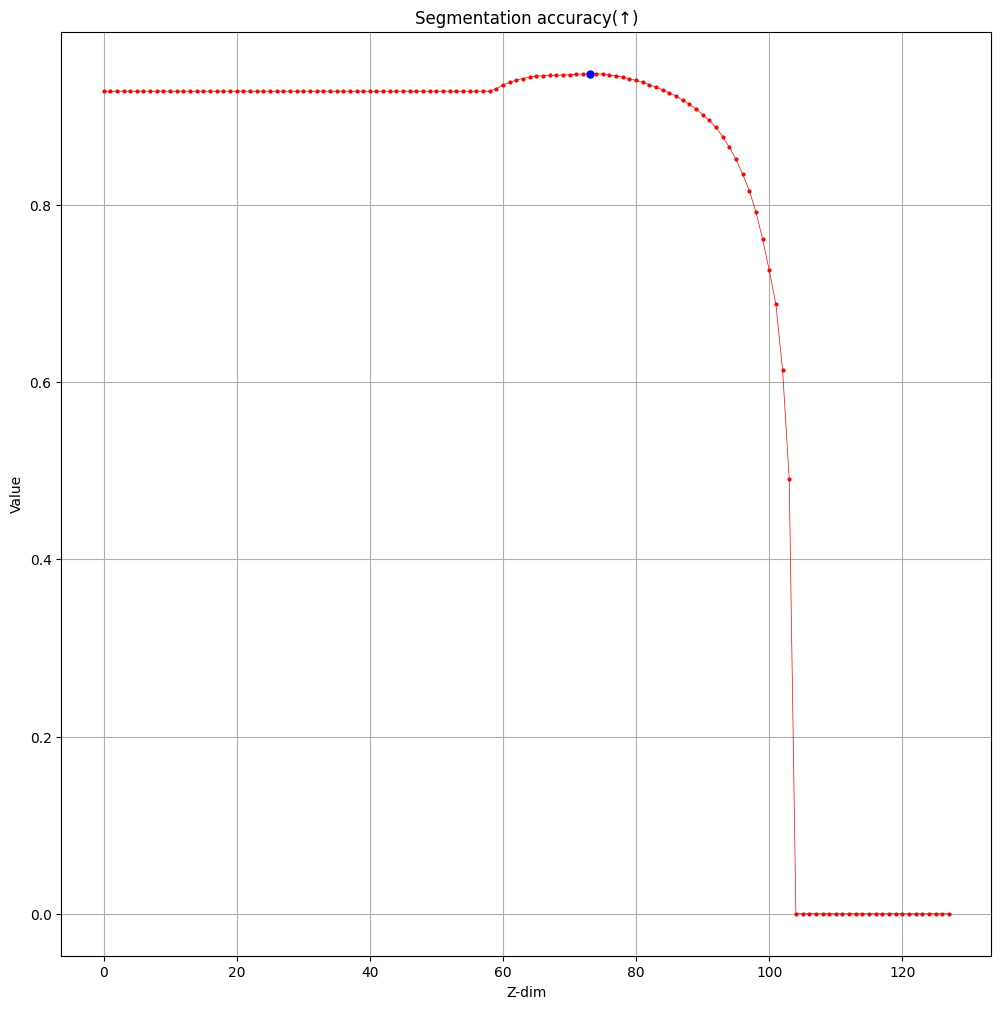

Patient id: 3_01054688
chch:11 (128,)
chch:22 (128,)
chch:33 63


interactive(children=(IntSlider(value=95, description='z', max=127, min=63), Output()), _dom_classes=('widget-…

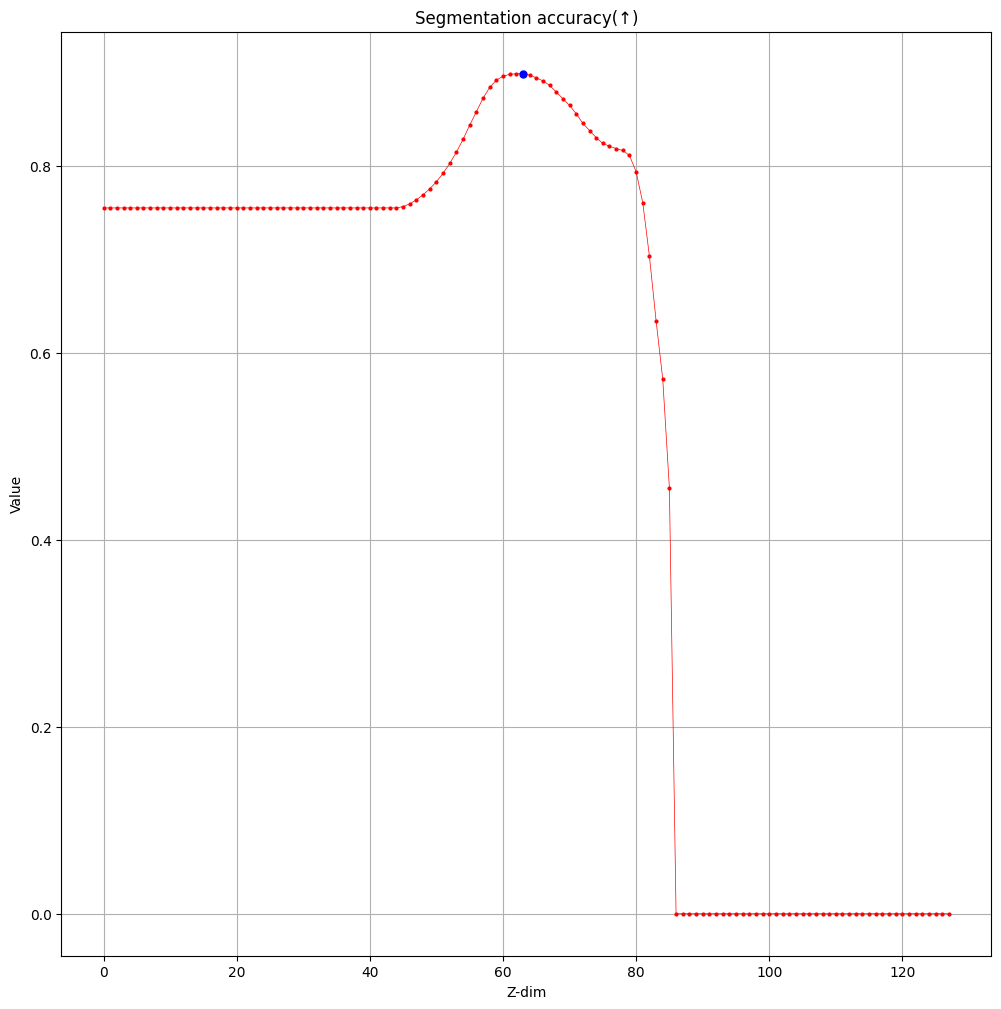

Patient id: 4_01094573
chch:11 (128,)
chch:22 (128,)
chch:33 62


interactive(children=(IntSlider(value=94, description='z', max=127, min=62), Output()), _dom_classes=('widget-…

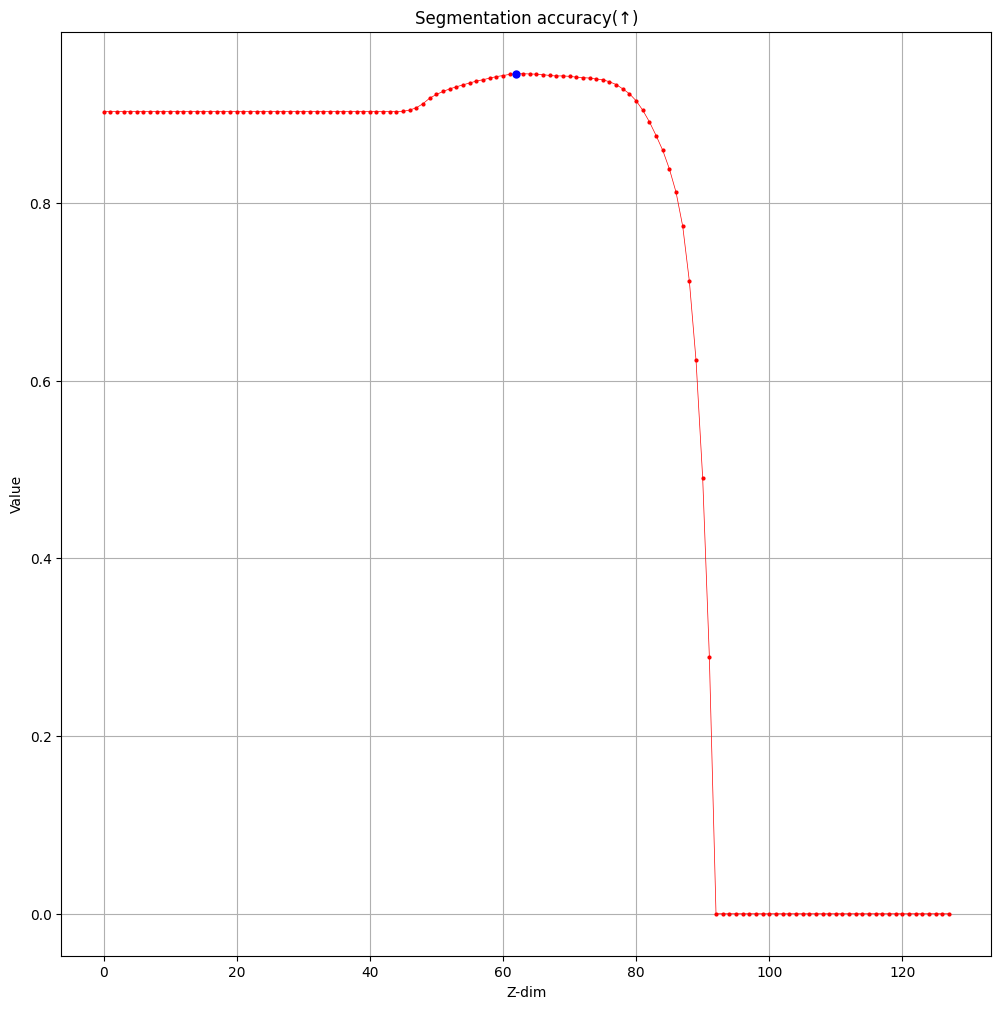

Patient id: 5_01106379
chch:11 (128,)
chch:22 (128,)
chch:33 55


interactive(children=(IntSlider(value=91, description='z', max=127, min=55), Output()), _dom_classes=('widget-…

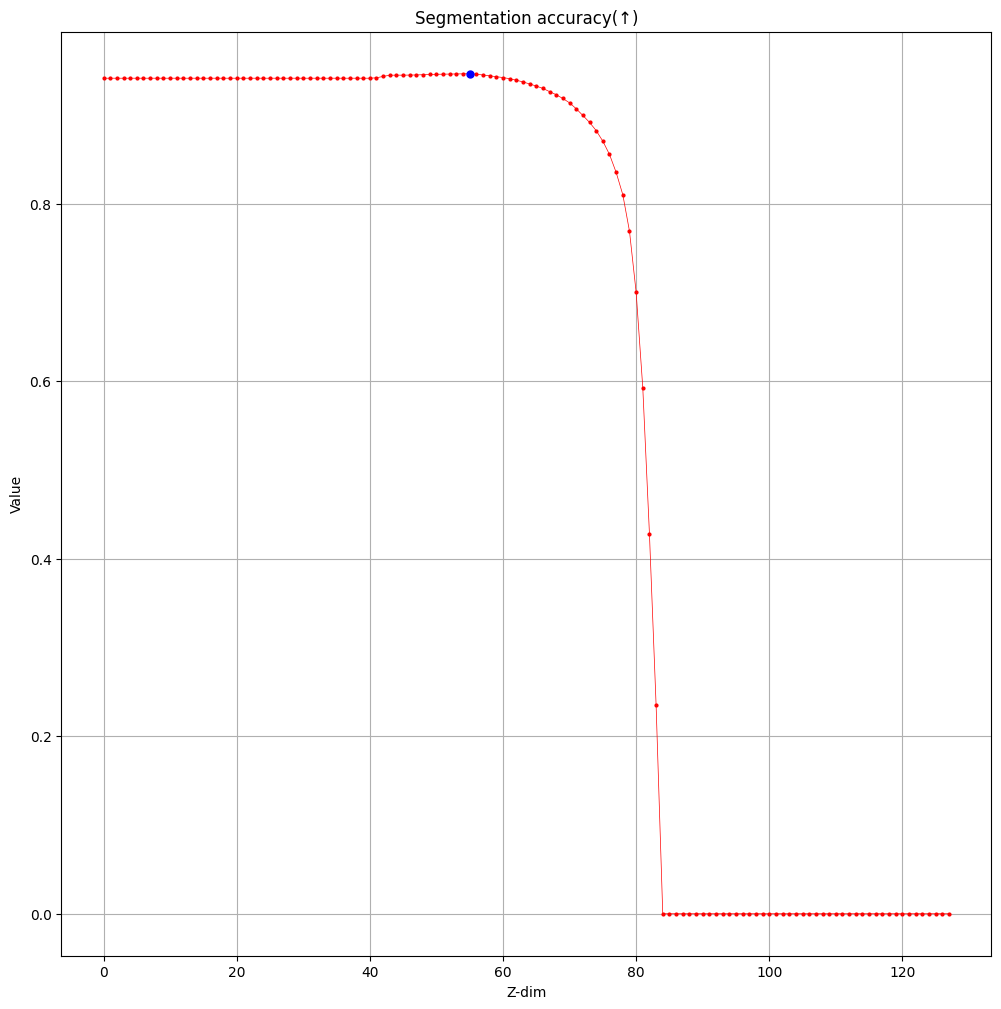

Patient id: 6_01115241
chch:11 (128,)
chch:22 (128,)
chch:33 80


interactive(children=(IntSlider(value=103, description='z', max=127, min=80), Output()), _dom_classes=('widget…

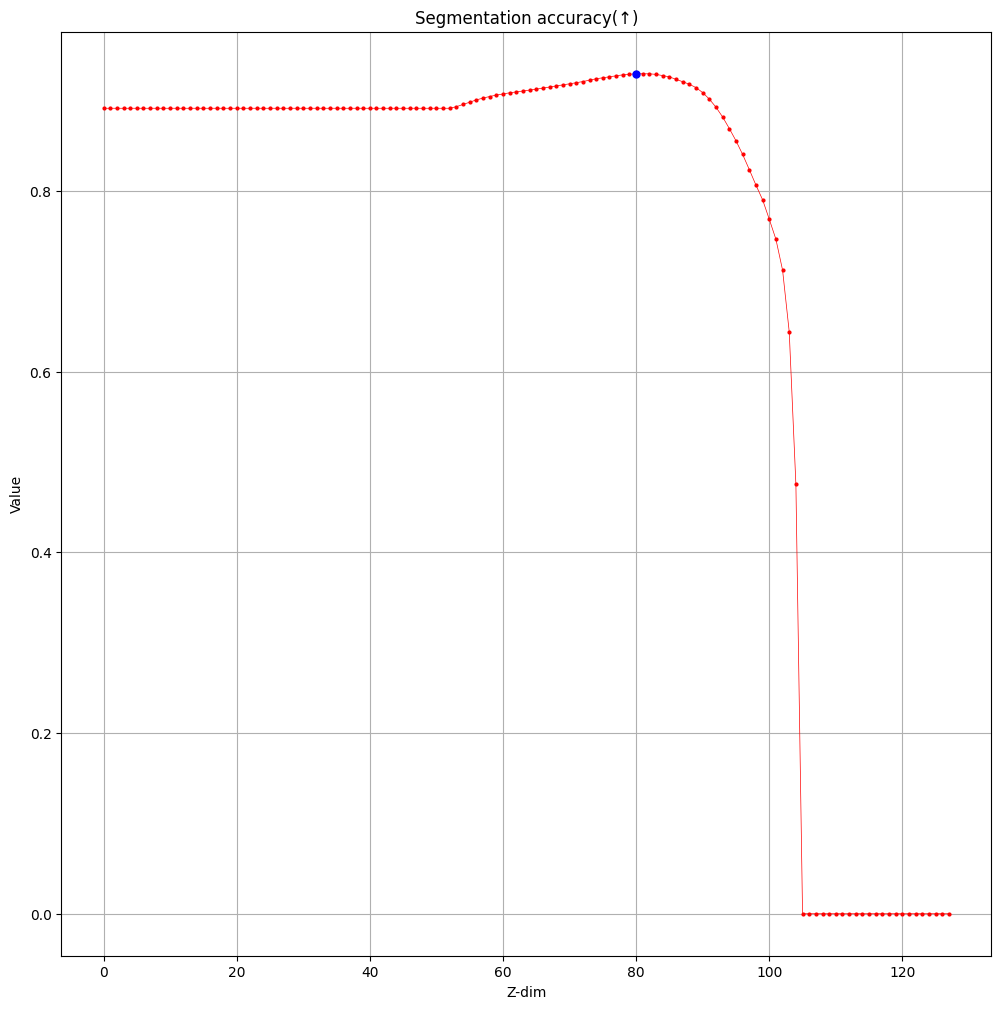

Patient id: 7_01228200
chch:11 (128,)
chch:22 (128,)
chch:33 76


interactive(children=(IntSlider(value=101, description='z', max=127, min=76), Output()), _dom_classes=('widget…

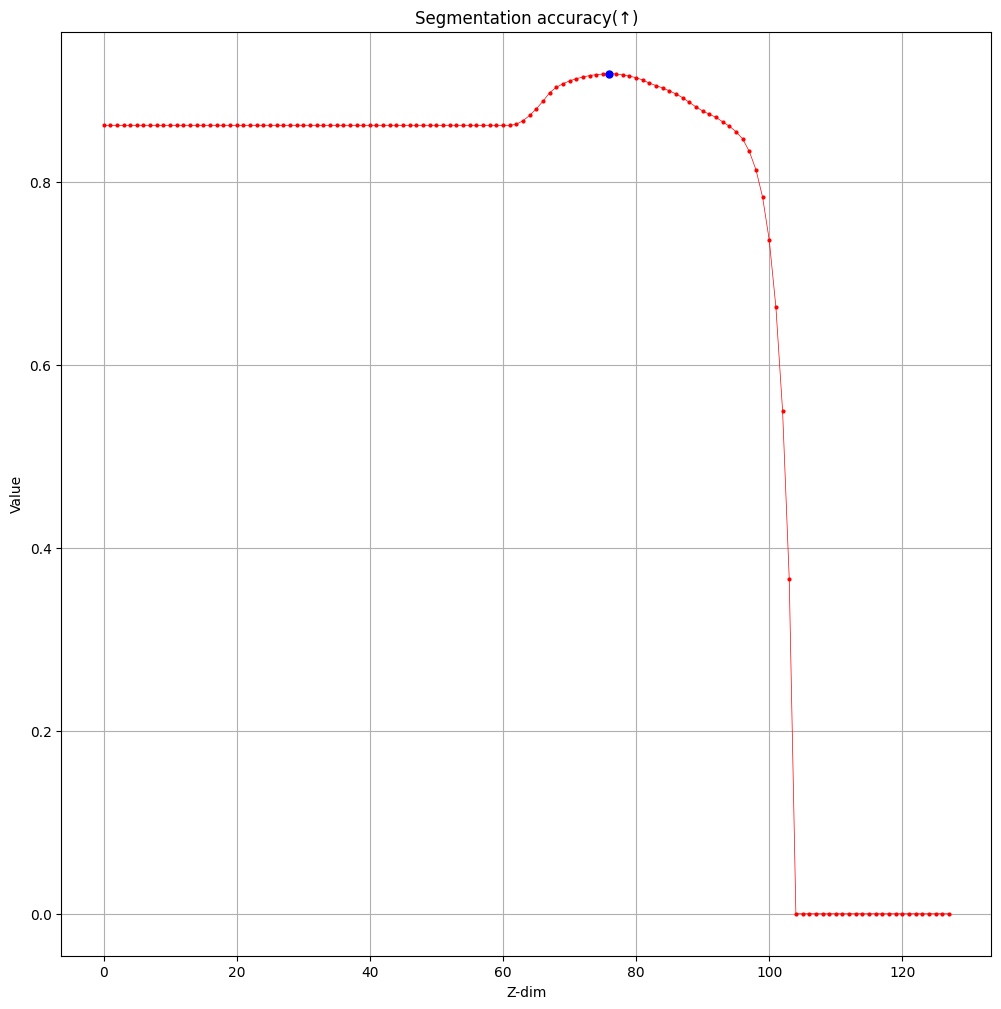

Patient id: 8_01264293
chch:11 (128,)
chch:22 (128,)
chch:33 46


interactive(children=(IntSlider(value=86, description='z', max=127, min=46), Output()), _dom_classes=('widget-…

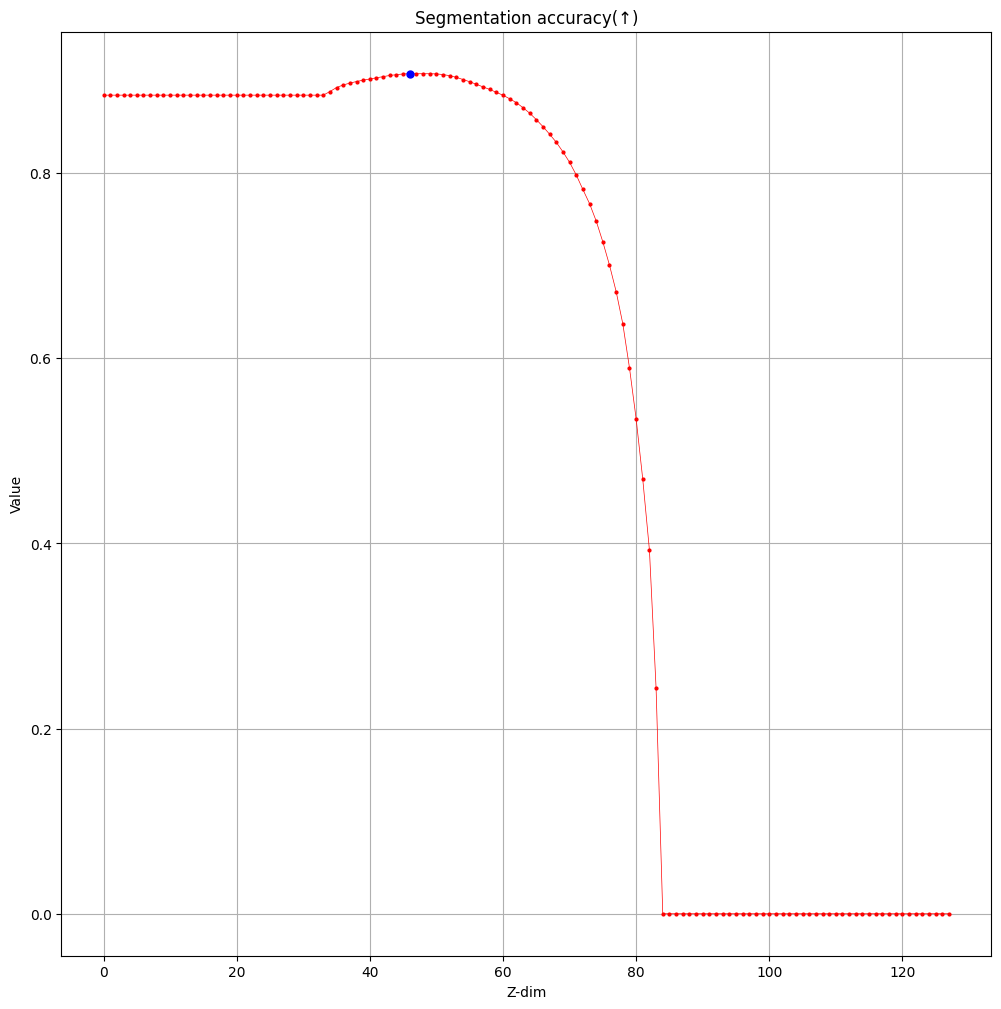

Patient id: 9_01663839
chch:11 (128,)
chch:22 (128,)
chch:33 75


interactive(children=(IntSlider(value=101, description='z', max=127, min=75), Output()), _dom_classes=('widget…

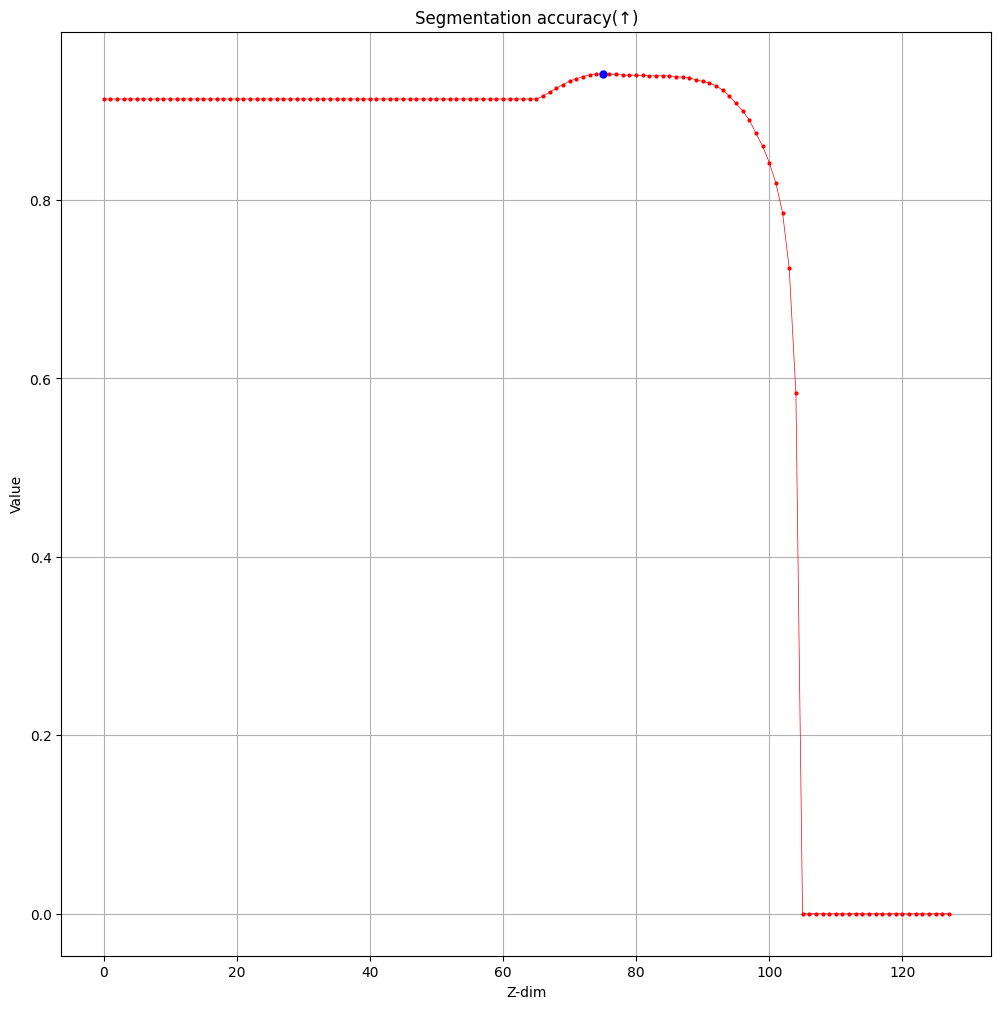

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold2/test/
Patient id: 0_01776461
chch:11 (128,)
chch:22 (128,)
chch:33 87


interactive(children=(IntSlider(value=107, description='z', max=127, min=87), Output()), _dom_classes=('widget…

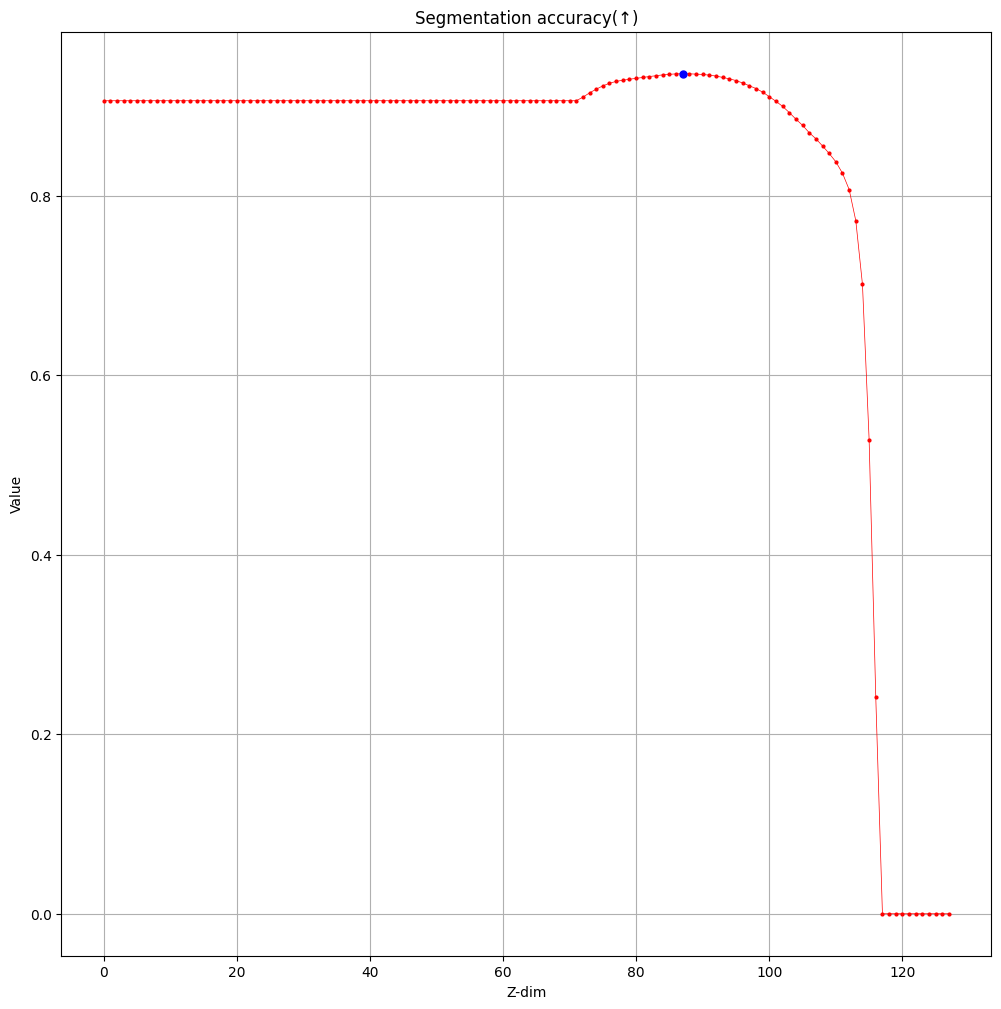

Patient id: 1_01804929
chch:11 (128,)
chch:22 (128,)
chch:33 86


interactive(children=(IntSlider(value=106, description='z', max=127, min=86), Output()), _dom_classes=('widget…

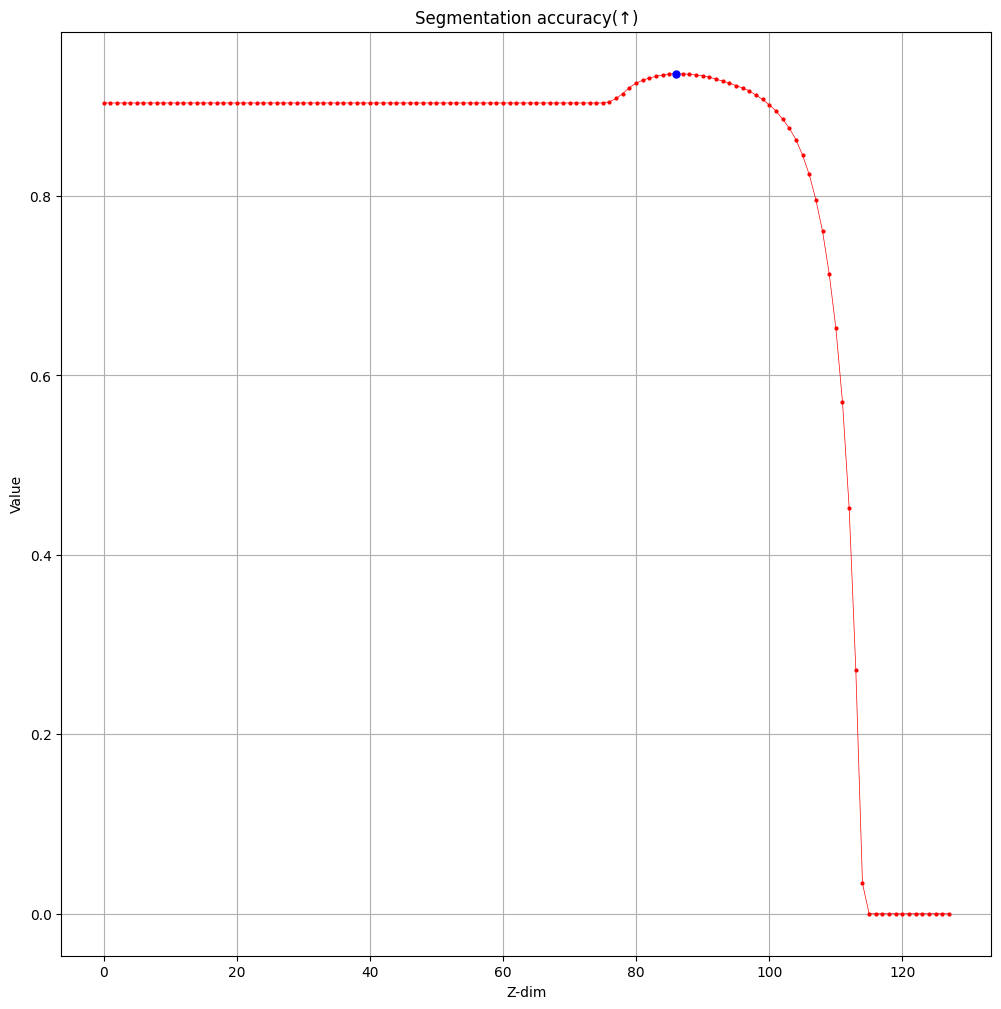

Patient id: 2_01904278
chch:11 (128,)
chch:22 (128,)
chch:33 58


interactive(children=(IntSlider(value=92, description='z', max=127, min=58), Output()), _dom_classes=('widget-…

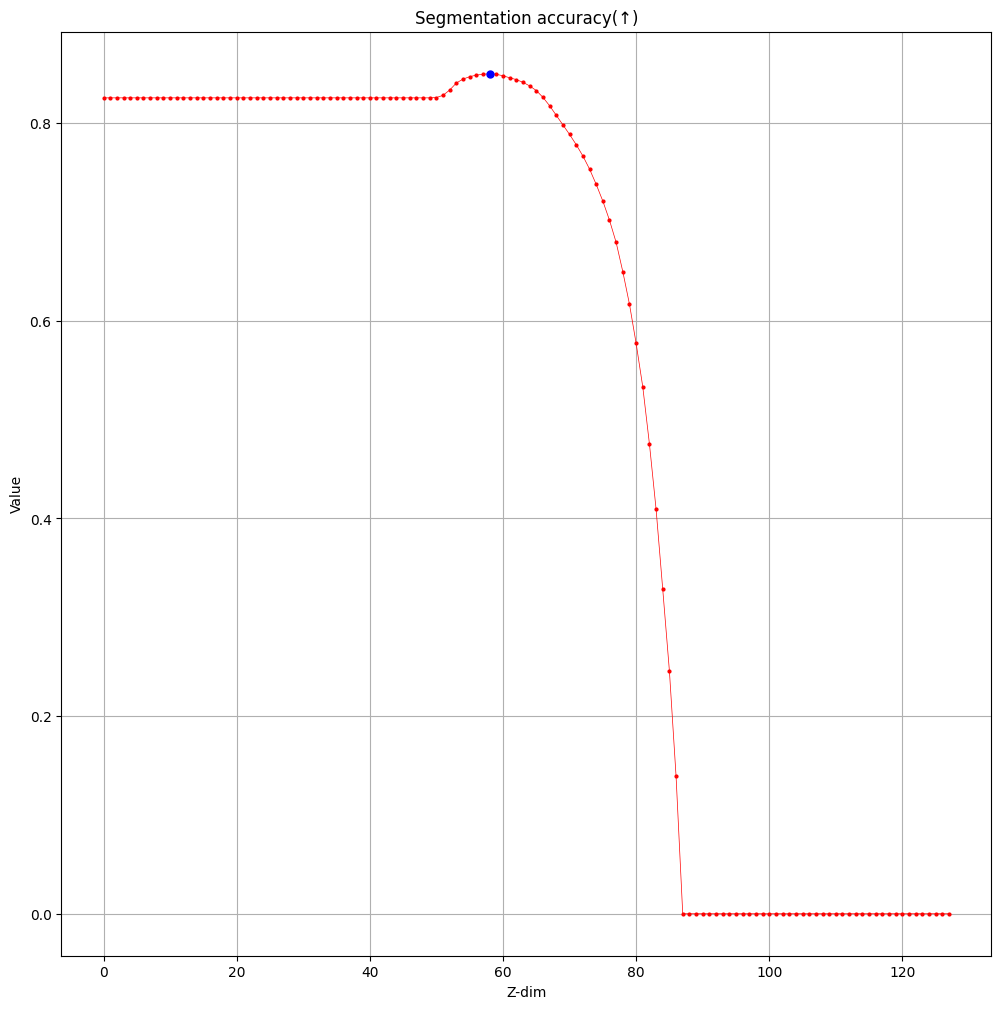

Patient id: 3_01972333
chch:11 (128,)
chch:22 (128,)
chch:33 43


interactive(children=(IntSlider(value=85, description='z', max=127, min=43), Output()), _dom_classes=('widget-…

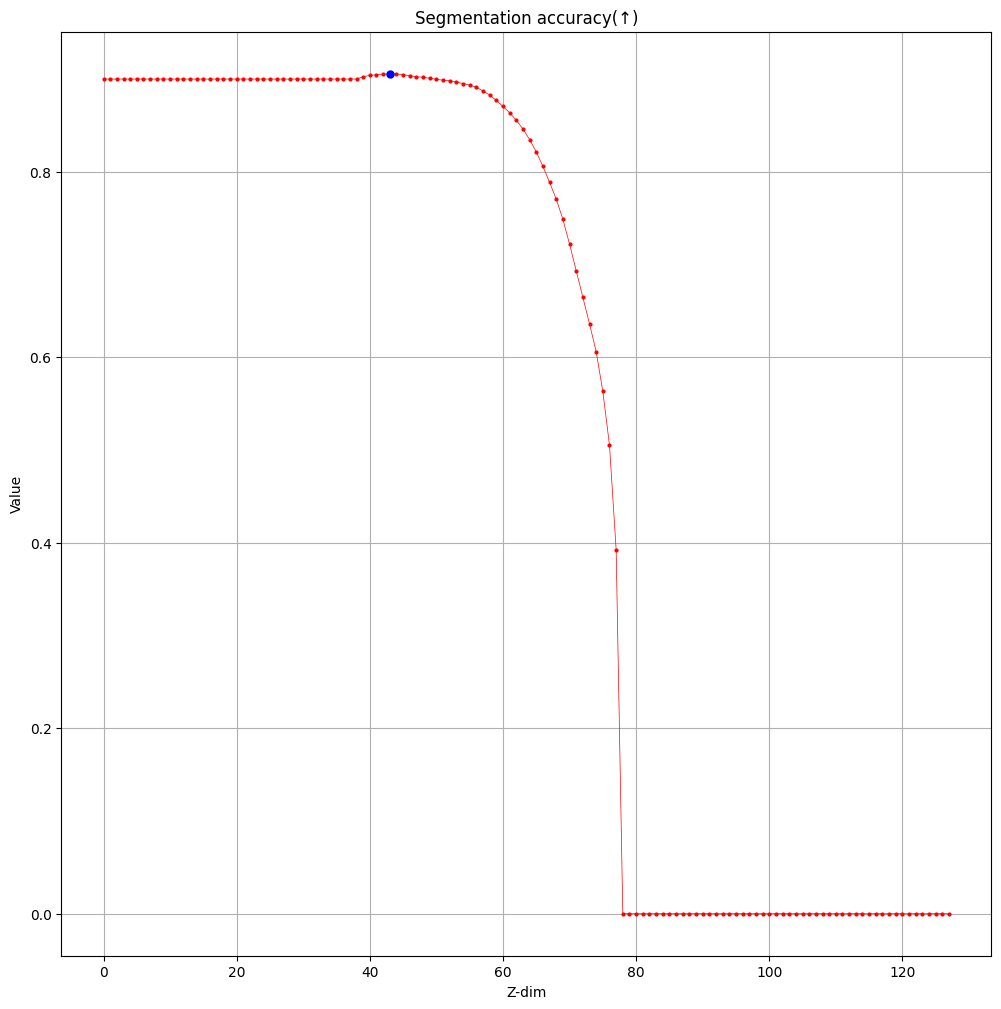

Patient id: 4_01986175
chch:11 (128,)
chch:22 (128,)
chch:33 38


interactive(children=(IntSlider(value=82, description='z', max=127, min=38), Output()), _dom_classes=('widget-…

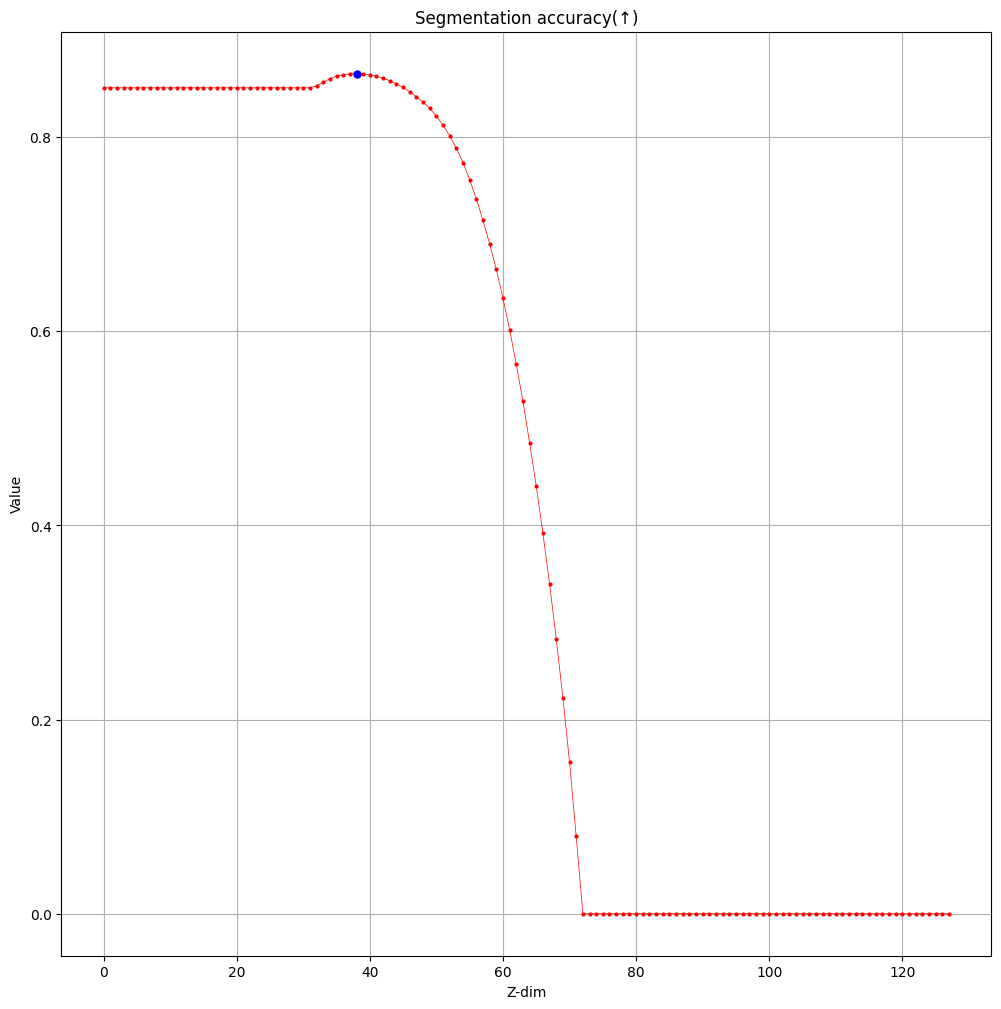

Patient id: 5_02009786
chch:11 (128,)
chch:22 (128,)
chch:33 83


interactive(children=(IntSlider(value=105, description='z', max=127, min=83), Output()), _dom_classes=('widget…

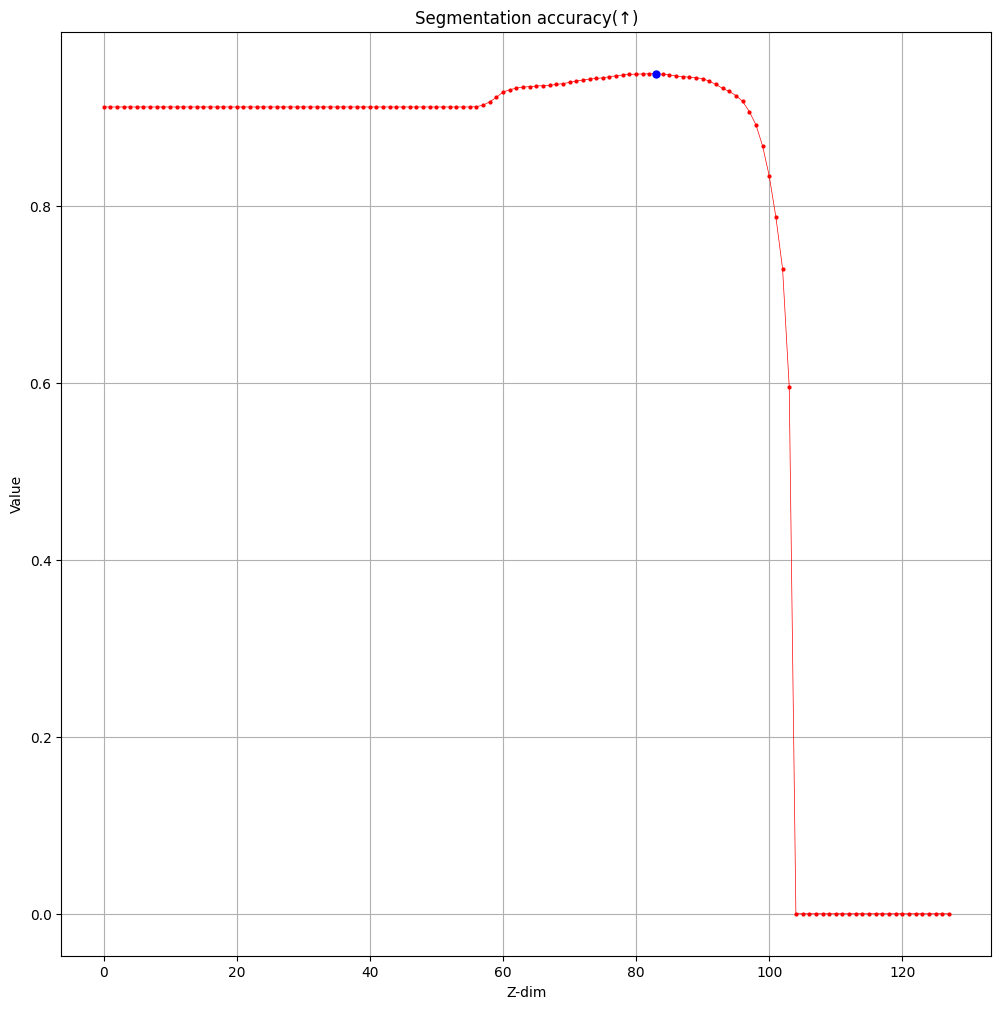

Patient id: 6_02063805
chch:11 (128,)
chch:22 (128,)
chch:33 53


interactive(children=(IntSlider(value=90, description='z', max=127, min=53), Output()), _dom_classes=('widget-…

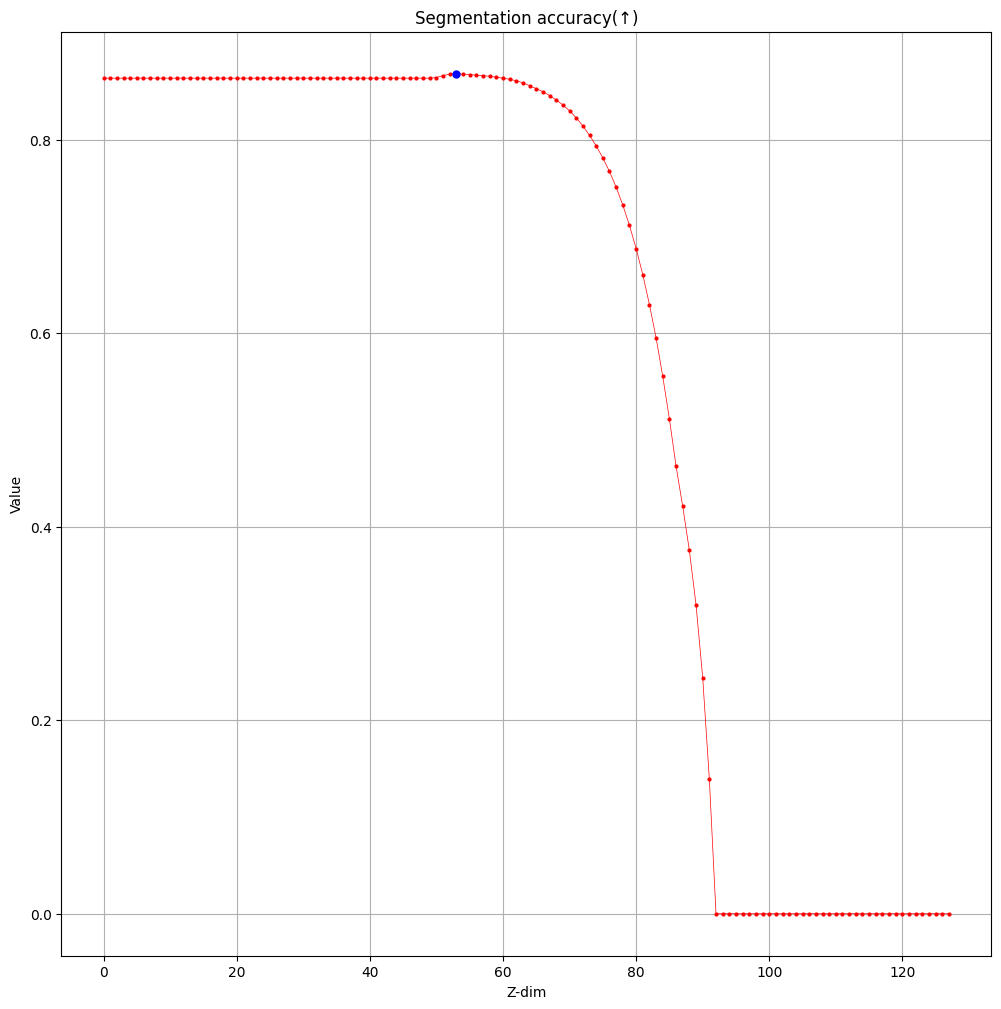

Patient id: 7_02141859
chch:11 (128,)
chch:22 (128,)
chch:33 28


interactive(children=(IntSlider(value=77, description='z', max=127, min=28), Output()), _dom_classes=('widget-…

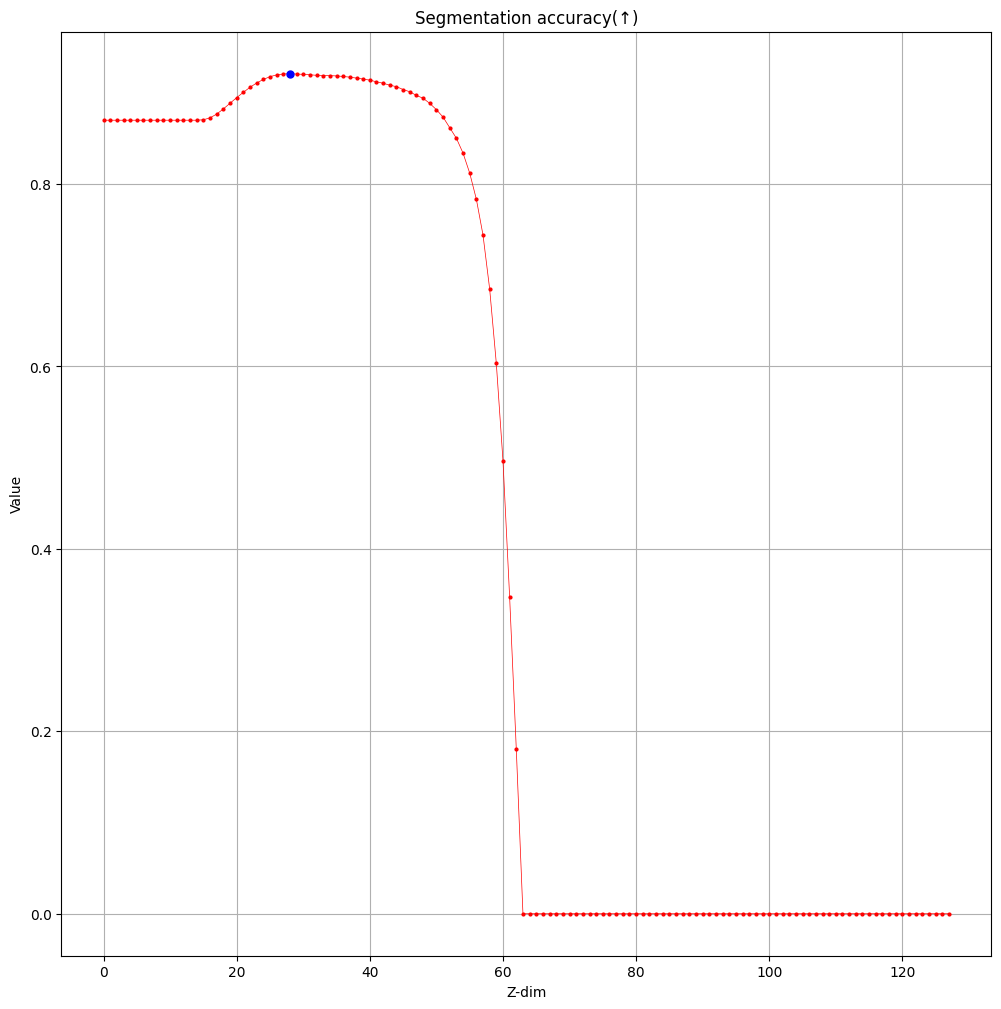

Patient id: 8_02150142
chch:11 (128,)
chch:22 (128,)
chch:33 85


interactive(children=(IntSlider(value=106, description='z', max=127, min=85), Output()), _dom_classes=('widget…

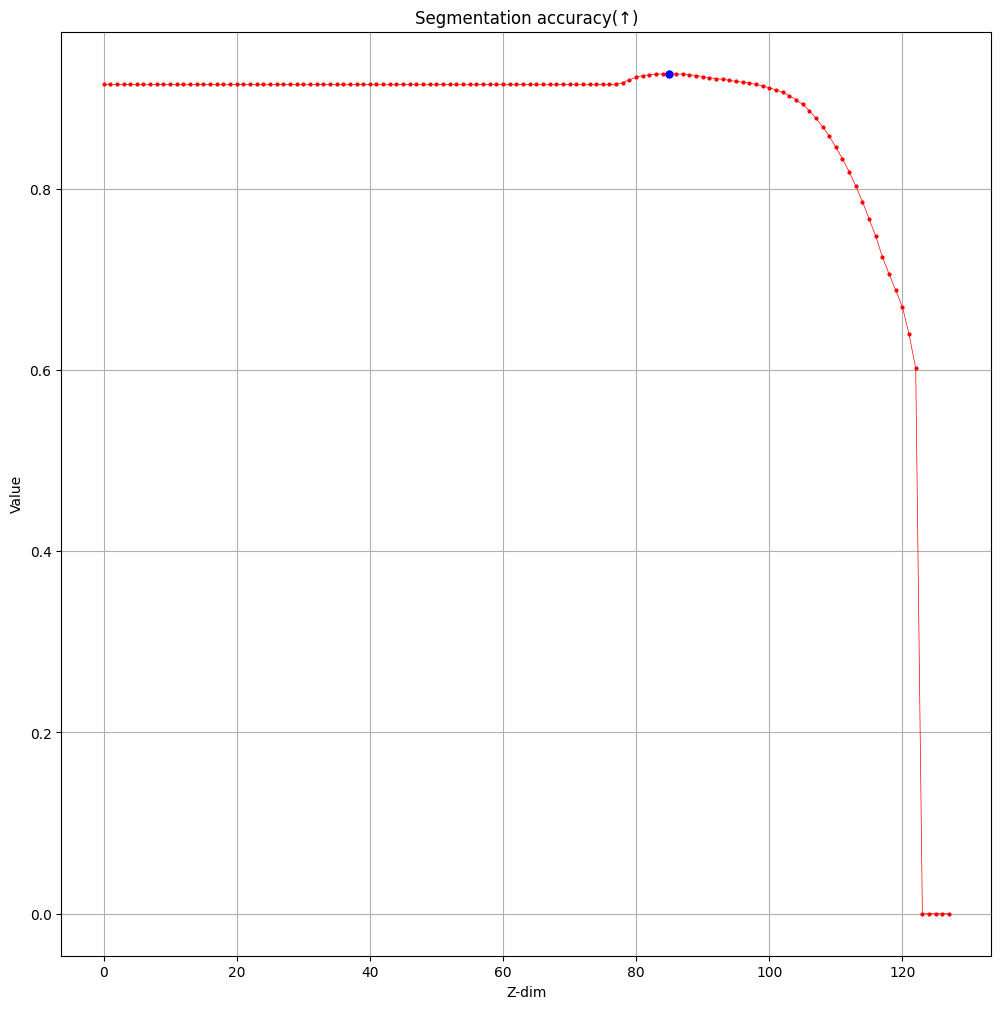

Patient id: 9_02153845
chch:11 (128,)
chch:22 (128,)
chch:33 60


interactive(children=(IntSlider(value=93, description='z', max=127, min=60), Output()), _dom_classes=('widget-…

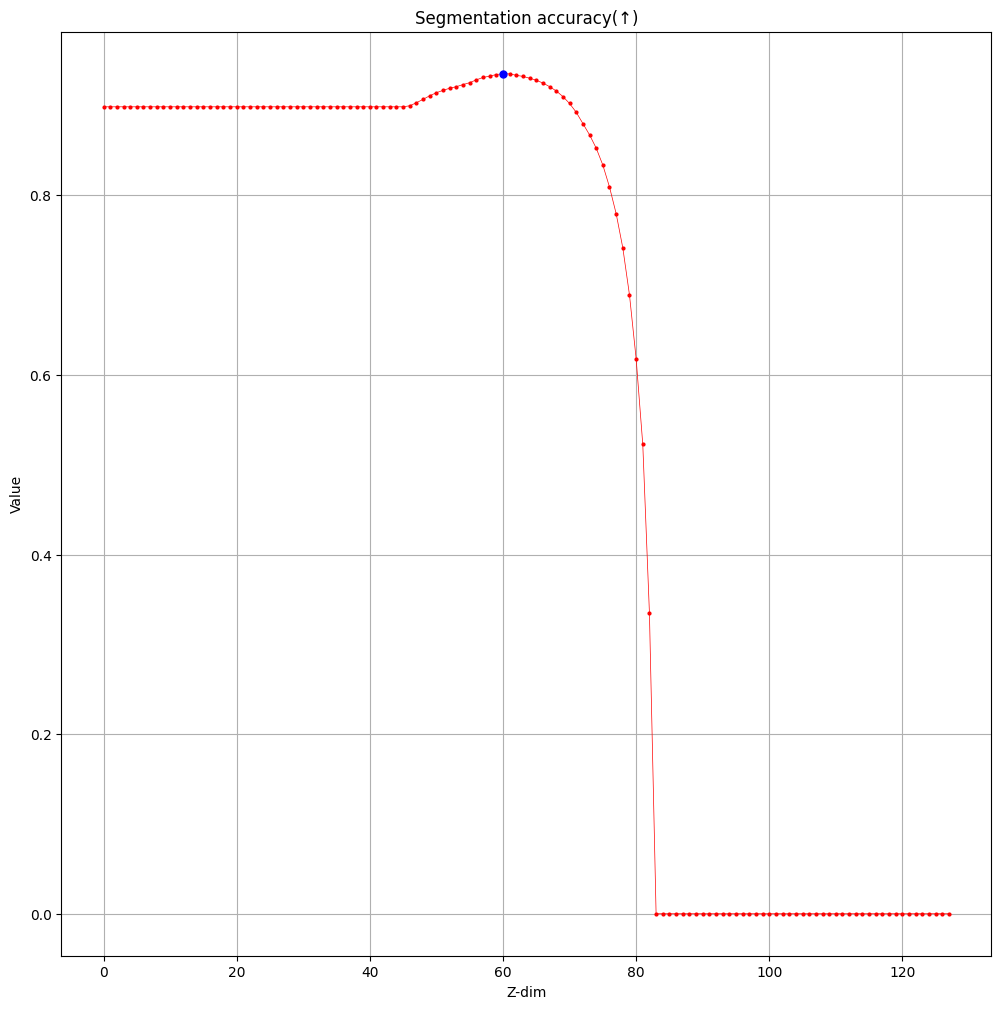

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold3/test/
Patient id: 0_02161060
chch:11 (128,)
chch:22 (128,)
chch:33 87


interactive(children=(IntSlider(value=107, description='z', max=127, min=87), Output()), _dom_classes=('widget…

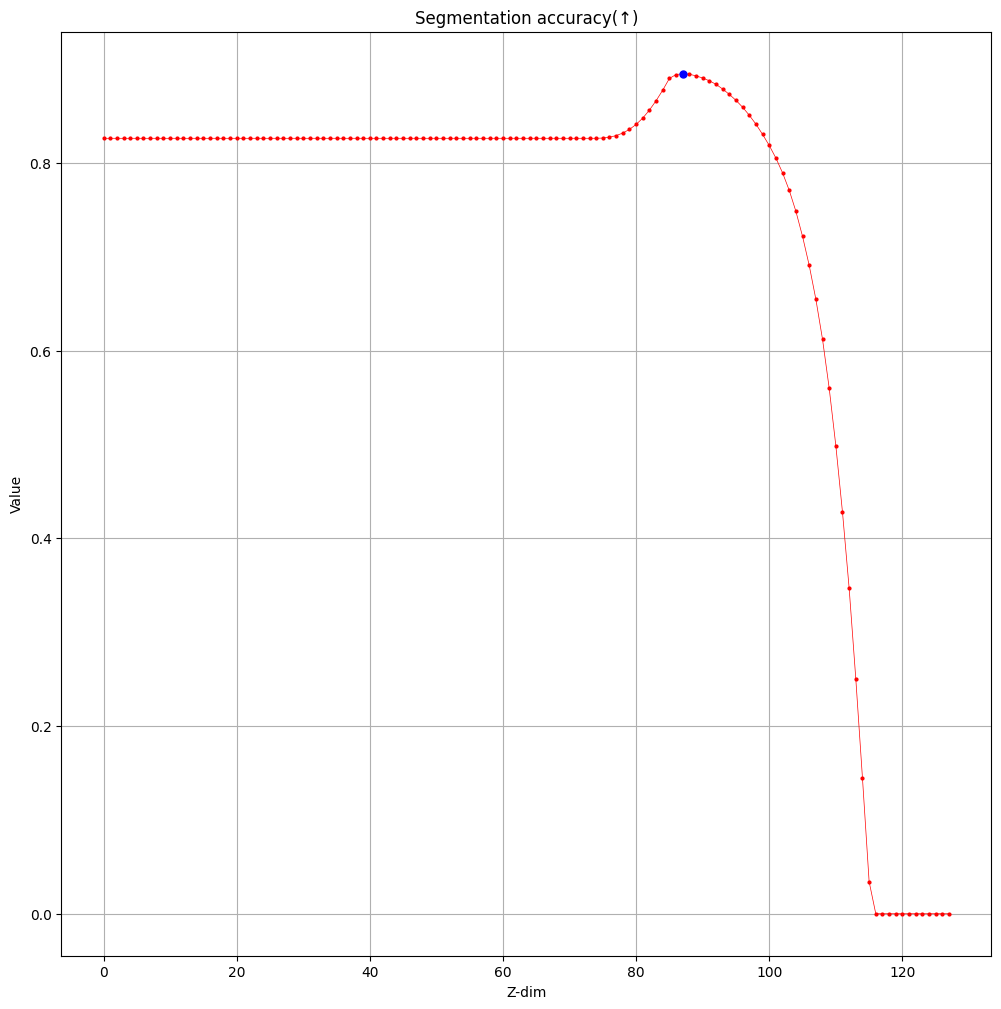

Patient id: 1_02179375
chch:11 (128,)
chch:22 (128,)
chch:33 56


interactive(children=(IntSlider(value=91, description='z', max=127, min=56), Output()), _dom_classes=('widget-…

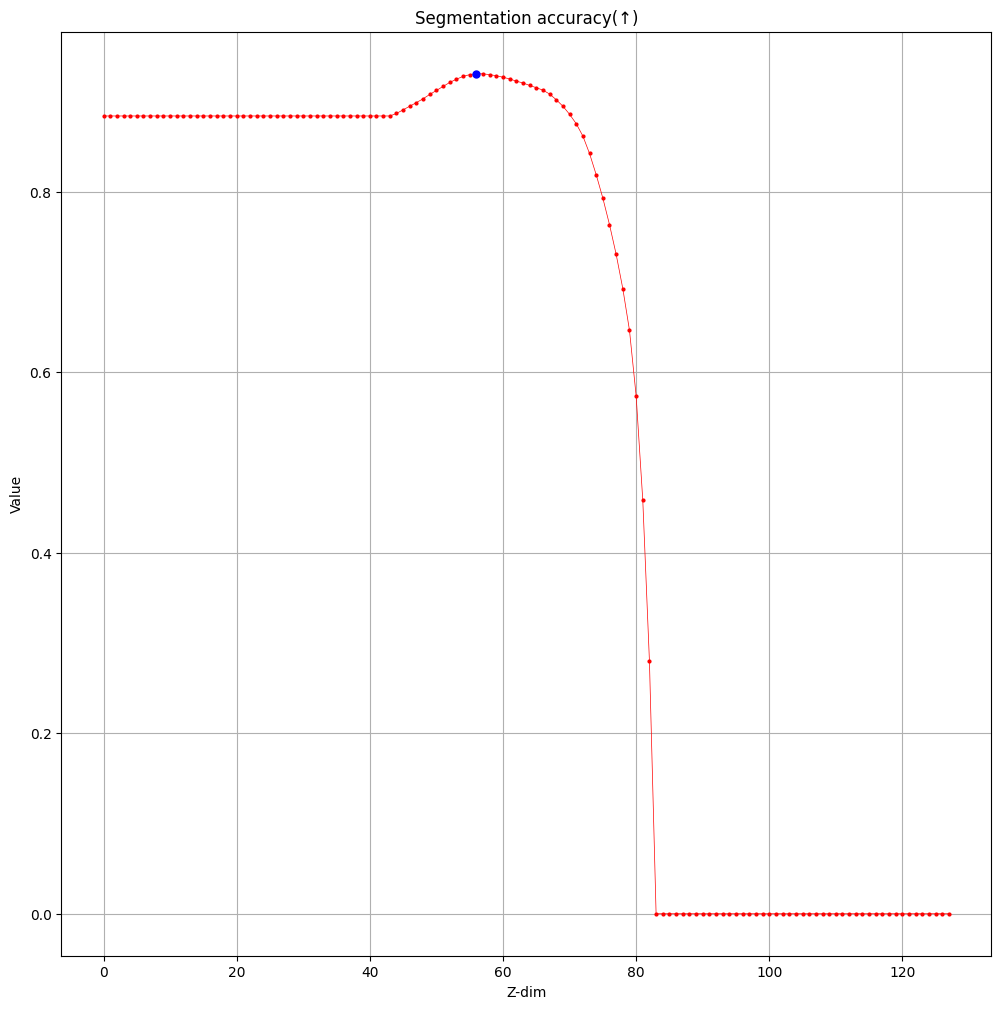

Patient id: 2_02179650
chch:11 (128,)
chch:22 (128,)
chch:33 52


interactive(children=(IntSlider(value=89, description='z', max=127, min=52), Output()), _dom_classes=('widget-…

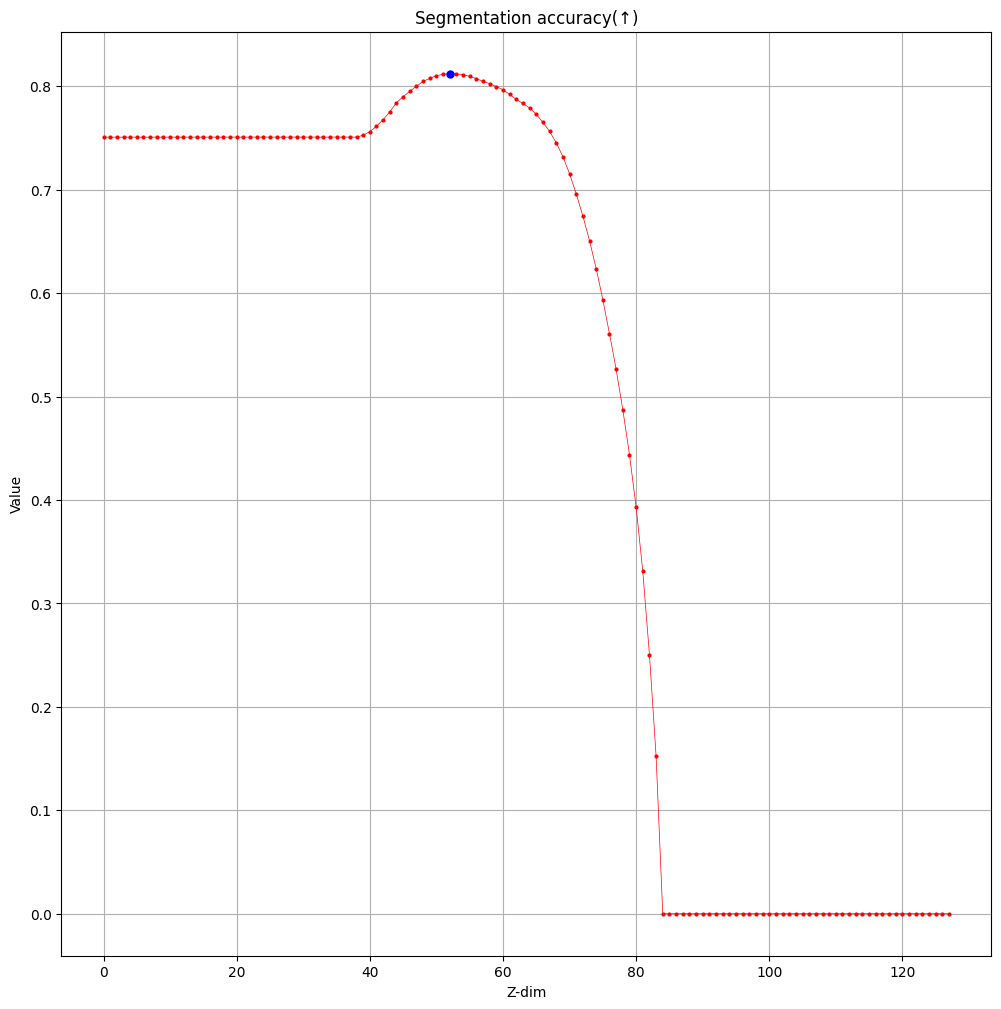

Patient id: 3_02286469
chch:11 (128,)
chch:22 (128,)
chch:33 64


interactive(children=(IntSlider(value=95, description='z', max=127, min=64), Output()), _dom_classes=('widget-…

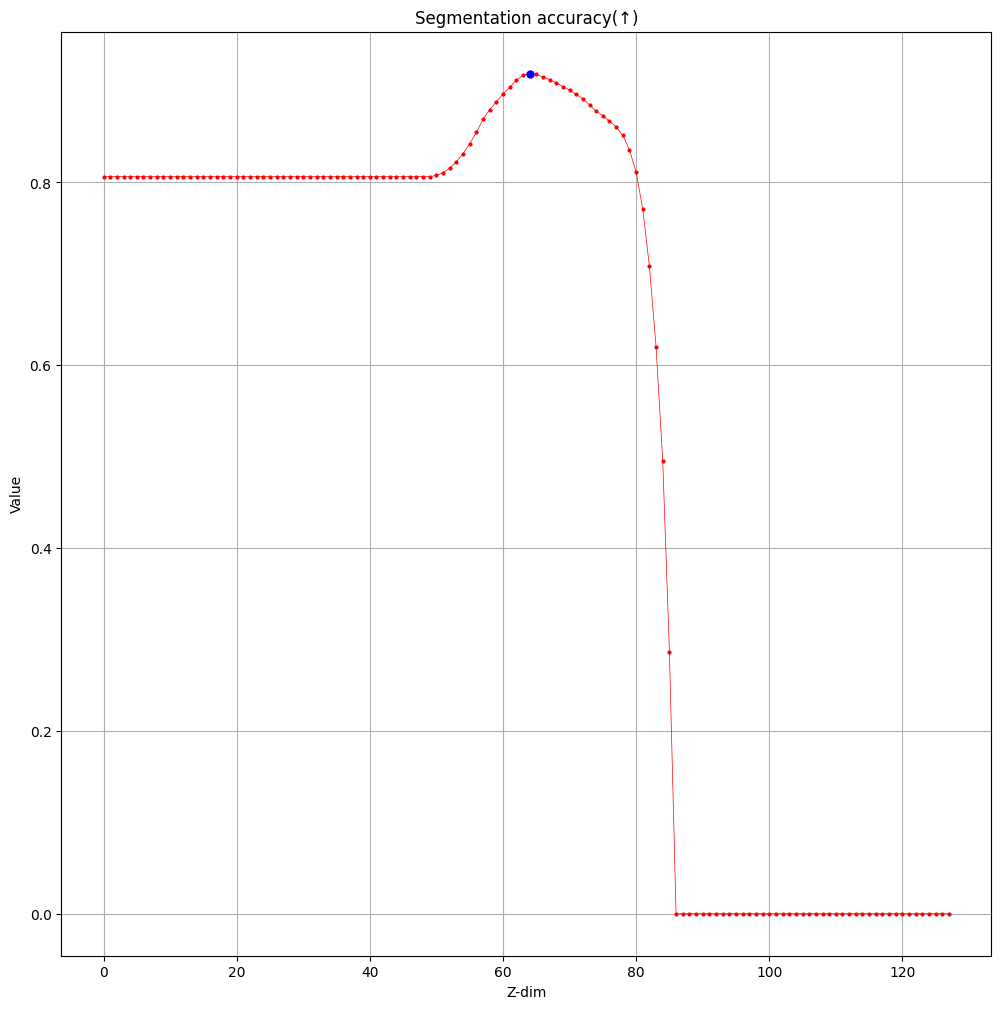

Patient id: 4_02289873
chch:11 (128,)
chch:22 (128,)
chch:33 74


interactive(children=(IntSlider(value=100, description='z', max=127, min=74), Output()), _dom_classes=('widget…

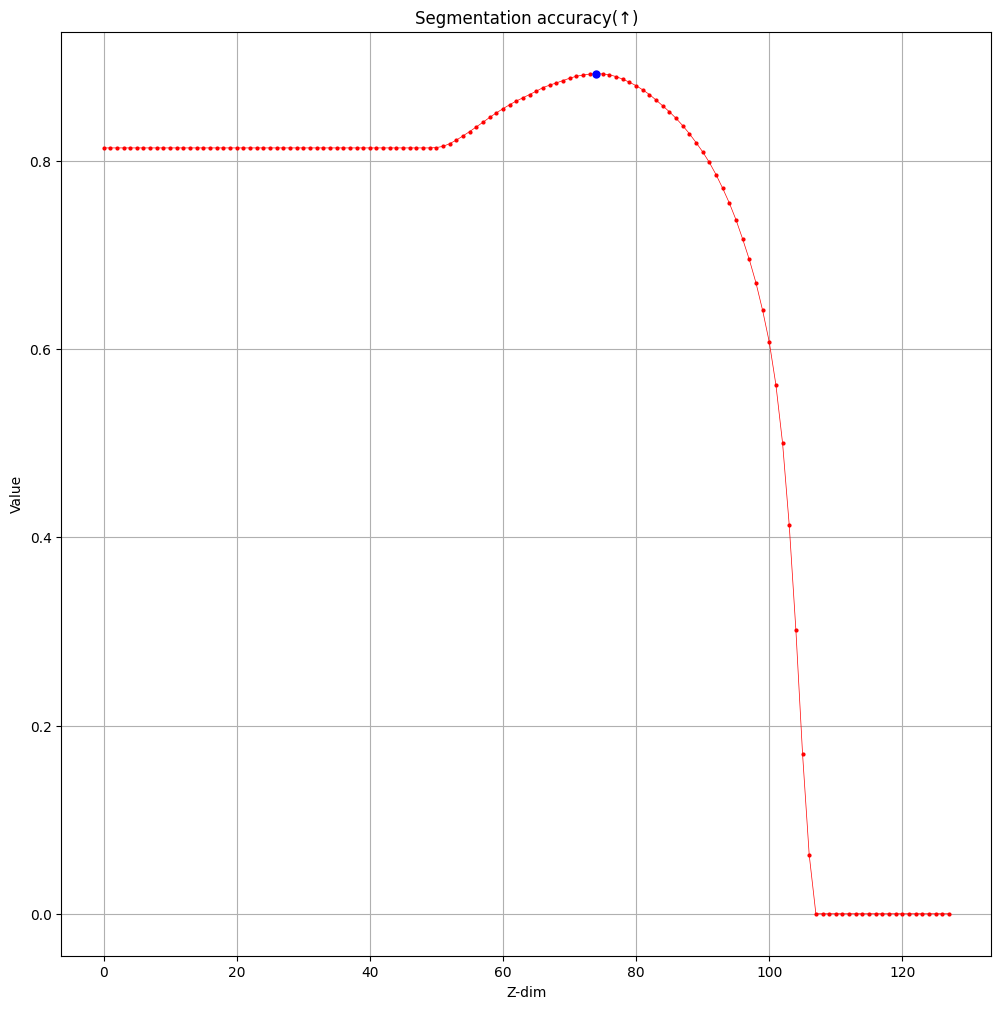

Patient id: 5_02348071
chch:11 (128,)
chch:22 (128,)
chch:33 71


interactive(children=(IntSlider(value=99, description='z', max=127, min=71), Output()), _dom_classes=('widget-…

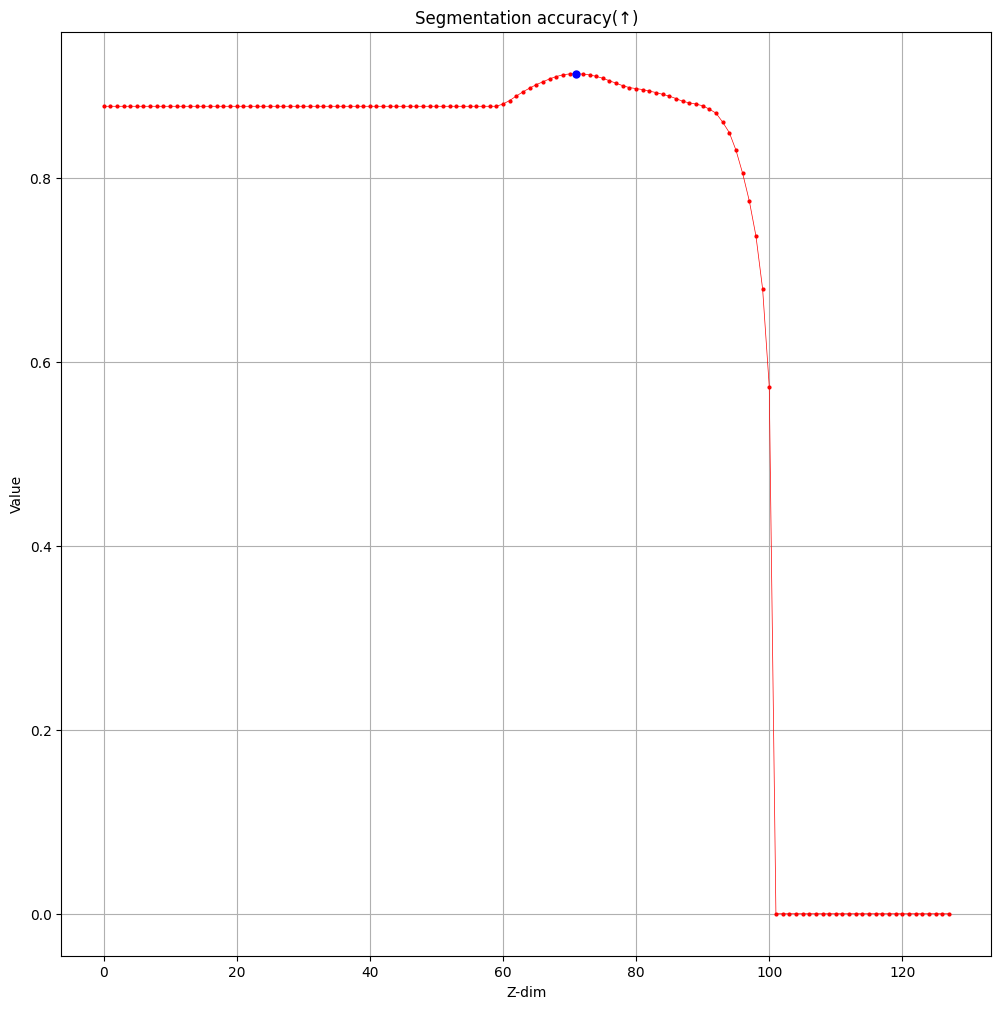

Patient id: 6_02394910
chch:11 (128,)
chch:22 (128,)
chch:33 35


interactive(children=(IntSlider(value=81, description='z', max=127, min=35), Output()), _dom_classes=('widget-…

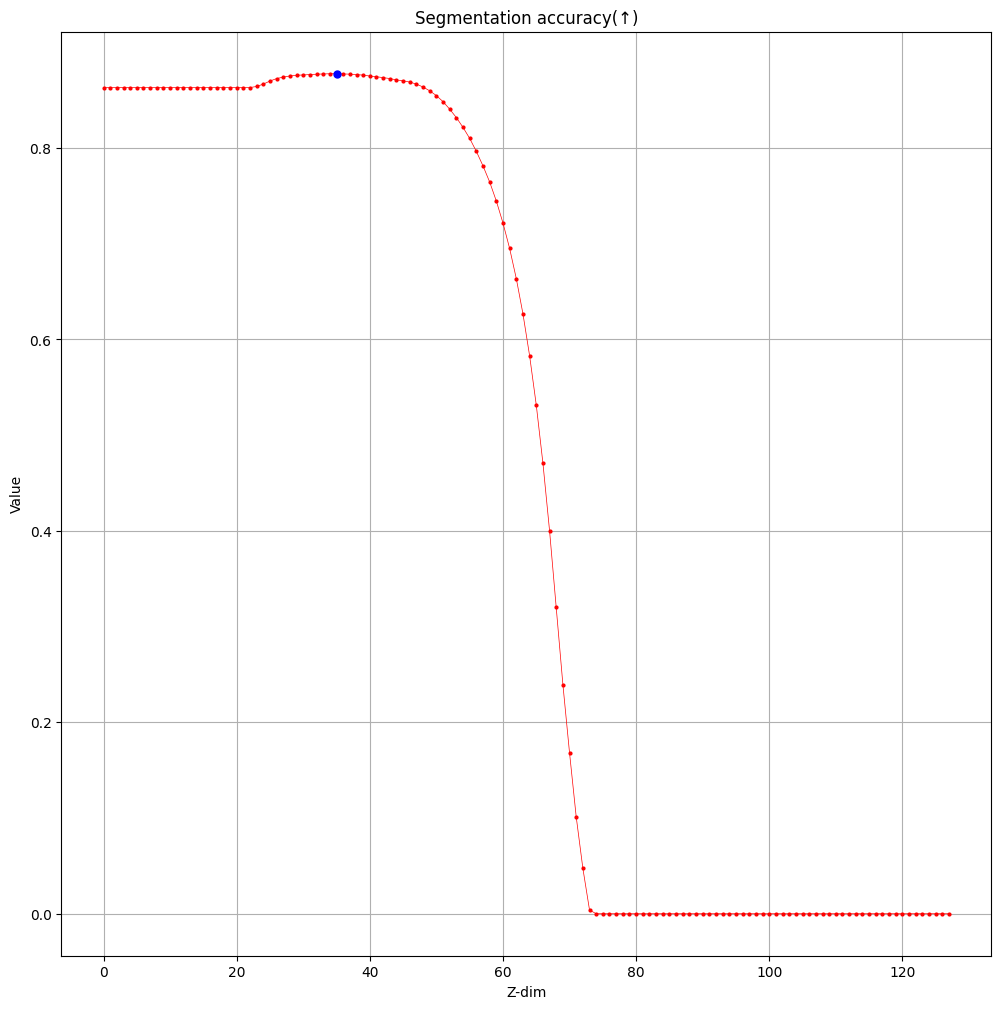

Patient id: 7_02572186
chch:11 (128,)
chch:22 (128,)
chch:33 77


interactive(children=(IntSlider(value=102, description='z', max=127, min=77), Output()), _dom_classes=('widget…

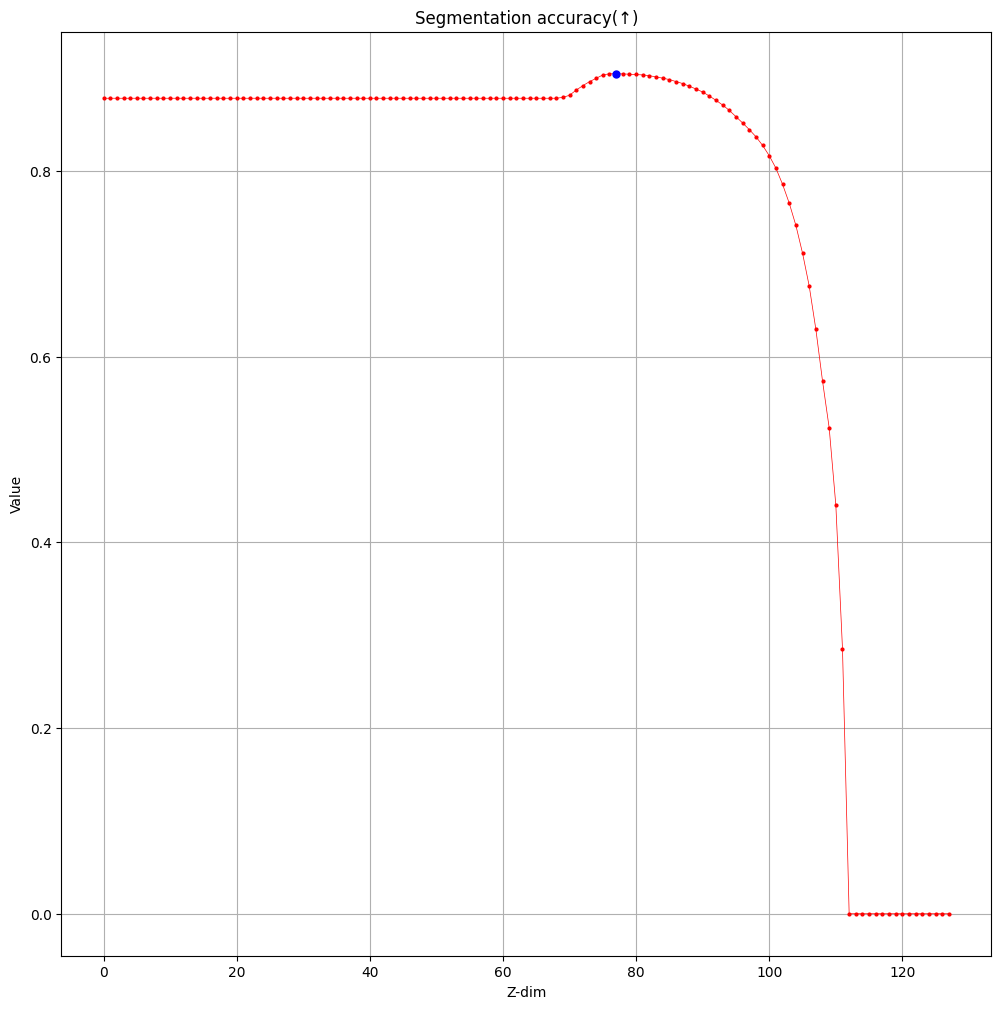

Patient id: 8_02573669
chch:11 (128,)
chch:22 (128,)
chch:33 67


interactive(children=(IntSlider(value=97, description='z', max=127, min=67), Output()), _dom_classes=('widget-…

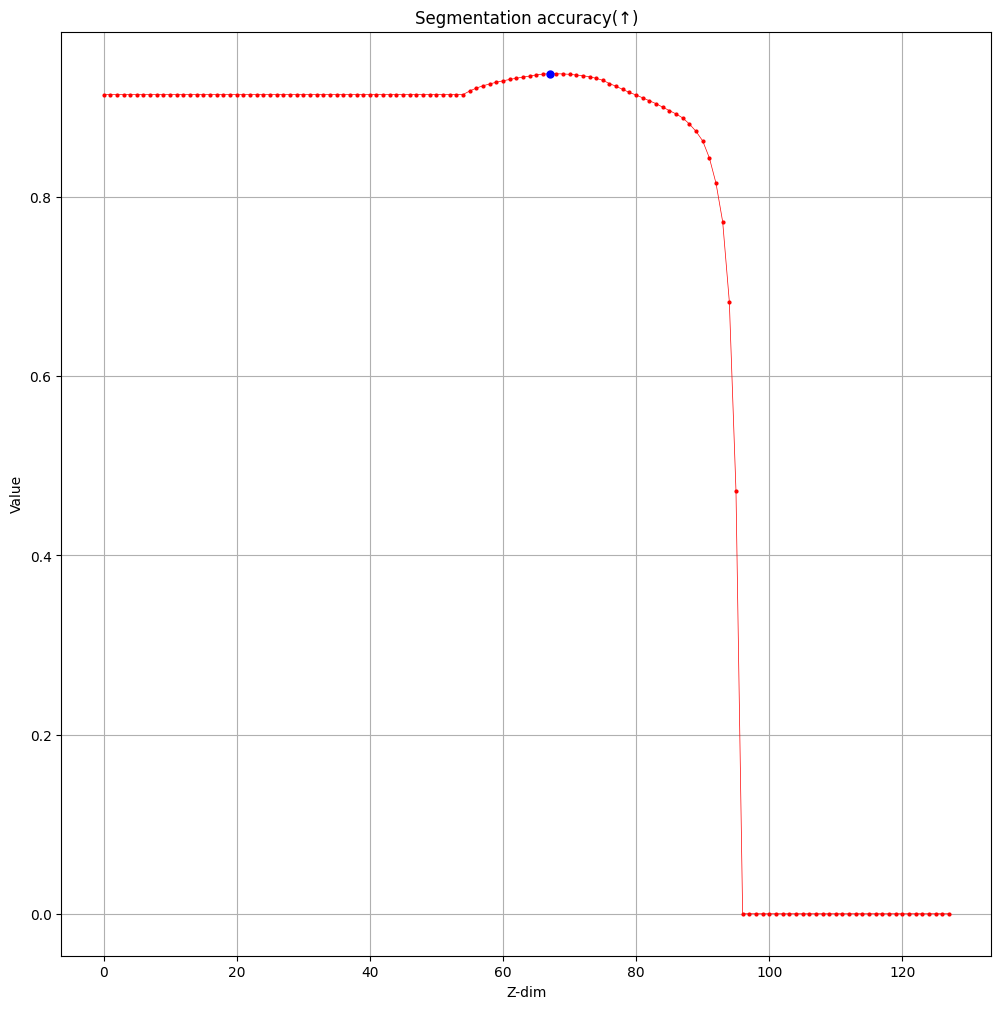

Patient id: 9_02603745
chch:11 (128,)
chch:22 (128,)
chch:33 75


interactive(children=(IntSlider(value=101, description='z', max=127, min=75), Output()), _dom_classes=('widget…

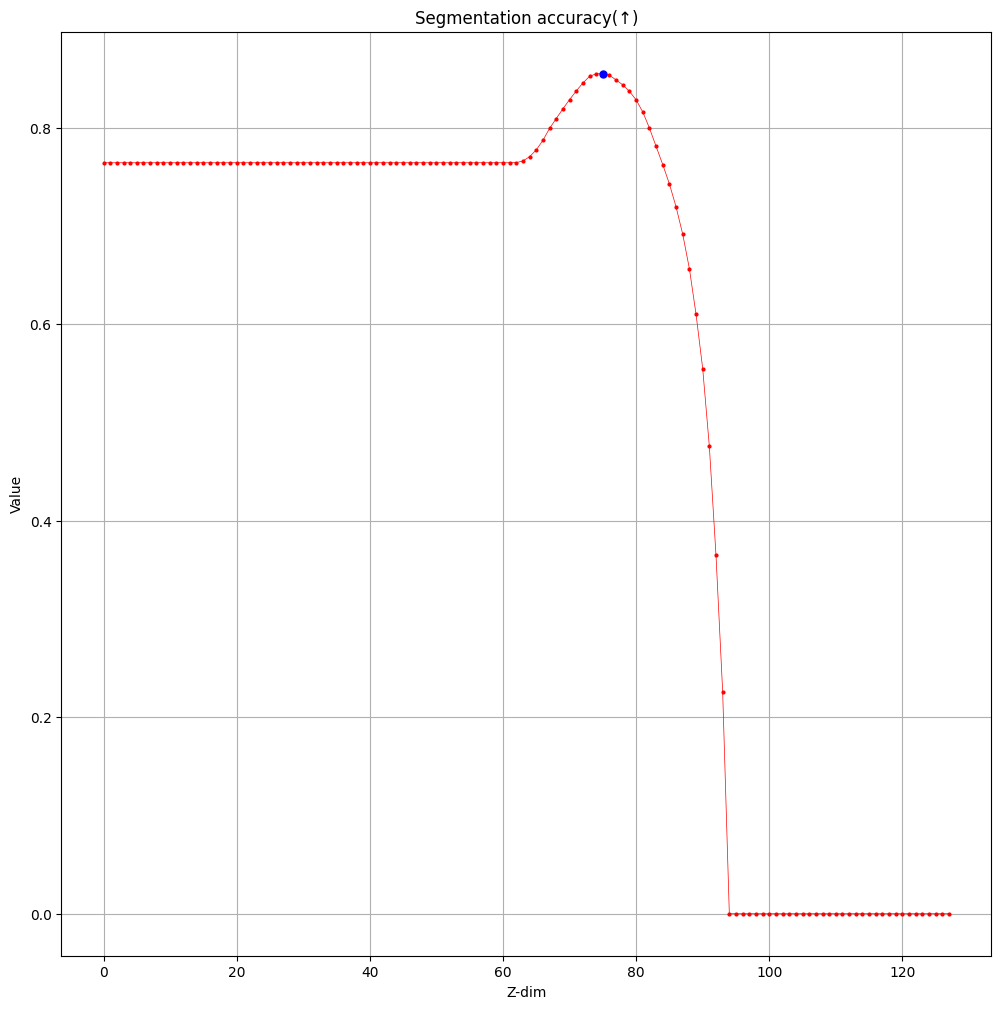

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold4/test/
Patient id: 0_02610498
chch:11 (128,)
chch:22 (128,)
chch:33 75


interactive(children=(IntSlider(value=101, description='z', max=127, min=75), Output()), _dom_classes=('widget…

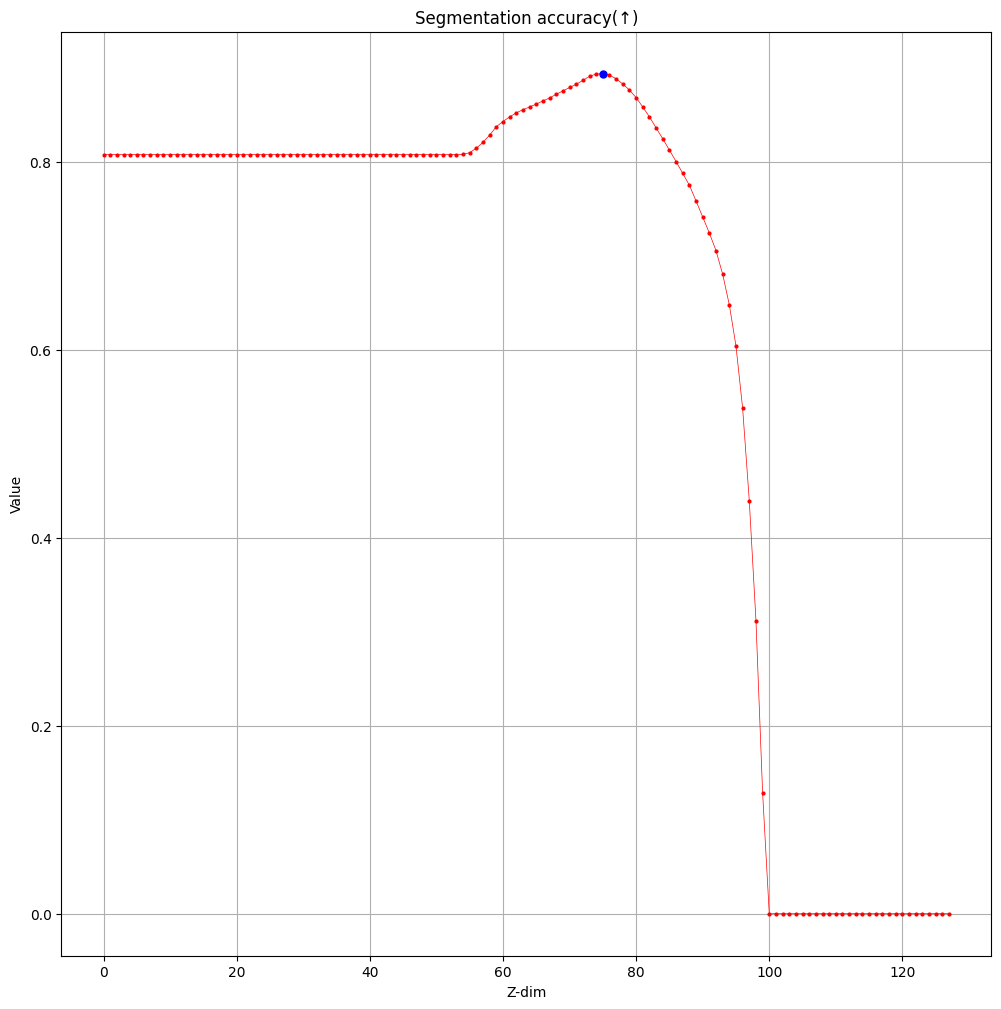

Patient id: 1_02744296
chch:11 (128,)
chch:22 (128,)
chch:33 44


interactive(children=(IntSlider(value=85, description='z', max=127, min=44), Output()), _dom_classes=('widget-…

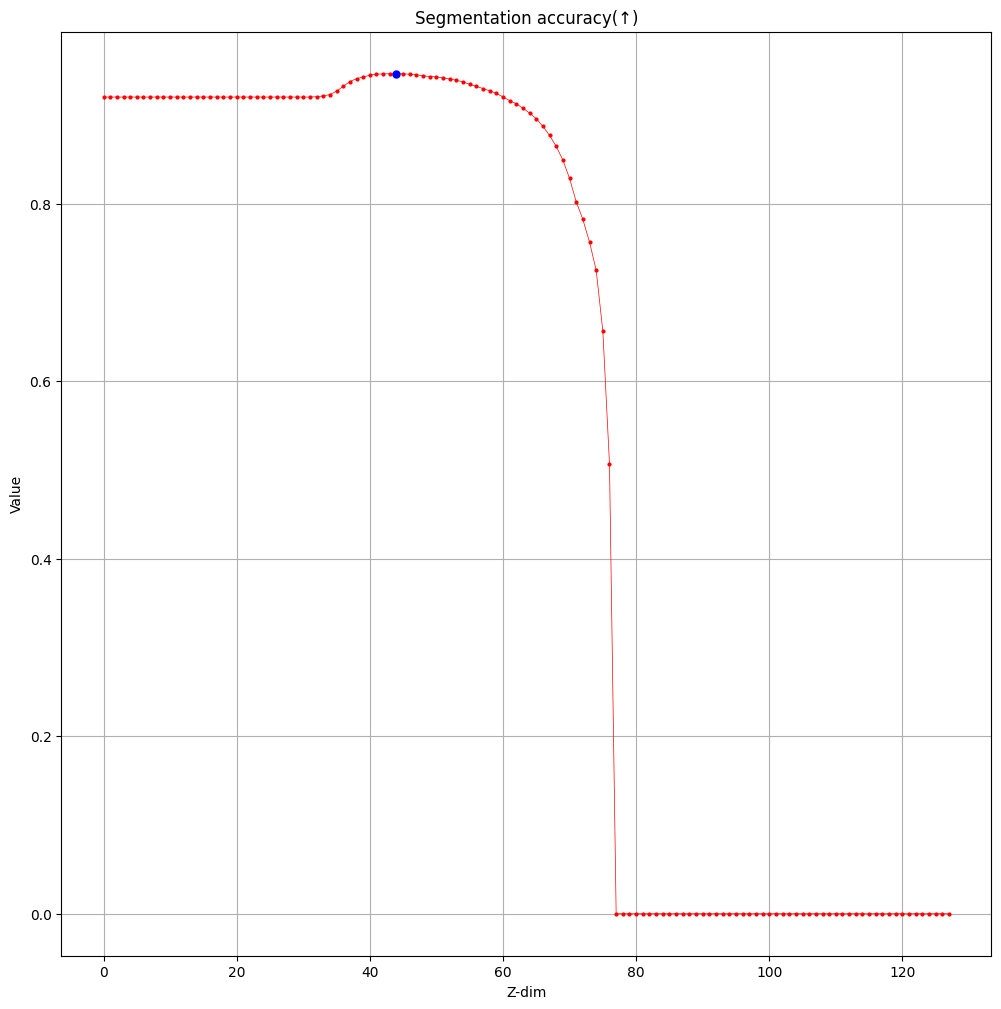

Patient id: 2_02786444
chch:11 (128,)
chch:22 (128,)
chch:33 67


interactive(children=(IntSlider(value=97, description='z', max=127, min=67), Output()), _dom_classes=('widget-…

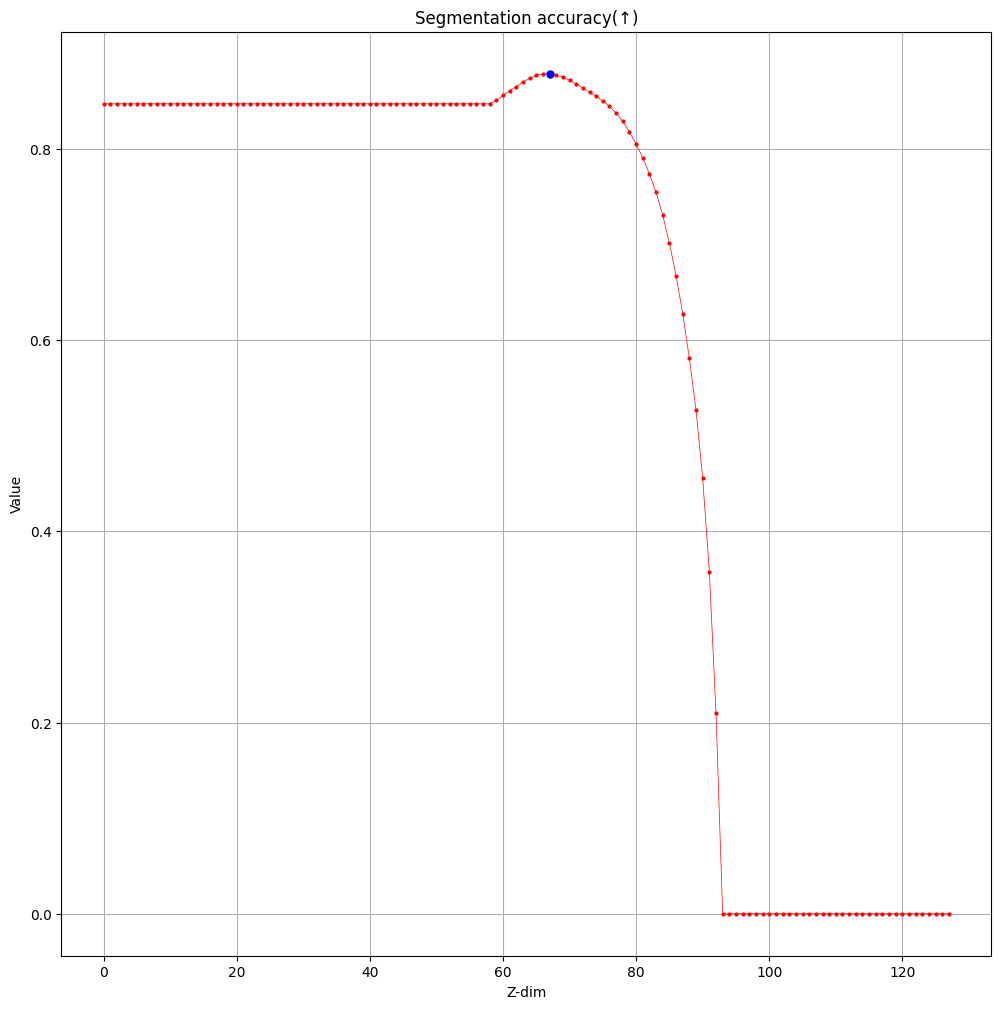

Patient id: 3_02793452
chch:11 (128,)
chch:22 (128,)
chch:33 72


interactive(children=(IntSlider(value=99, description='z', max=127, min=72), Output()), _dom_classes=('widget-…

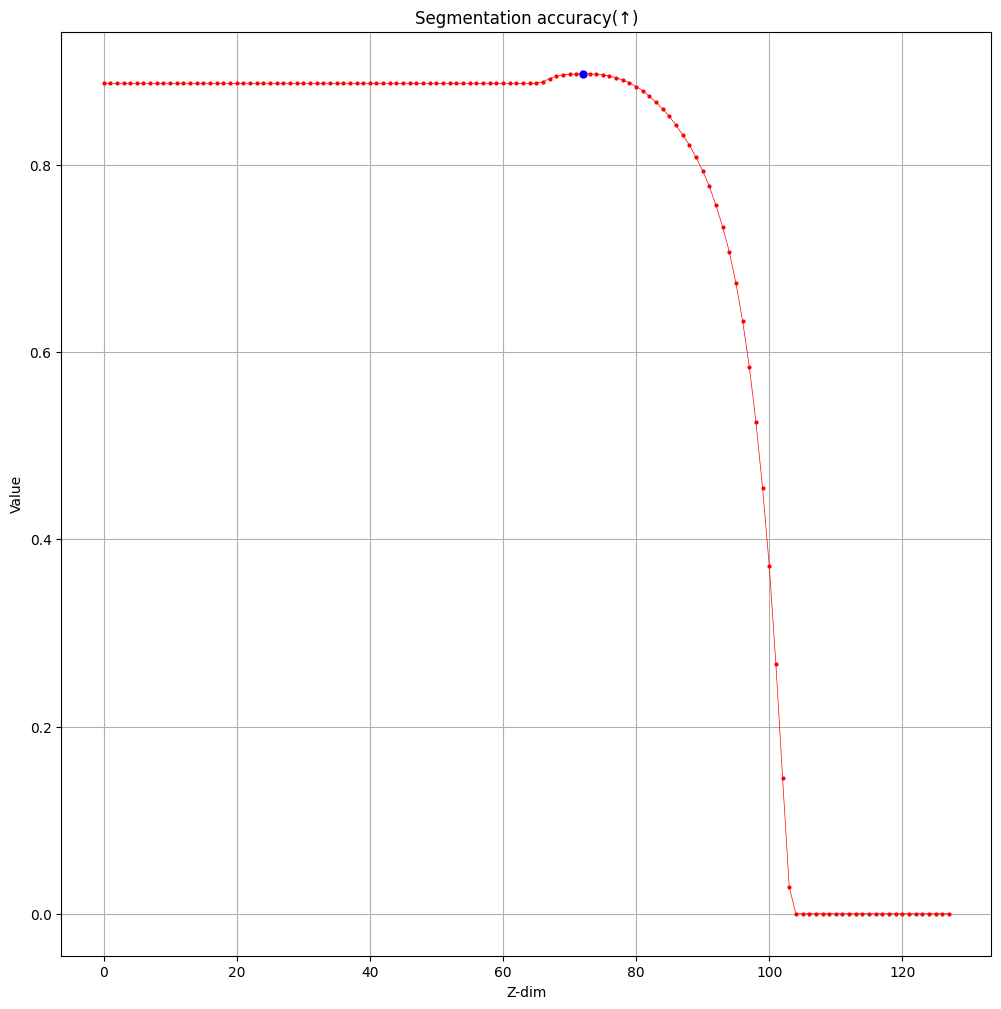

Patient id: 4_02820034
chch:11 (128,)
chch:22 (128,)
chch:33 55


interactive(children=(IntSlider(value=91, description='z', max=127, min=55), Output()), _dom_classes=('widget-…

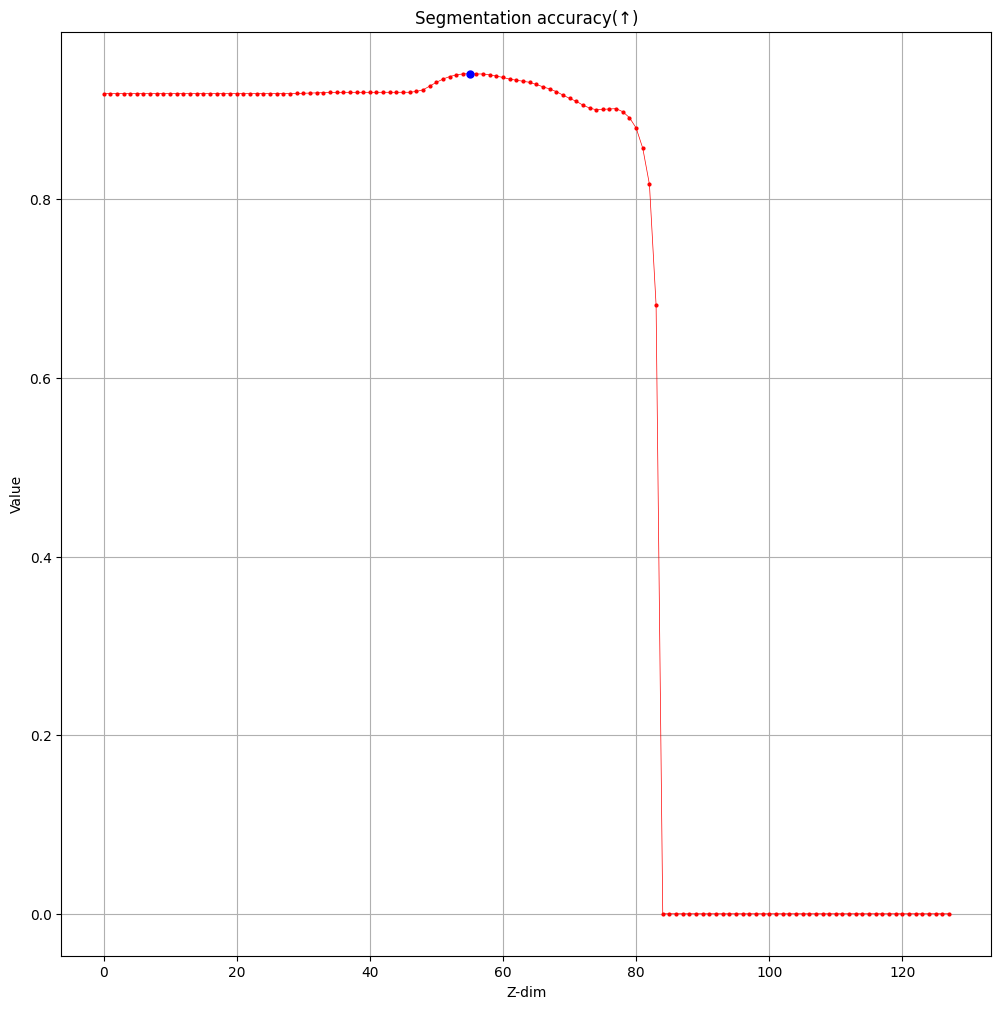

Patient id: 5_02882776
chch:11 (128,)
chch:22 (128,)
chch:33 46


interactive(children=(IntSlider(value=86, description='z', max=127, min=46), Output()), _dom_classes=('widget-…

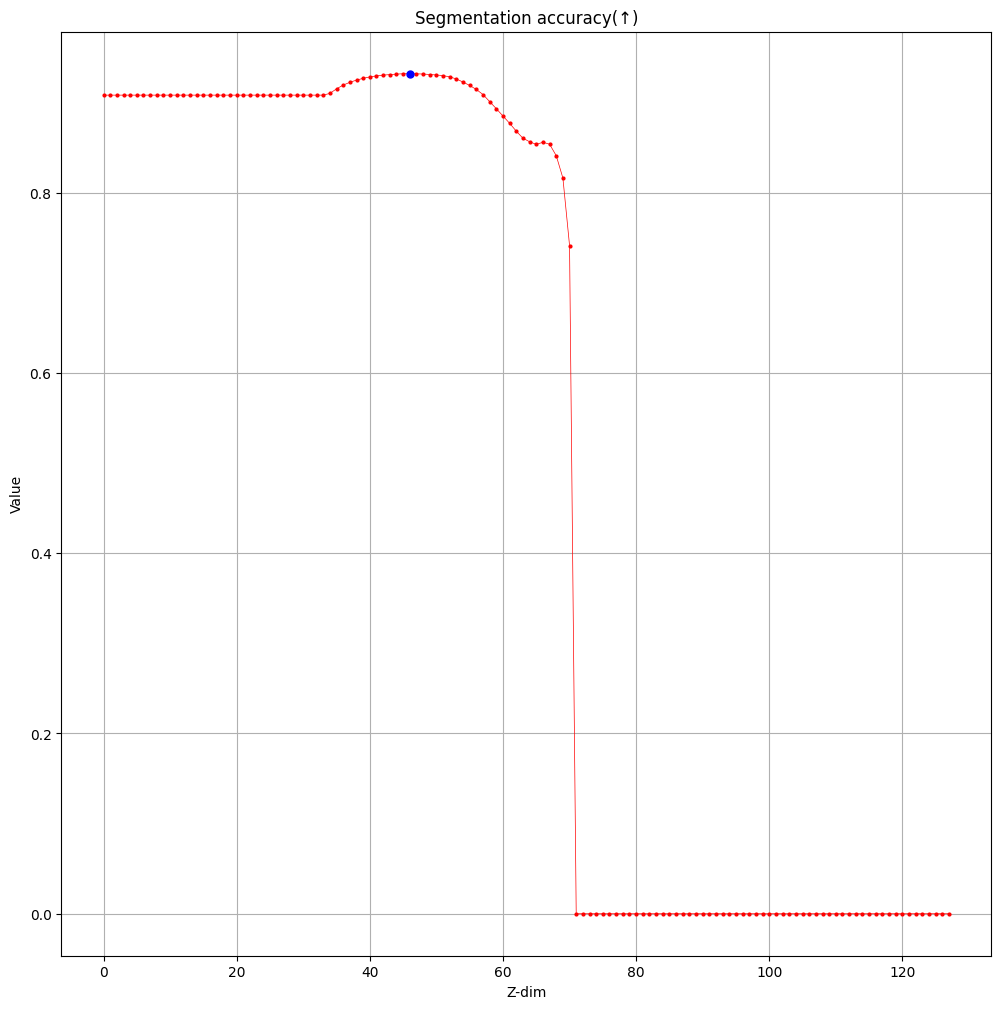

Patient id: 6_02948957
chch:11 (128,)
chch:22 (128,)
chch:33 60


interactive(children=(IntSlider(value=93, description='z', max=127, min=60), Output()), _dom_classes=('widget-…

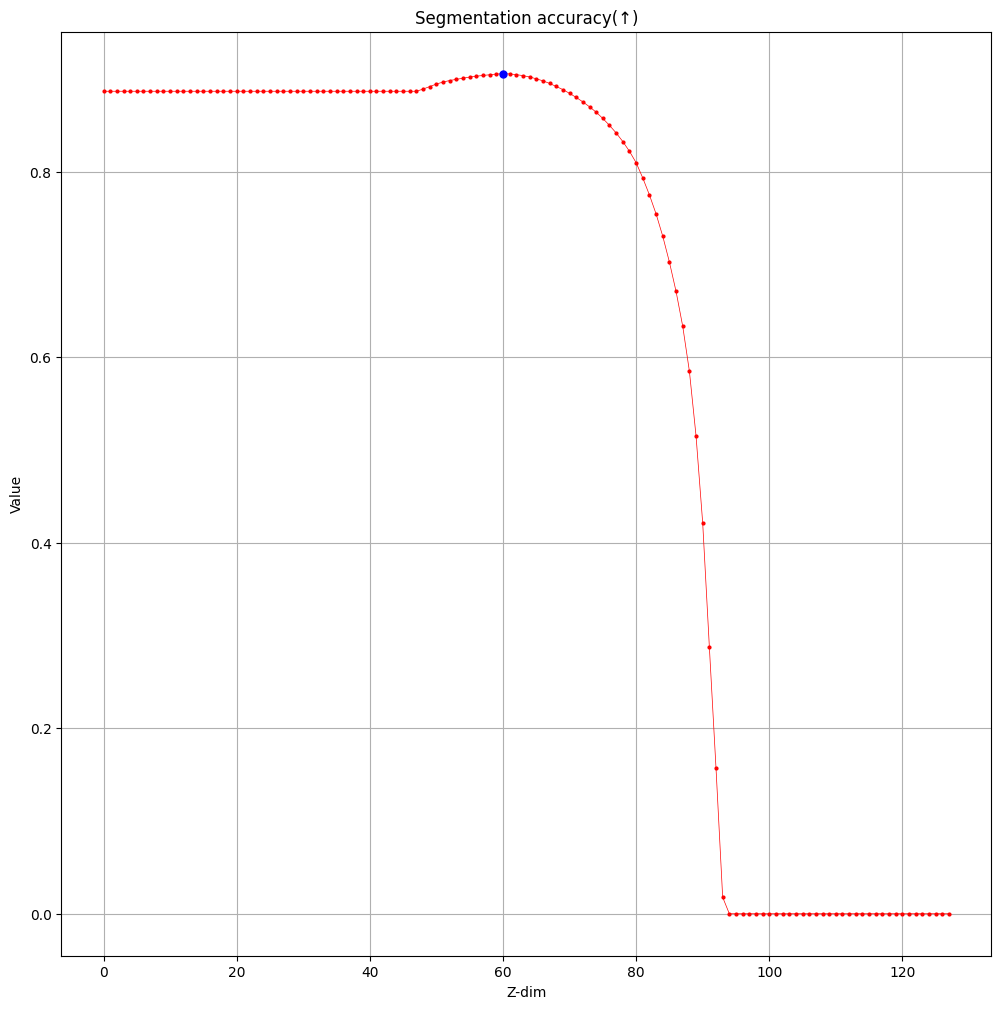

Patient id: 7_02949843
chch:11 (128,)
chch:22 (128,)
chch:33 75


interactive(children=(IntSlider(value=101, description='z', max=127, min=75), Output()), _dom_classes=('widget…

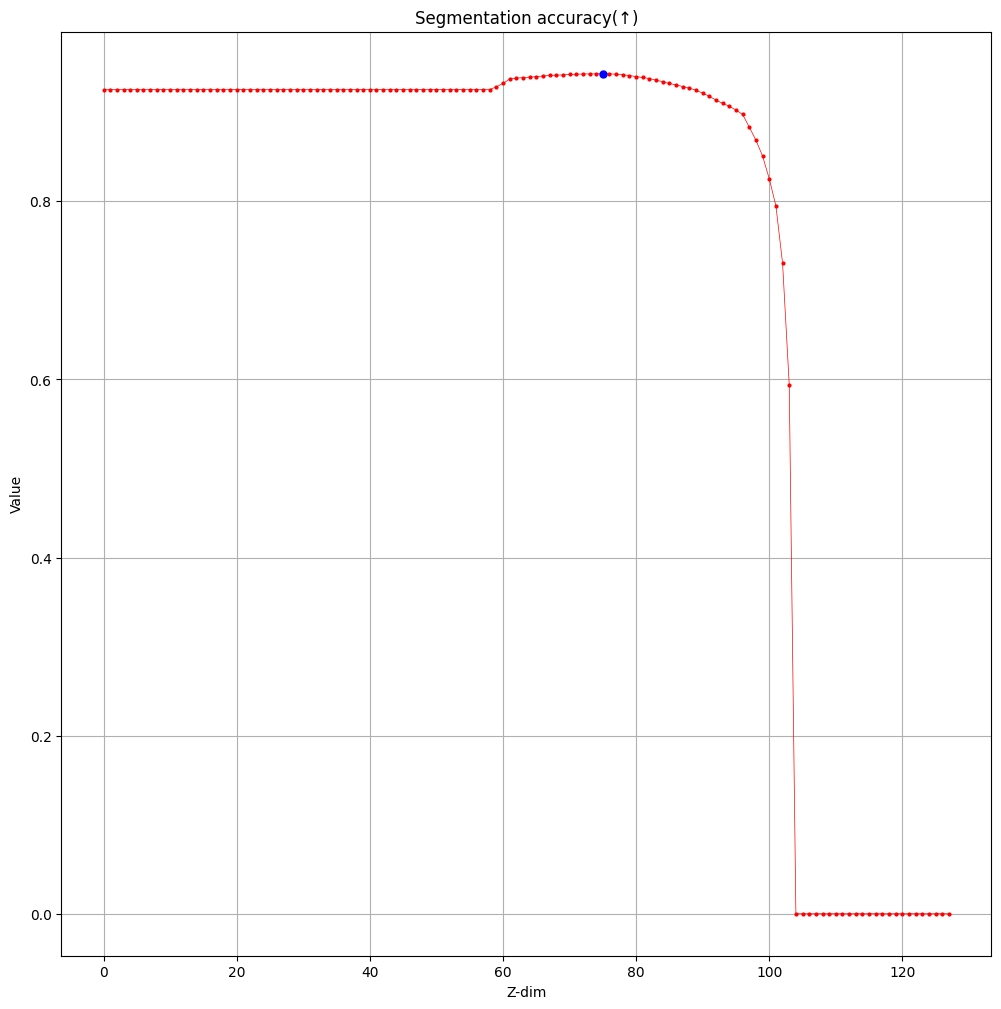

Patient id: 8_02951189
chch:11 (128,)
chch:22 (128,)
chch:33 63


interactive(children=(IntSlider(value=95, description='z', max=127, min=63), Output()), _dom_classes=('widget-…

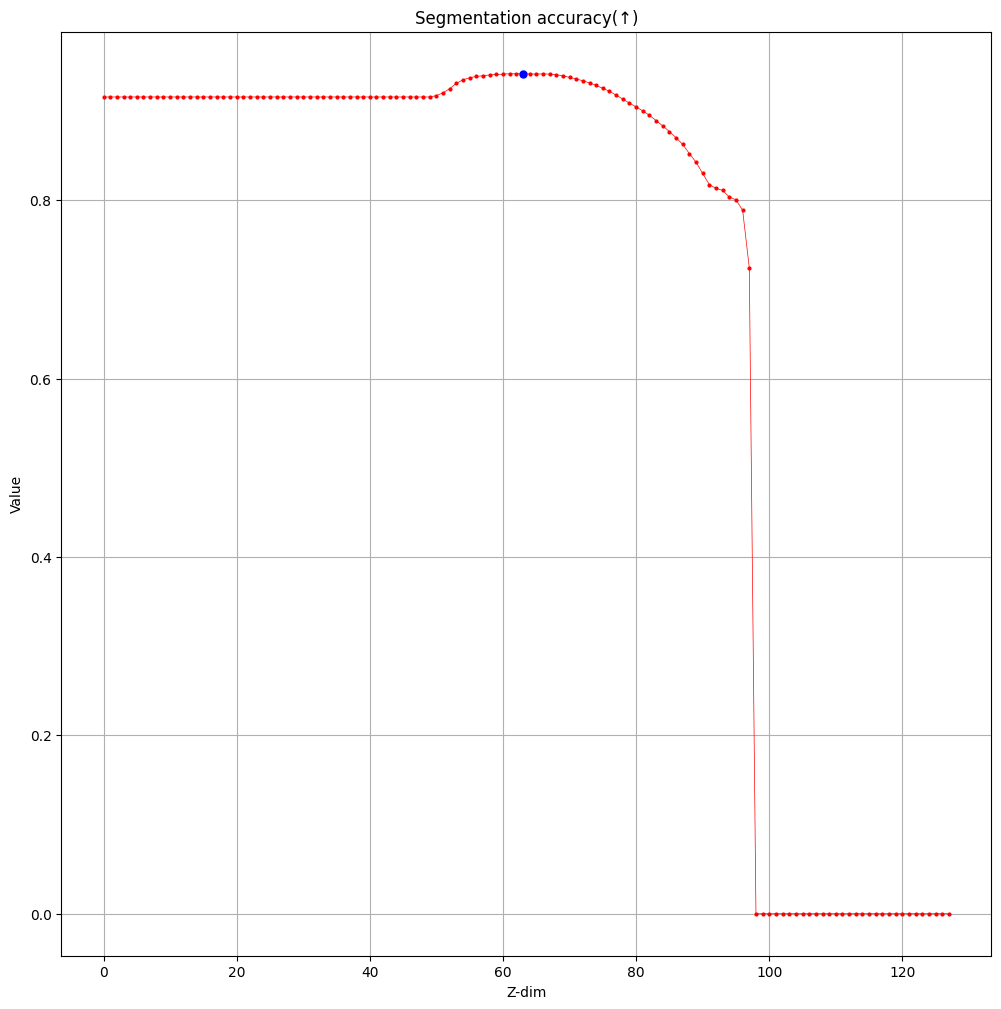

Patient id: 9_02951192
chch:11 (128,)
chch:22 (128,)
chch:33 77


interactive(children=(IntSlider(value=102, description='z', max=127, min=77), Output()), _dom_classes=('widget…

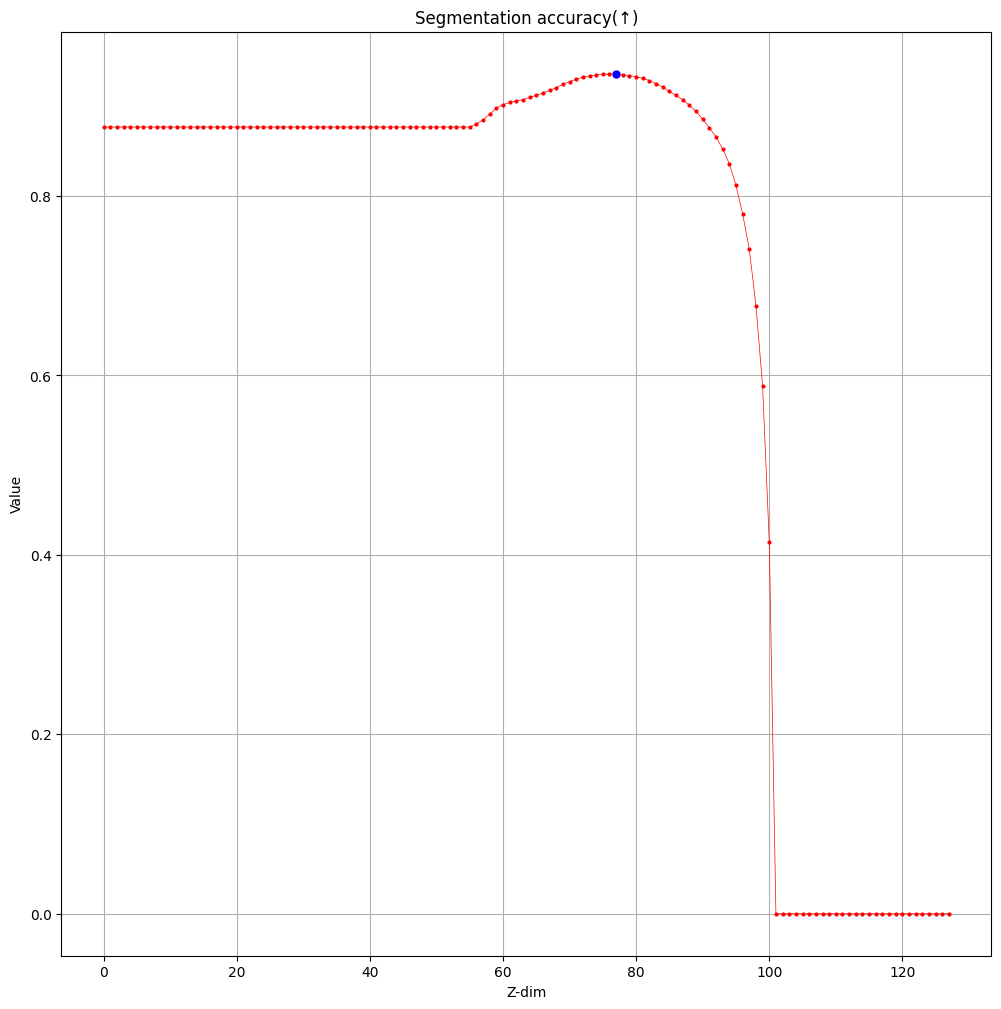

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold5/test/
Patient id: 0_02953538
chch:11 (128,)
chch:22 (128,)
chch:33 41


interactive(children=(IntSlider(value=84, description='z', max=127, min=41), Output()), _dom_classes=('widget-…

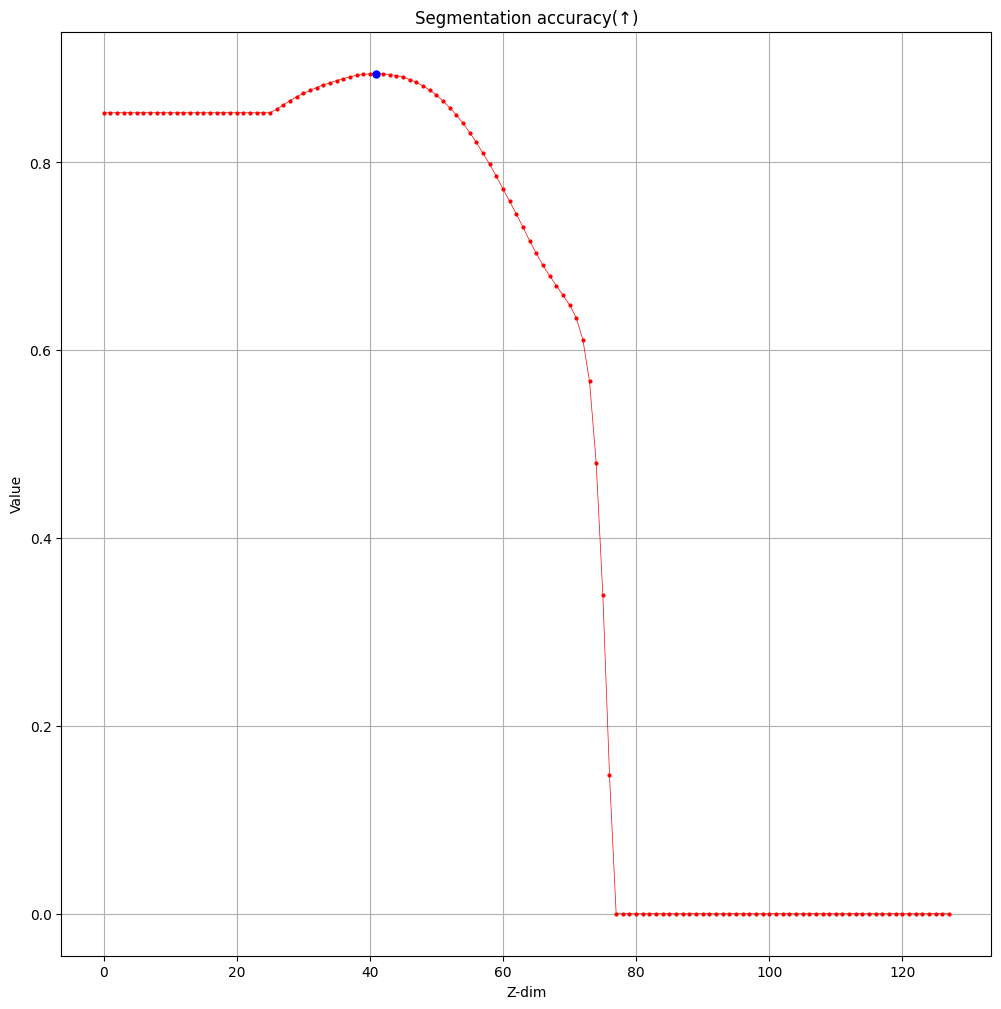

Patient id: 1_02953540
chch:11 (128,)
chch:22 (128,)
chch:33 56


interactive(children=(IntSlider(value=91, description='z', max=127, min=56), Output()), _dom_classes=('widget-…

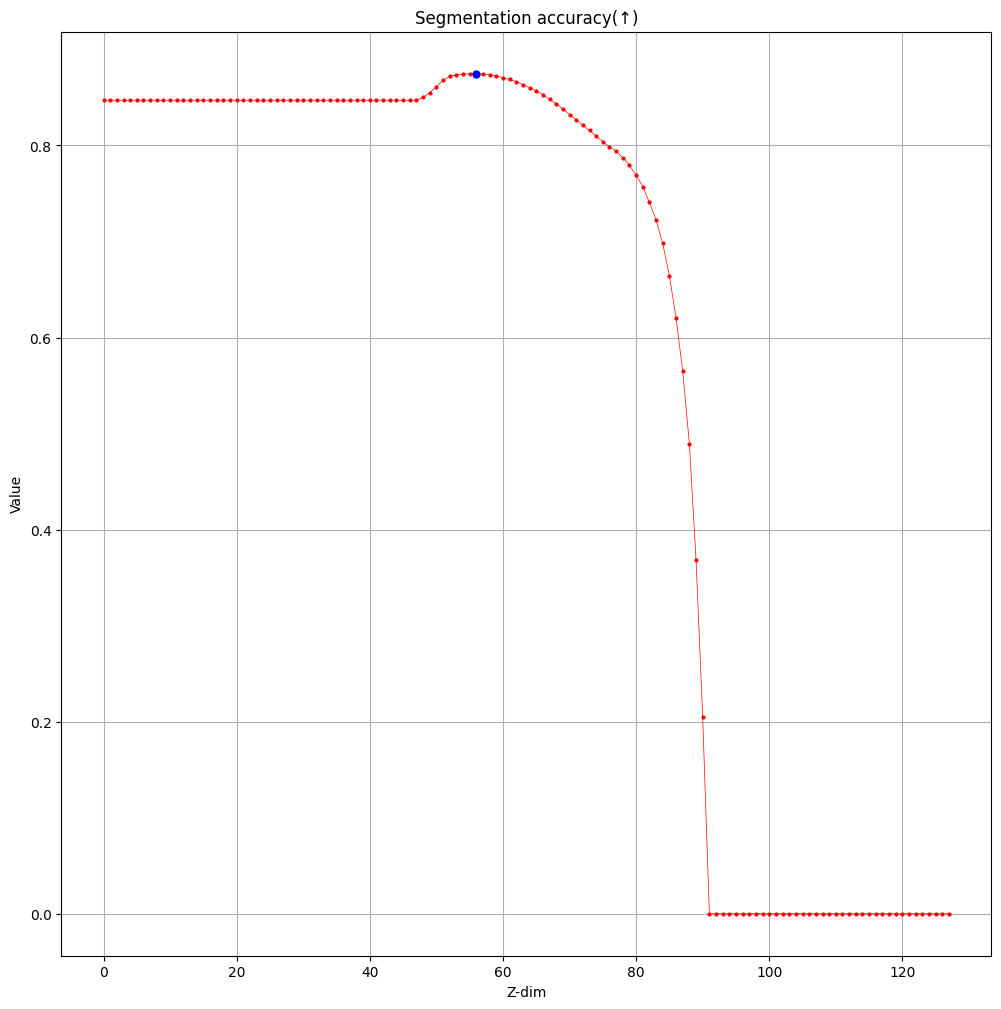

Patient id: 2_02953784
chch:11 (128,)
chch:22 (128,)
chch:33 70


interactive(children=(IntSlider(value=98, description='z', max=127, min=70), Output()), _dom_classes=('widget-…

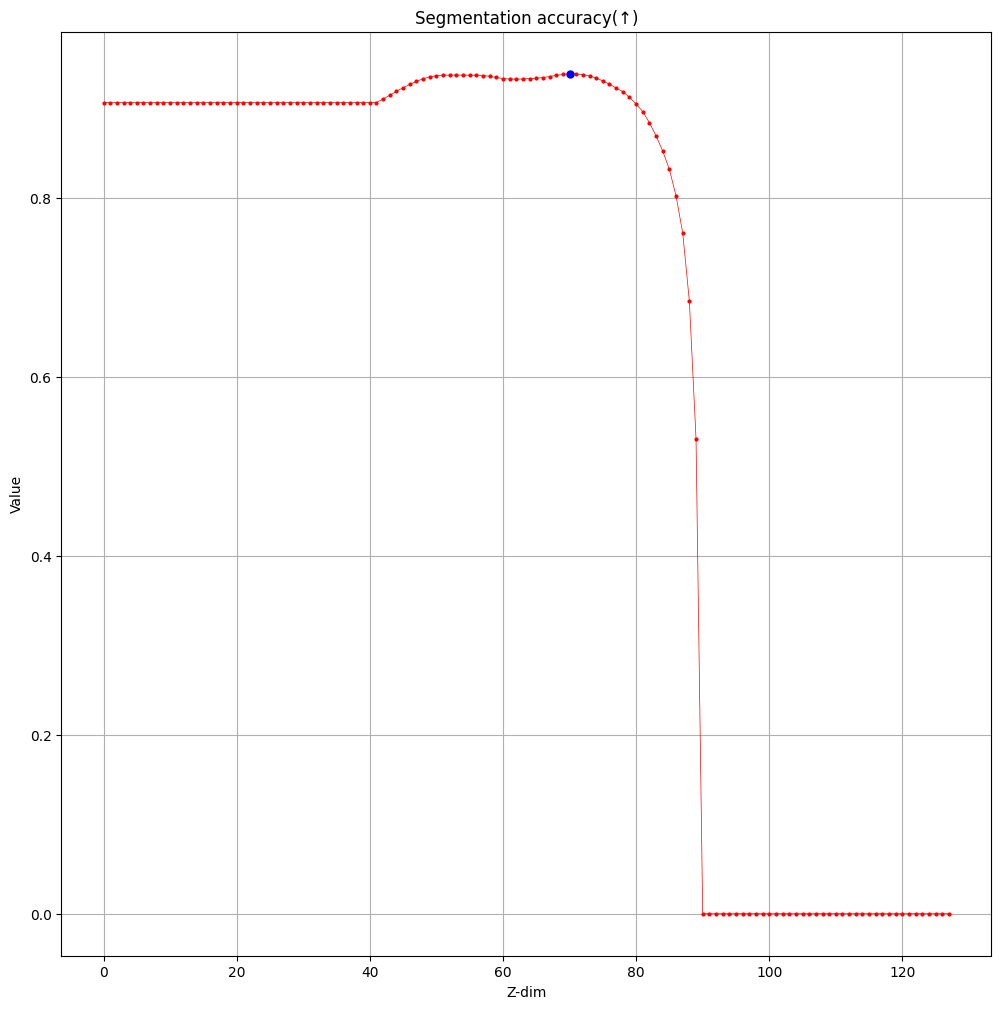

Patient id: 3_02953958
chch:11 (128,)
chch:22 (128,)
chch:33 72


interactive(children=(IntSlider(value=99, description='z', max=127, min=72), Output()), _dom_classes=('widget-…

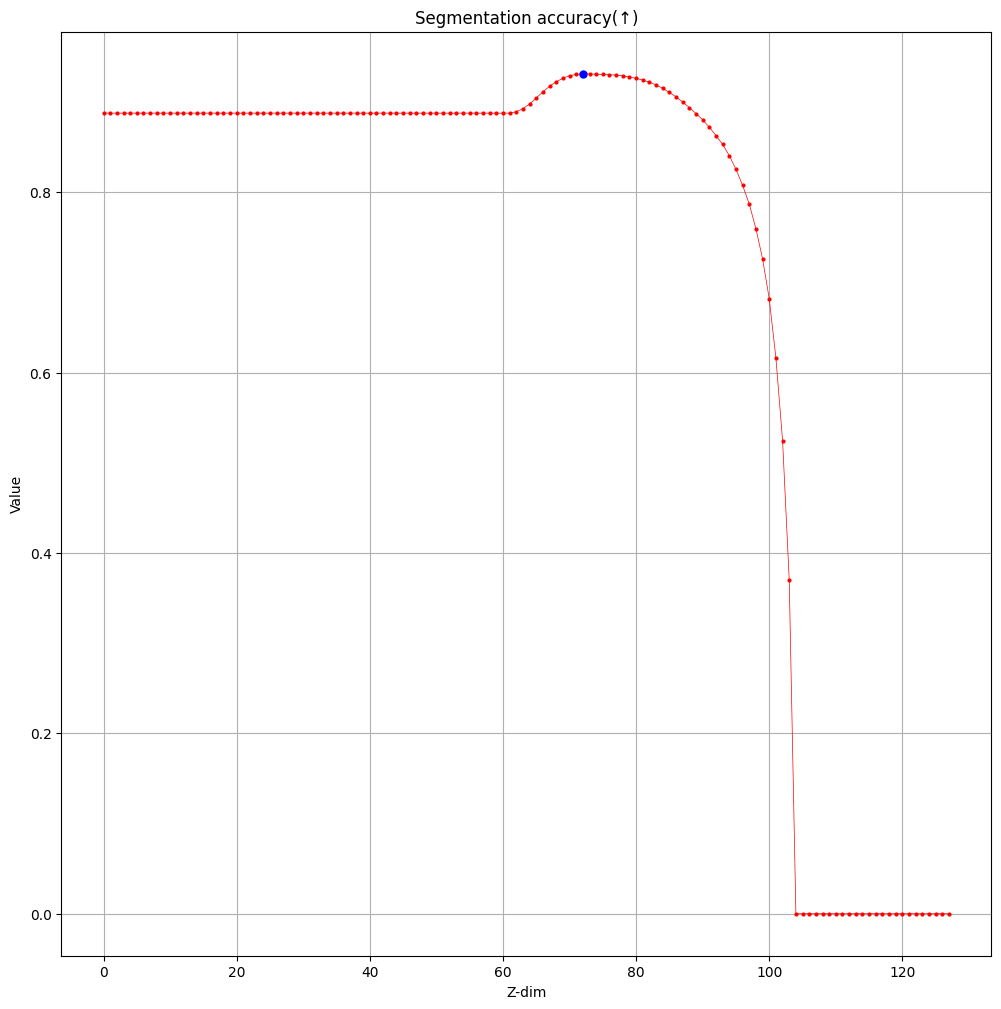

Patient id: 4_02954359
chch:11 (128,)
chch:22 (128,)
chch:33 72


interactive(children=(IntSlider(value=99, description='z', max=127, min=72), Output()), _dom_classes=('widget-…

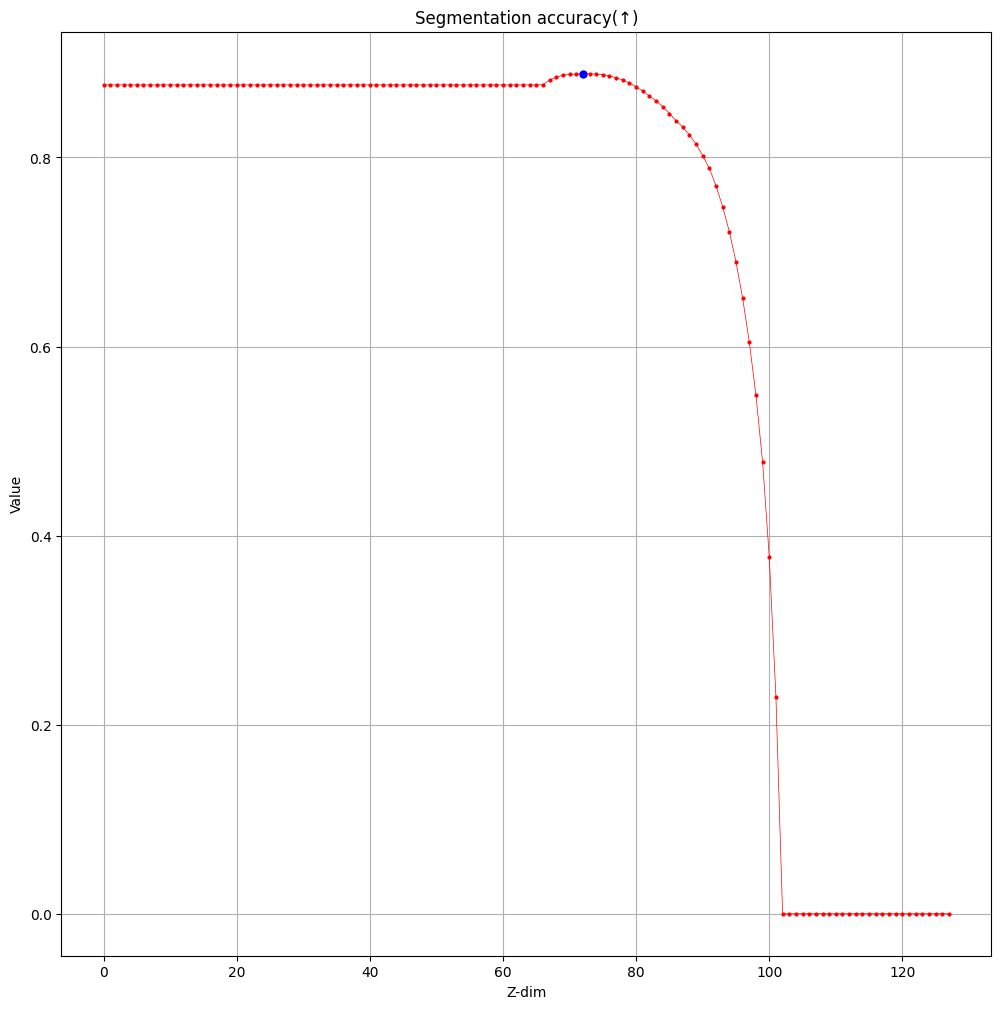

Patient id: 5_02954360
chch:11 (128,)
chch:22 (128,)
chch:33 61


interactive(children=(IntSlider(value=94, description='z', max=127, min=61), Output()), _dom_classes=('widget-…

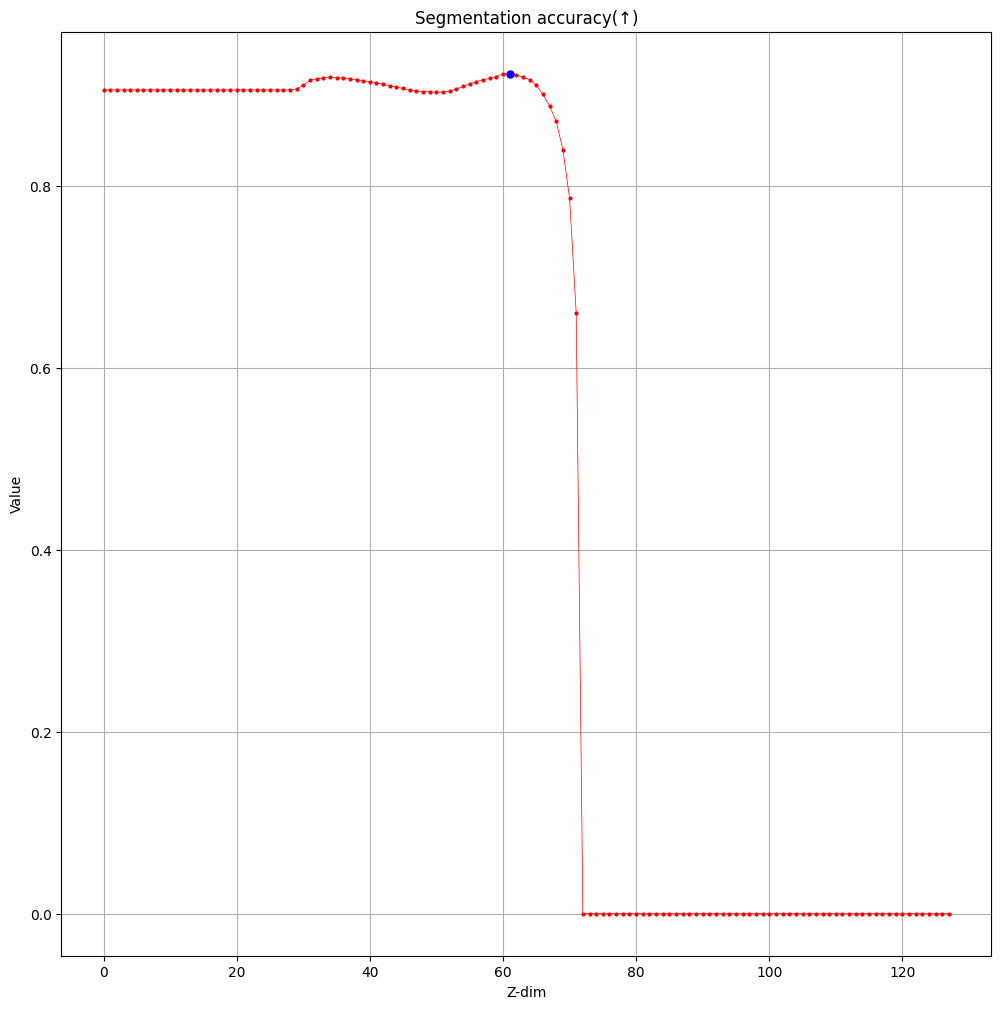

Patient id: 6_02954361
chch:11 (128,)
chch:22 (128,)
chch:33 73


interactive(children=(IntSlider(value=100, description='z', max=127, min=73), Output()), _dom_classes=('widget…

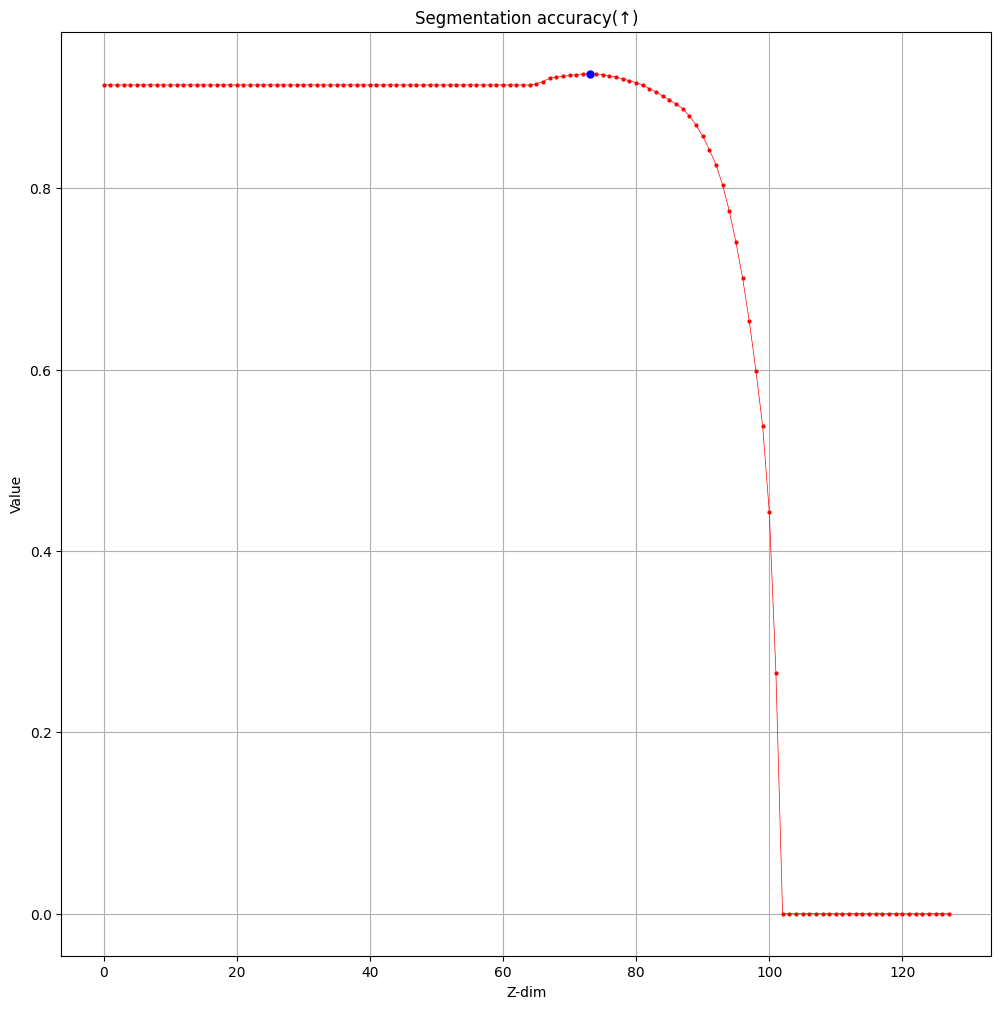

Patient id: 7_02954978
chch:11 (128,)
chch:22 (128,)
chch:33 64


interactive(children=(IntSlider(value=95, description='z', max=127, min=64), Output()), _dom_classes=('widget-…

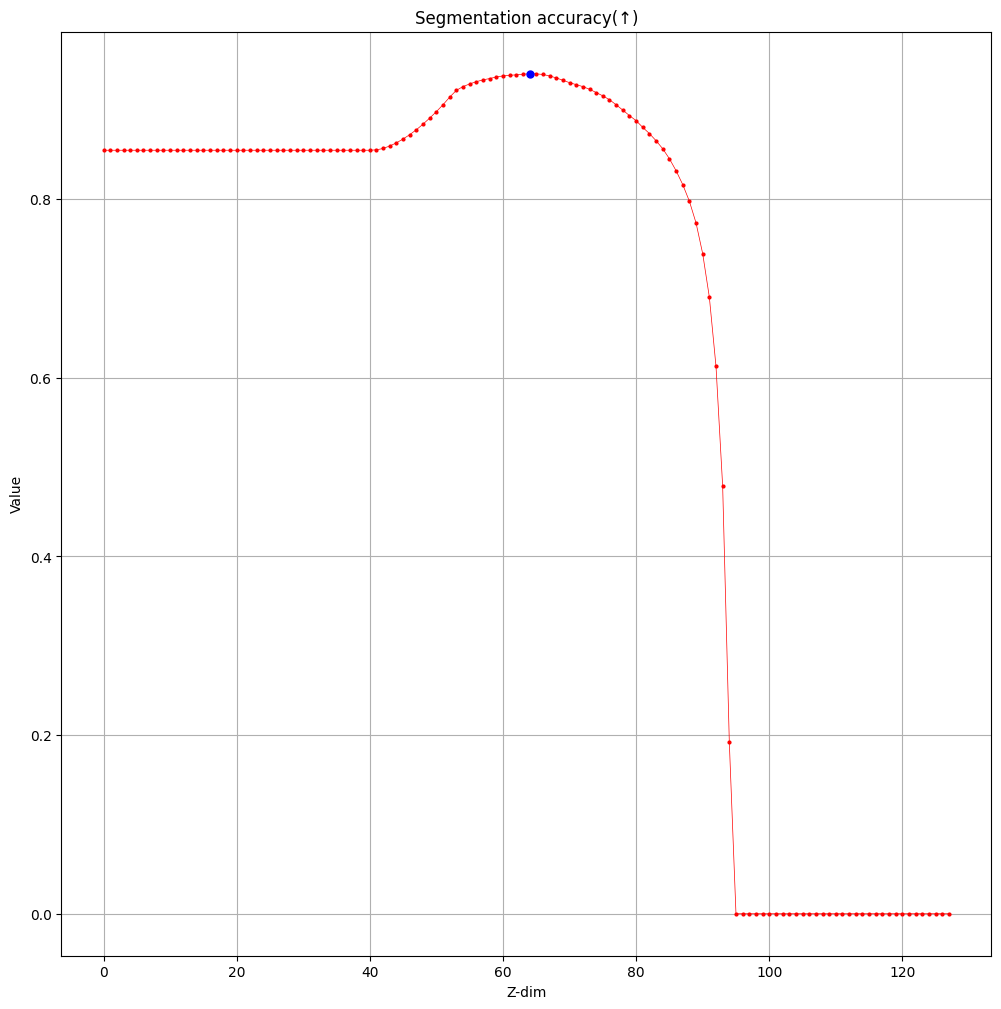

Patient id: 8_02955289
chch:11 (128,)
chch:22 (128,)
chch:33 64


interactive(children=(IntSlider(value=95, description='z', max=127, min=64), Output()), _dom_classes=('widget-…

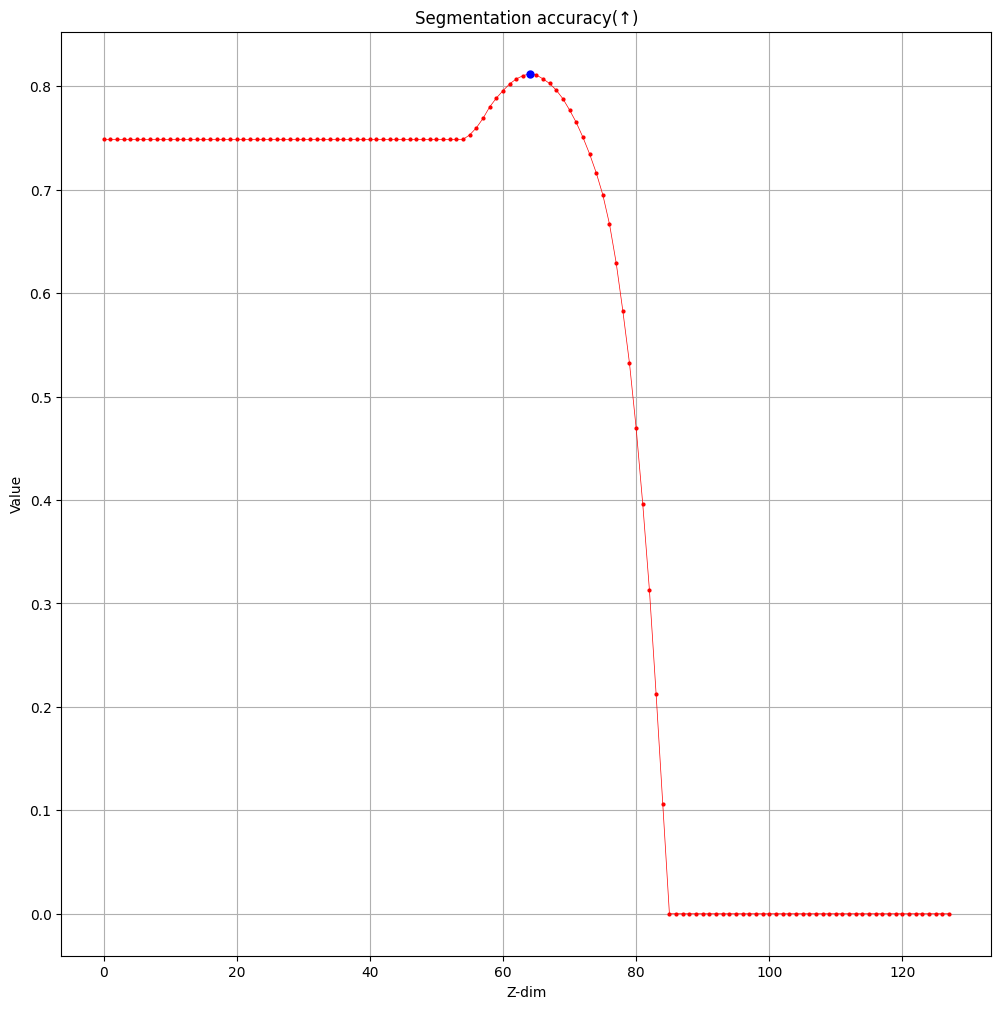

Patient id: 9_02955569
chch:11 (128,)
chch:22 (128,)
chch:33 46


interactive(children=(IntSlider(value=86, description='z', max=127, min=46), Output()), _dom_classes=('widget-…

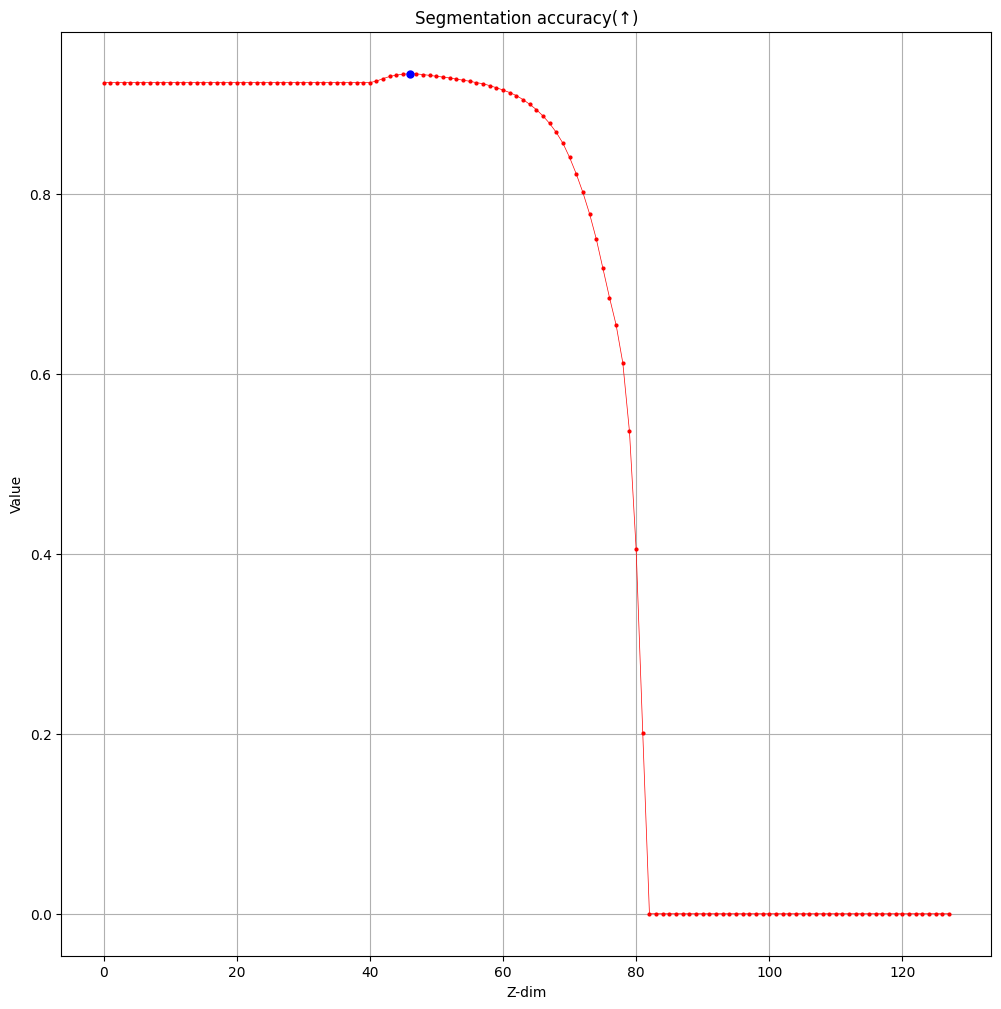

In [8]:
# 디렉토리 경로 설정
base_directory = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/'
# base_directory2 = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/'
directory_paths = [os.path.join(base_directory, f'vnet_30000_fold{i}/test/') for i in range(1, 6)]
# directory_paths2 = [os.path.join(base_directory2, f'vnet_30000_fold{i}/test/') for i in range(1, 6)]
# directory_path_realgt = '/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/'

ves = []; dices = [];
# 디렉토리별로 처리
for fold_idx, directory_path in enumerate(directory_paths, start=1):
    print("==============================\nDirectory: ", directory_path)
    curr_fold_ves = []; curr_fold_dices = [];
    # 디렉토리 내의 모든 파일 검색
    for filename in os.listdir(directory_path):
        # 파일 이름이 "_gt.nii.gz"로 끝나는 경우에만 처리
        if filename.endswith('_gt.nii.gz'):
            print("Patient id:",filename[:-10])
            # 파일의 전체 경로 생성
            gt_file_path = os.path.join(directory_path, filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _pred 파일 찾기
            pred_filename = filename.replace('_gt.nii.gz', '_pred.nii.gz')
            pred_file_path = os.path.join(directory_path, pred_filename)
#             pred_file_path2 = os.path.join(directory_paths2[fold_idx-1], pred_filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _image 파일 찾기
            img_filename = filename.replace('_gt.nii.gz', '_img.nii.gz')
            img_file_path = os.path.join(directory_path, img_filename)
    
            # _pred 파일이 존재하면 계산 수행
            if os.path.exists(pred_file_path):
                # NIfTI 파일 열기
                gt_label_file = nib.load(gt_file_path)
                gt_space = gt_label_file.header.get_zooms()
                gt_label = gt_label_file.get_fdata()
                gt_label = np.moveaxis(gt_label, [0, 1, 2], [1, 0, 2])
                
                pred_label_file = nib.load(pred_file_path)
                pred_space = pred_label_file.header.get_zooms()
                pred_label = pred_label_file.get_fdata()
                pred_label = np.moveaxis(pred_label, [0, 1, 2], [1, 0, 2])

                ct_img_file = nib.load(img_file_path)
                ct_space = ct_img_file.header.get_zooms()
                ct_img = ct_img_file.get_fdata()
                ct_img = np.moveaxis(ct_img, [0, 1, 2], [1, 0, 2])
#                 print("gt_label.shape;",gt_label.shape)  # (256, 256, 128)
#                 print("pred_label.shape;",pred_label.shape)  # (256, 256, 128)
#                 print("ct_img.shape;",ct_img.shape)  # (256, 256, 128)

                z_dim = ct_img.shape[-1]
                curr_patient_ves = []; curr_patient_dices = [];
                for each in range(z_dim):
                    gt_voxel_count = np.count_nonzero(gt_label[:,:,each:]!=0)
                    pred_voxel_count = np.count_nonzero(pred_label[:,:,each:]!=0)

                    # _gt 파일의 정보를 읽어오고 volume 계산
                    volume_gt = calculate_volume(gt_voxel_count, gt_space[0], gt_space[1], gt_space[2])
                    # _pred 파일의 정보를 읽어오고 volume 계산
                    volume_pred = calculate_volume(pred_voxel_count, pred_space[0], pred_space[1], pred_space[2])

                    ve = np.abs(volume_gt-volume_pred)
#                     print("volume_gt-volume_pred", ve)

                    dice = metric.binary.dc(pred_label[:,:,each:], gt_label[:,:,each:])
#                     print("dice", dice)
                    curr_patient_ves.append(ve)
                    curr_patient_dices.append(dice)
                    if each == z_dim-1:
                        curr_patient_ves = np.array(curr_patient_ves)
                        curr_patient_dices = np.array(curr_patient_dices)
                        max_idx = curr_patient_dices.argmax()
                        print("chch:11",curr_patient_ves.shape)
                        print("chch:22",curr_patient_dices.shape)
                        print("chch:33", max_idx)
                        @interact(z=(max_idx,pred_label.shape[2]-1))
                        def visualize_data(z):
        #                     ct_img = ct_img.get_fdata()
                            fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 5개의 subplot을 생성합니다.
                            # 첫 번째 subplot에는 원본 이미지를 표시합니다.
                            axes[0,0].imshow(ct_img[:, :, z], cmap='gray')
                            axes[0,0].set_title('CT Image slices')
                            axes[0,0].axis('off')
                            # 두 번째 subplot에는 GT label z번째 슬라이스를 표시합니다.
                            axes[1,0].imshow(ct_img[:, :, z], cmap='gray')
                            axes[1,0].imshow(np.where(gt_label[:, :, z] == 1, gt_label[:, :, z], np.nan), cmap='cool', alpha=0.3)
                            axes[1,0].set_title('GT mask slices')
                            axes[1,0].axis('off')
                            # 세 번째 subplot에는 Pred label의 z번째 슬라이스를 표시합니다.
                            axes[1,1].imshow(ct_img[:, :, z], cmap='gray')
                            axes[1,1].imshow(np.where(pred_label[:, :, z] == 1, pred_label[:, :, z], np.nan), cmap='autumn', alpha=0.3)
                            axes[1,1].set_title('Pred mask slices')
                            axes[1,1].axis('off')
                            ## 볼륨값이랑 dice 계산해서 output하게 하자..

                            # 세 번째 subplot에는 Pred label의 z번째 슬라이스를 표시합니다.
        #                     blended_mask = np.zeros_like(gt_label[:, :, z])  # blended_mask를 모두 0으로 초기화합니다.
        #                     gt_mask = np.where(gt_label[:, :, z] == 1, gt_label[:, :, z], 0)
        #                     pred_mask = np.where(pred_label[:, :, z] == 1, pred_label[:, :, z], 0)
        #                     blended_mask = np.where(gt_mask + pred_mask > 0, 0.7 * gt_mask + 0.3 * pred_mask, np.nan)
                            axes[0,1].imshow(np.where(gt_label[:, :, z] == 1, gt_label[:, :, z], np.nan), cmap='cool', alpha=0.5)

        #                     axes[0,1].imshow(np.where(pred_label2[:, :, z] == 1, pred_label2[:, :, z], np.nan), cmap='winter', alpha=0.5)
                            axes[0,1].imshow(np.where(pred_label[:, :, z] == 1, pred_label[:, :, z], np.nan), cmap='autumn', alpha=0.5)
                            axes[0,1].set_title('GT & Pred mask slices')
                            axes[0,1].axis('off')
                            plt.show()
                        plt.figure(figsize=(12, 12))
                        plt.plot(curr_patient_dices, 'ro-', ms='2', lw='0.5', label='Segmentation accuracy(↑)')
                        plt.plot(max_idx, curr_patient_dices[max_idx], 'bo', ms=5, label='Max accuracy')
                        plt.title('Segmentation accuracy(↑)')
                        # Labeling the x-axis and y-axis
                        plt.xlabel('Z-dim')
                        plt.ylabel('Value')
                        plt.grid(True)

                        # Display the plot
                        plt.show()
                    
#             curr_fold_ves.append(curr_patient_ves)
#             curr_fold_dices.append(curr_patient_dices)
#     ves.append(curr_fold_ves)
#     dices.append(curr_fold_dices)

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold1/test/
Patient id: 0_00800131
chch:11 (128,)
chch:22 (128,)
chch:33 73
Patient id: 1_00818049
chch:11 (128,)
chch:22 (128,)
chch:33 62
Patient id: 2_00851016
chch:11 (128,)
chch:22 (128,)
chch:33 73
Patient id: 3_01054688
chch:11 (128,)
chch:22 (128,)
chch:33 63
Patient id: 4_01094573
chch:11 (128,)
chch:22 (128,)
chch:33 62
Patient id: 5_01106379
chch:11 (128,)
chch:22 (128,)
chch:33 55
Patient id: 6_01115241
chch:11 (128,)
chch:22 (128,)
chch:33 80
Patient id: 7_01228200
chch:11 (128,)
chch:22 (128,)
chch:33 76
Patient id: 8_01264293
chch:11 (128,)
chch:22 (128,)
chch:33 46
Patient id: 9_01663839
chch:11 (128,)
chch:22 (128,)
chch:33 75
Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/vnet_30000_fold2/test/
Patient id: 0_01776461
chch:11 (128,)
chch:22 (128,)
chch:33 87
Patient id: 1_01804929
chch:11 (128,)
chch:22 (128,)
chch:33 86
Patient id: 2_

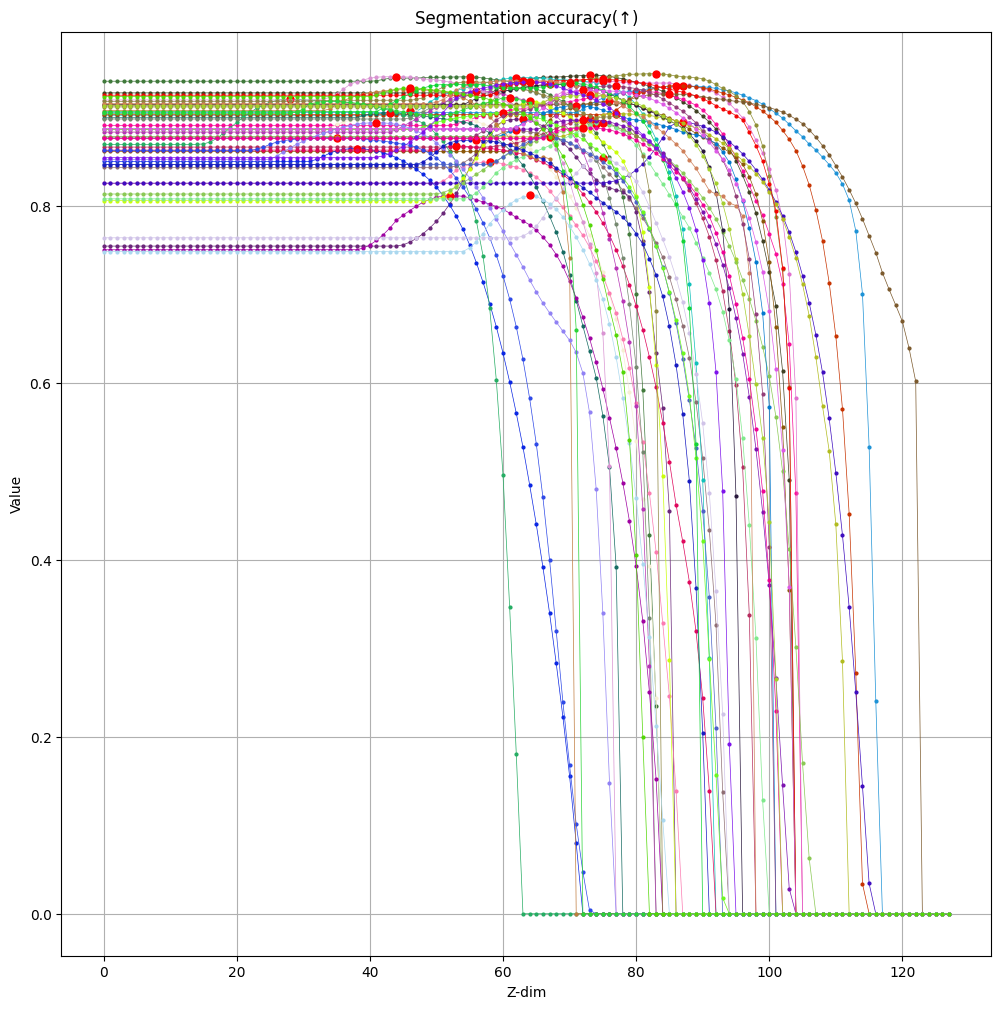

In [9]:
import random

# 디렉토리 경로 설정
base_directory = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/'
# base_directory2 = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_morph_close5/'
directory_paths = [os.path.join(base_directory, f'vnet_30000_fold{i}/test/') for i in range(1, 6)]
# directory_paths2 = [os.path.join(base_directory2, f'vnet_30000_fold{i}/test/') for i in range(1, 6)]
# directory_path_realgt = '/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/'
plt.figure(figsize=(12, 12))
ves = []; dices = [];
# 디렉토리별로 처리
for fold_idx, directory_path in enumerate(directory_paths, start=1):
    print("==============================\nDirectory: ", directory_path)
    curr_fold_ves = []; curr_fold_dices = [];
    # 디렉토리 내의 모든 파일 검색
    for filename in os.listdir(directory_path):
        # 파일 이름이 "_gt.nii.gz"로 끝나는 경우에만 처리
        if filename.endswith('_gt.nii.gz'):
            print("Patient id:",filename[:-10])
            # 파일의 전체 경로 생성
            gt_file_path = os.path.join(directory_path, filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _pred 파일 찾기
            pred_filename = filename.replace('_gt.nii.gz', '_pred.nii.gz')
            pred_file_path = os.path.join(directory_path, pred_filename)
#             pred_file_path2 = os.path.join(directory_paths2[fold_idx-1], pred_filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _image 파일 찾기
            img_filename = filename.replace('_gt.nii.gz', '_img.nii.gz')
            img_file_path = os.path.join(directory_path, img_filename)
    
            # _pred 파일이 존재하면 계산 수행
            if os.path.exists(pred_file_path):
                # NIfTI 파일 열기
                gt_label_file = nib.load(gt_file_path)
                gt_space = gt_label_file.header.get_zooms()
                gt_label = gt_label_file.get_fdata()
                gt_label = np.moveaxis(gt_label, [0, 1, 2], [1, 0, 2])
                
                pred_label_file = nib.load(pred_file_path)
                pred_space = pred_label_file.header.get_zooms()
                pred_label = pred_label_file.get_fdata()
                pred_label = np.moveaxis(pred_label, [0, 1, 2], [1, 0, 2])

                ct_img_file = nib.load(img_file_path)
                ct_space = ct_img_file.header.get_zooms()
                ct_img = ct_img_file.get_fdata()
                ct_img = np.moveaxis(ct_img, [0, 1, 2], [1, 0, 2])
#                 print("gt_label.shape;",gt_label.shape)  # (256, 256, 128)
#                 print("pred_label.shape;",pred_label.shape)  # (256, 256, 128)
#                 print("ct_img.shape;",ct_img.shape)  # (256, 256, 128)

                z_dim = ct_img.shape[-1]
                curr_patient_ves = []; curr_patient_dices = [];
                for each in range(z_dim):
                    gt_voxel_count = np.count_nonzero(gt_label[:,:,each:]!=0)
                    pred_voxel_count = np.count_nonzero(pred_label[:,:,each:]!=0)

                    # _gt 파일의 정보를 읽어오고 volume 계산
                    volume_gt = calculate_volume(gt_voxel_count, gt_space[0], gt_space[1], gt_space[2])
                    # _pred 파일의 정보를 읽어오고 volume 계산
                    volume_pred = calculate_volume(pred_voxel_count, pred_space[0], pred_space[1], pred_space[2])

                    ve = np.abs(volume_gt-volume_pred)
#                     print("volume_gt-volume_pred", ve)

                    dice = metric.binary.dc(pred_label[:,:,each:], gt_label[:,:,each:])
#                     print("dice", dice)
                    curr_patient_ves.append(ve)
                    curr_patient_dices.append(dice)
                    if each == z_dim-1:
                        curr_patient_ves = np.array(curr_patient_ves)
                        curr_patient_dices = np.array(curr_patient_dices)
                        max_idx = curr_patient_dices.argmax()
                        print("chch:11",curr_patient_ves.shape)
                        print("chch:22",curr_patient_dices.shape)
                        print("chch:33", max_idx)
#                         @interact(z=(max_idx,pred_label.shape[2]-1))
#                         def visualize_data(z):
#         #                     ct_img = ct_img.get_fdata()
#                             fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 5개의 subplot을 생성합니다.
#                             # 첫 번째 subplot에는 원본 이미지를 표시합니다.
#                             axes[0,0].imshow(ct_img[:, :, z], cmap='gray')
#                             axes[0,0].set_title('CT Image slices')
#                             axes[0,0].axis('off')
#                             # 두 번째 subplot에는 GT label z번째 슬라이스를 표시합니다.
#                             axes[1,0].imshow(ct_img[:, :, z], cmap='gray')
#                             axes[1,0].imshow(np.where(gt_label[:, :, z] == 1, gt_label[:, :, z], np.nan), cmap='cool', alpha=0.3)
#                             axes[1,0].set_title('GT mask slices')
#                             axes[1,0].axis('off')
#                             # 세 번째 subplot에는 Pred label의 z번째 슬라이스를 표시합니다.
#                             axes[1,1].imshow(ct_img[:, :, z], cmap='gray')
#                             axes[1,1].imshow(np.where(pred_label[:, :, z] == 1, pred_label[:, :, z], np.nan), cmap='autumn', alpha=0.3)
#                             axes[1,1].set_title('Pred mask slices')
#                             axes[1,1].axis('off')
#                             ## 볼륨값이랑 dice 계산해서 output하게 하자..

#                             # 세 번째 subplot에는 Pred label의 z번째 슬라이스를 표시합니다.
#         #                     blended_mask = np.zeros_like(gt_label[:, :, z])  # blended_mask를 모두 0으로 초기화합니다.
#         #                     gt_mask = np.where(gt_label[:, :, z] == 1, gt_label[:, :, z], 0)
#         #                     pred_mask = np.where(pred_label[:, :, z] == 1, pred_label[:, :, z], 0)
#         #                     blended_mask = np.where(gt_mask + pred_mask > 0, 0.7 * gt_mask + 0.3 * pred_mask, np.nan)
#                             axes[0,1].imshow(np.where(gt_label[:, :, z] == 1, gt_label[:, :, z], np.nan), cmap='cool', alpha=0.5)

#         #                     axes[0,1].imshow(np.where(pred_label2[:, :, z] == 1, pred_label2[:, :, z], np.nan), cmap='winter', alpha=0.5)
#                             axes[0,1].imshow(np.where(pred_label[:, :, z] == 1, pred_label[:, :, z], np.nan), cmap='autumn', alpha=0.5)
#                             axes[0,1].set_title('GT & Pred mask slices')
#                             axes[0,1].axis('off')
#                             plt.show()
                        
                        
                        random_color = (random.random(), random.random(), random.random())

                        plt.plot(curr_patient_dices, 'o-', ms='2', lw='0.5', label='Segmentation accuracy(↑)', color=random_color)
#                         plt.plot(curr_patient_dices, 'ro-', ms='2', lw='0.5', label='Segmentation accuracy(↑)')
                        plt.plot(max_idx, curr_patient_dices[max_idx], 'ro', ms=5, label='Max accuracy')
plt.title('Segmentation accuracy(↑)')
# Labeling the x-axis and y-axis
plt.xlabel('Z-dim')
plt.ylabel('Value')
plt.grid(True)

# Display the plot
plt.show()
                    
#             curr_fold_ves.append(curr_patient_ves)
#             curr_fold_dices.append(curr_patient_dices)
#     ves.append(curr_fold_ves)
#     dices.append(curr_fold_dices)